* Comparing the stop criterion of precision is the goal with the enhanced version
* Describing the risk version

# Setup

In [1]:
# IPython extension to reload modules before executing user code.
# useful to see immediate results in notebook when modifying imported scripts
%load_ext autoreload
%autoreload 2

In [77]:
import numpy as np
import pandas as pd

from scipy.stats import beta

from utils_stats import (
    #hdi_ci_limits,
    successes_failures_to_hdi_ci_limits,
    report_success_rates_multiple_algos,
    run_simulations_and_analysis_report, # was called full_analysis
)

from utils_viz import (
    #plot_success_rates
    plot_vhlines_lines,
    plot_parity_line,
    plot_multiple_decision_rates_jammed,
    plot_multiple_decision_rates_separate,
    scatter_stop_iter_sample_rate,
    viz_one_sample_results,
    plot_sample_pdf_methods,
)

from utils_experiments import (
    BinaryAccounting,
    BinomialSimulation,
    BinomialHypothesis,
    stop_decision_multiple_experiments_multiple_methods,
    stats_dict_to_df,
    iteration_counts_to_df,
    sample_all_iterations_results,
)
    

seed = 7

In [3]:
import matplotlib.pyplot as plt
SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

FIG_WIDTH, FIG_HEIGHT = 8, 6

plt.rc("font", size=SMALL_SIZE)  # controls default text sizes
plt.rc("axes", titlesize=SMALL_SIZE)  # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("legend", fontsize=SMALL_SIZE)  # legend fontsize
plt.rc("axes", titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rcParams["figure.figsize"] = FIG_WIDTH, FIG_HEIGHT
# plt.rcParams["hatch.linewidth"] = 0.2

plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

In [4]:
# Assessing Power. Not sure if this should be used.
# TODO: consider if and where to use this.
from statsmodels.stats.power import NormalIndPower

effect_size = 0.55 - 0.5
alpha = 0.05
power = 0.8

# Use the actual effect size as Cohen's h for proportions
from statsmodels.stats.proportion import proportion_effectsize
h = proportion_effectsize(0.5, 0.55)

analysis = NormalIndPower()
n = analysis.solve_power(effect_size=h, alpha=alpha, power=power, alternative='two-sided')
print(f"Sample size needed: {n:.0f}")

Sample size needed: 1565


# Data

Experiments each containing many Bernoulli trials

# Experiments

In [5]:
hypothesis_0pt5 = BinomialHypothesis()

0.5: null hypothesis
0.45: ROPE min
0.55: ROPE max
--------------------
0.08: Precision Goal


In [7]:
# used for storing an linking to binary calucations already performed
binary_accounting = BinaryAccounting()

## Fair Coin

In [9]:
%%time
synth_0pt5 = BinomialSimulation(n_experiments=2000)

Generating synthetic data with parameter values:
0.5: true success rate
2000: experiments
1500: sample size per experiment
CPU times: user 68.2 ms, sys: 5.28 ms, total: 73.5 ms
Wall time: 72.6 ms


In [10]:
%%time
hypothesis_0pt5.run_hypothesis_on_experiments(synth_0pt5.experiments, binary_accounting)

Sample 11 at final iteration
{'decision_iteration': 1500, 'accept': False, 'reject_below': False, 'reject_above': False, 'conclusive': False, 'inconclusive': True, 'successes': 799, 'failures': 701, 'hdi_min': 0.5074142760260834, 'hdi_max': 0.5578881163957048, 'precision_goal_achieved': True}
Sample 61 at final iteration
{'decision_iteration': 1500, 'accept': False, 'reject_below': False, 'reject_above': False, 'conclusive': False, 'inconclusive': True, 'successes': 804, 'failures': 696, 'hdi_min': 0.5107636035522547, 'hdi_max': 0.5612141943766372, 'precision_goal_achieved': True}
Sample 64 at final iteration
{'decision_iteration': 1500, 'accept': False, 'reject_below': False, 'reject_above': False, 'conclusive': False, 'inconclusive': True, 'successes': 790, 'failures': 710, 'hdi_min': 0.5014038032397002, 'hdi_max': 0.551913781126643, 'precision_goal_achieved': True}
Sample 65 at final iteration
{'decision_iteration': 1500, 'accept': False, 'reject_below': False, 'reject_above': False

accept  reject  conclusive  inconclusive  stop_iter_mean  \
hdi_rope  0.9210   0.061      0.9820        0.0180        592.9835   
pitg      0.3670   0.000      0.3670        0.6330        598.2090   
epitg     0.9765   0.000      0.9765        0.0235        740.9665   

          stop_iter_std  success_rate_mean  success_rate_std  
hdi_rope     290.737790           0.498253          0.051782  
pitg           1.457526           0.499978          0.020554  
epitg        221.187573           0.500032          0.013120

CPU times: user 6min 4s, sys: 1.23 s, total: 6min 5s
Wall time: 6min 6s


In [11]:
hypothesis_0pt5.method_df_stats['pitg']['success_rate'].mean(), hypothesis_0pt5.method_df_stats['pitg'].query("conclusive")['success_rate'].mean(), hypothesis_0pt5.method_df_stats['pitg'].query("inconclusive")['success_rate'].mean()

(0.49997758401944337, 0.5002934045389008, 0.49979447796787874)

In [12]:
hypothesis_0pt5.method_df_stats['epitg']['success_rate'].mean(), hypothesis_0pt5.method_df_stats['epitg'].query("conclusive")['success_rate'].mean(), hypothesis_0pt5.method_df_stats['epitg'].query("inconclusive")['success_rate'].mean()

(0.5000315941716257, 0.4999733000562819, 0.5024539007092198)

In [8]:
hypothesis_0pt5.method_df_stats['pitg']['success_rate'].mean(), hypothesis_0pt5.method_df_stats['pitg'].query("accept")['success_rate'].mean()


(0.49997758401944337, 0.5002934045389008)

In [9]:
hypothesis_0pt5.method_df_stats['pitg']['success_rate'].mean(), hypothesis_0pt5.method_df_stats['pitg'].query("conclusive")['success_rate'].mean(), hypothesis_0pt5.method_df_stats['pitg'].query("inconclusive")['success_rate'].mean()

(0.49997758401944337, 0.5002934045389008, 0.49979447796787874)

viz_epitg separate


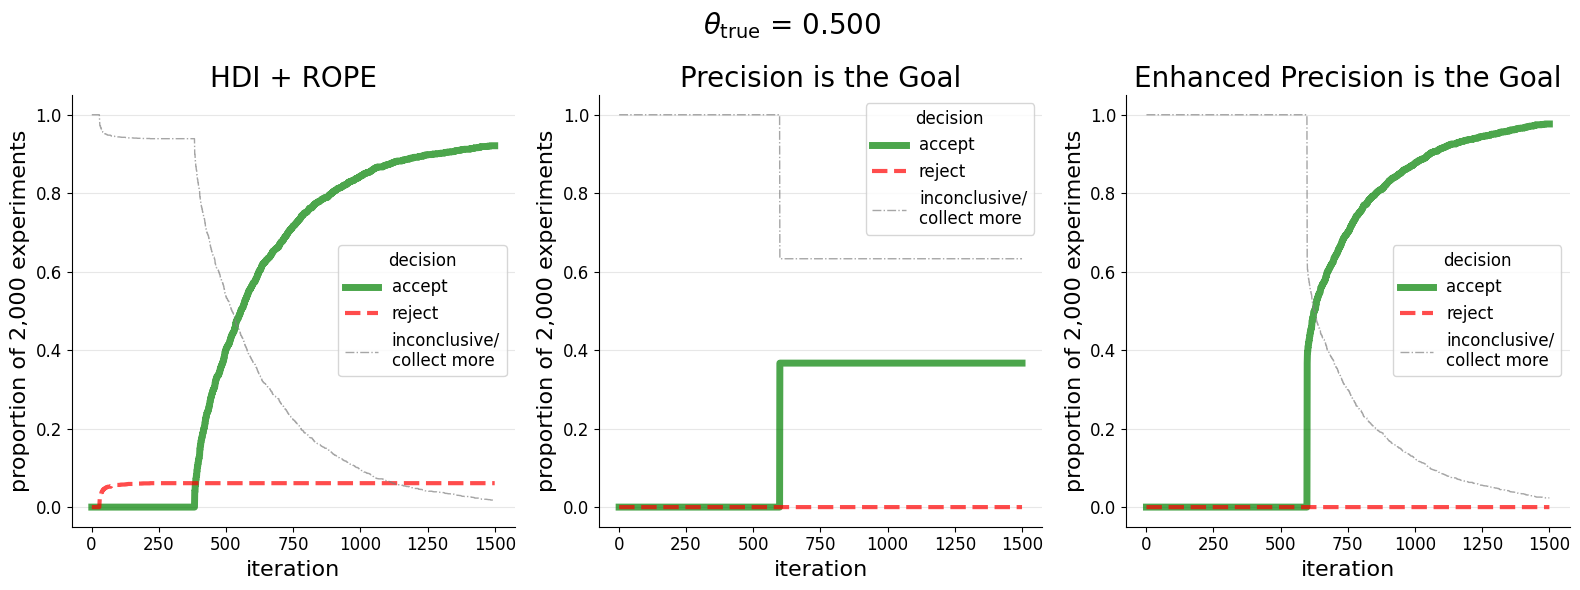

In [14]:


hypothesis_0pt5.plot_decision_rates(synth_0pt5.success_rate, viz_epitg="separate")

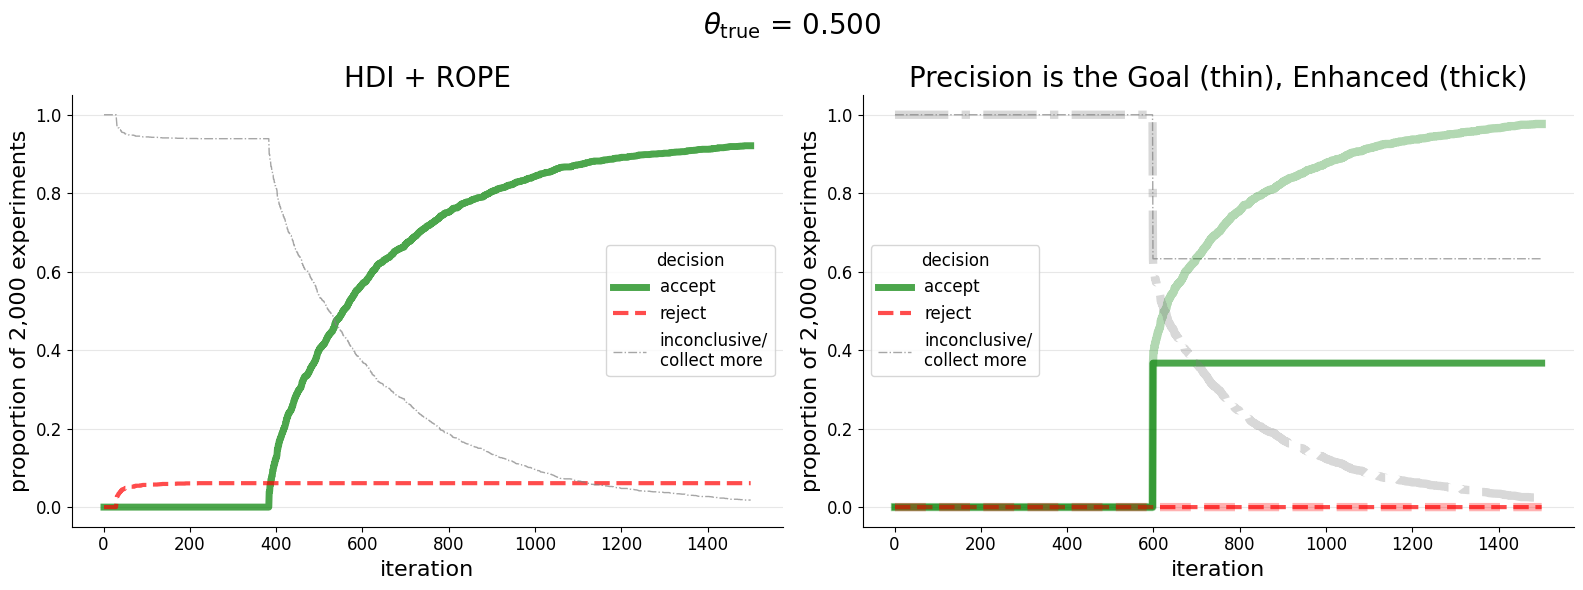

In [ ]:
hypothesis_0pt5.plot_decision_rates(synth_0pt5.success_rate)

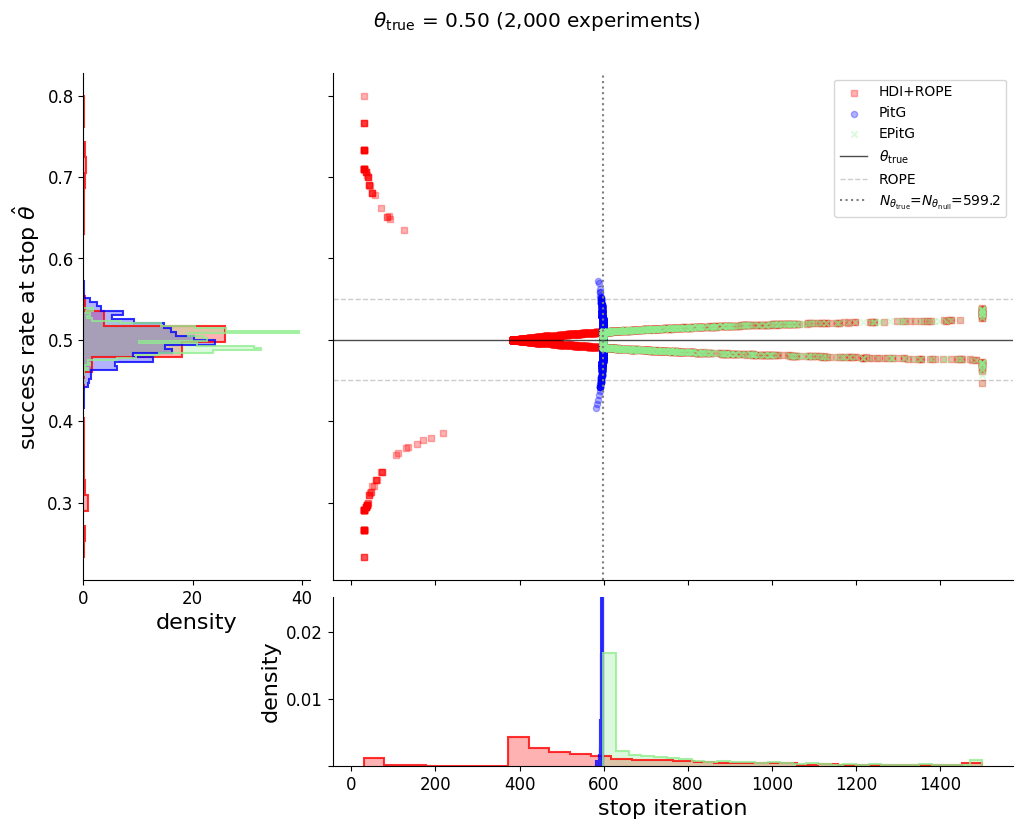

In [70]:
hypothesis_0pt5.plot_stop_iter_sample_rates(success_rate=synth_0pt5.success_rate, title=None)

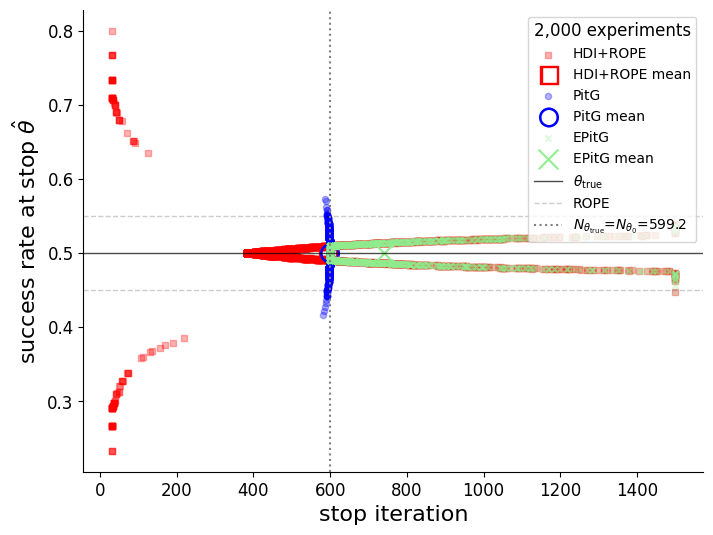

In [56]:
hypothesis_0pt5.plot_stop_iter_sample_rates(success_rate=synth_0pt5.success_rate, title=None)

In [16]:
# experiment ids for which:
# - HDI_ROPE method had success rate > 0.55
# - PITG method was inconclusive
# - EPITG method was conclusive

experiment_idxs = list(sorted(set(hypothesis_0pt5.method_df_stats["pitg"].query("inconclusive").index) &\
set(hypothesis_0pt5.method_df_stats["epitg"].query("accept").index) &\
set(hypothesis_0pt5.method_df_stats["hdi_rope"].query("success_rate > 0.55").index)))
len(experiment_idxs)

35

1011010001100100001011111111100101011011100011111100101001101111111101110011110011100111100010100010111101011111100011111111111000001010010011000000011010001000100000000100101110011101001110000100101100110100001010111100111111110111001010110111001001010100111101010011110111001011100100110010100100010010110101010101001111001100110110111011100101000101100110011001011110011111011101010100011011101111000101101010101010101111000010001110110010101011001001100100011011011111001110000100110010000010101100101011010000011001010001101011100101011010001001101001001001101101001010111000011010001111110010011111001000111000110001010010101011100100001101111011110111001110110100100010010011110111001000001000111000000100101111110111101010001101100100011001010111100000010011011111000000010100110010011100010101000001011111001011100110110101110010000111100100111111100111111111001110110100001011101100011001110010000100111011001110001100101000000011011100001100111001110111001010011010100110010101000110000000

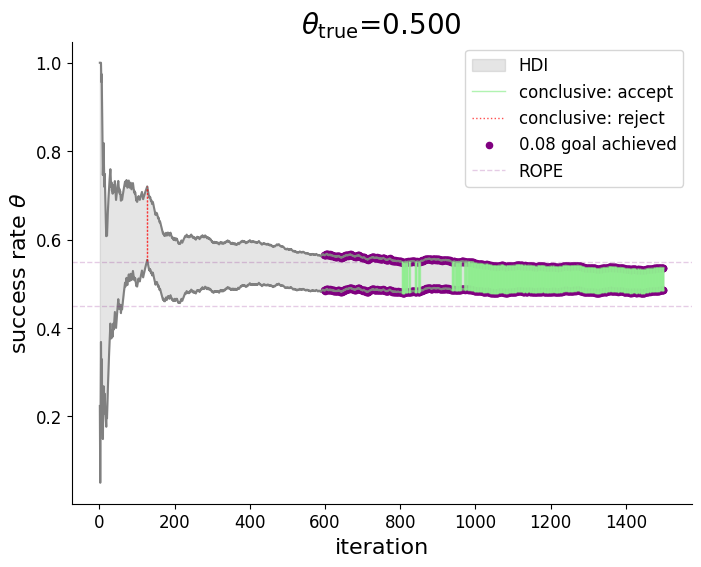

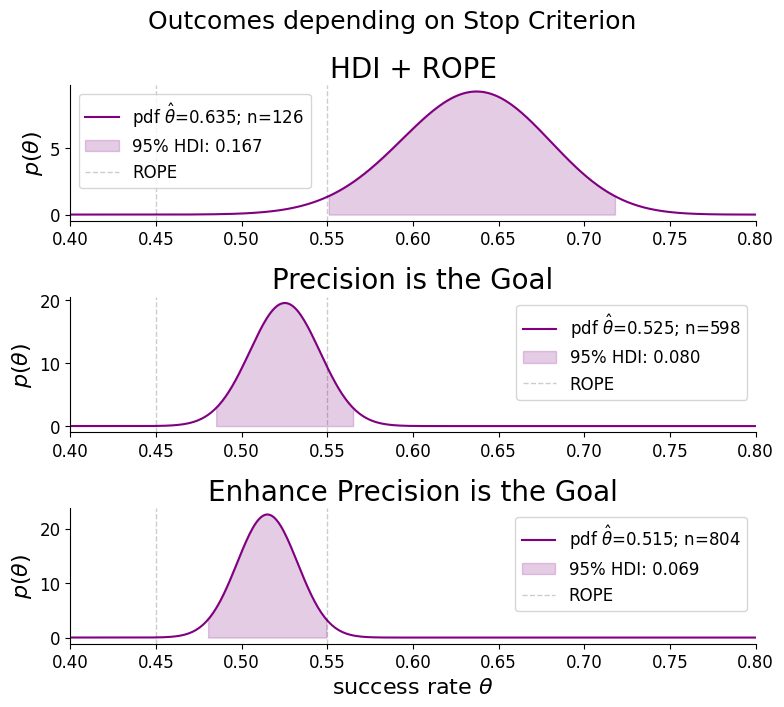

In [17]:
# Visualising outcomes of one experiment

#iexperiment = experiment_idxs[1]  # good example
iexperiment = experiment_idxs[2]  # good example

# for viz
method_names = ["hdi_rope", "pitg", "epitg"]

print("".join([f"{b_}" for b_ in hypothesis_0pt5.experiments[iexperiment,:] ]))

xlim = (0.4, 0.8)
df_experiment_results = hypothesis_0pt5.one_experiment_all_iterations(iexperiment, binary_accounting=binary_accounting, viz=True, success_rate=synth_0pt5.success_rate, method_names=method_names, xlim=xlim)

plt.savefig('../latex/foo.png')

In [ ]:
# Bayes Factor, by ChatGPT: https://chatgpt.com/c/687359bf-a0b0-8003-b5a4-3f5c89fa7d63

# TODO: perhaps put in appendix?

from scipy.stats import binom
from scipy.special import beta as beta_special
print(hypothesis_0pt5.experiments[iexperiment,:])

k = hypothesis_0pt5.experiments[iexperiment,:126].sum()
n = hypothesis_0pt5.experiments[iexperiment,:126].shape[0]

print(n, k, k/n)

# H0: Fair coin (theta = 0.5)
p_H0 = binom.pmf(k, n, 0.5)

# H1: Uniform prior on theta => beta-binomial marginal likelihood
# P(D | H1) = B(k+1, n-k+1) / B(1,1)
p_H1 = beta_special(k + 1, n - k + 1) / beta_special(1, 1)

# Bayes Factor
BF_10 = p_H1 / p_H0

p_H0, p_H1, BF_10

[1 0 1 ... 1 1 0]
126 80 0.6349206349206349


(0.0007080591411767416, 1.3072158089385334e-37, 1.8461957948400159e-34)

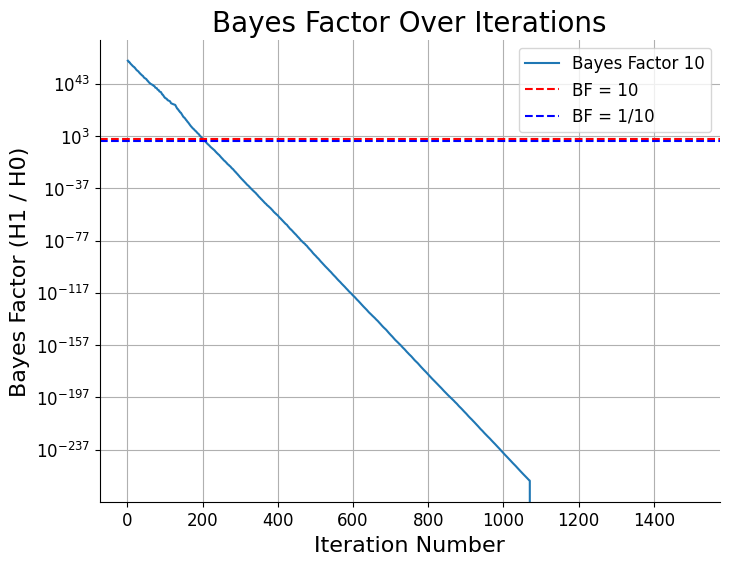

In [54]:
a_prior = 100  # Uniform prior
b_prior = 100  # Uniform prior
p_null = 0.5  # Null hypothesis probability

sequence = hypothesis_0pt5.experiments[iexperiment,:].copy()

iteration_number = np.arange(1, len(sequence) + 1)
iteration_successes = sequence.cumsum()
iteration_failures = iteration_number - iteration_successes

p_H0s = binom.pmf(iteration_successes, iteration_number, p_null)
p_H1s = beta_special(iteration_successes + 1, iteration_failures + 1) / beta_special(a_prior, b_prior)

BF_10s = p_H1s / p_H0s


plt.plot(iteration_number, BF_10s, label='Bayes Factor 10')
plt.yscale('log')

plt.axhline(10, color='red', linestyle='--', label='BF = 10')
plt.axhline(1/10, color='blue', linestyle='--', label='BF = 1/10')
plt.xlabel('Iteration Number')
plt.ylabel('Bayes Factor (H1 / H0)')
plt.title('Bayes Factor Over Iterations')
plt.legend()
plt.grid(True)
#plt.ylim(1./1000, 1000)

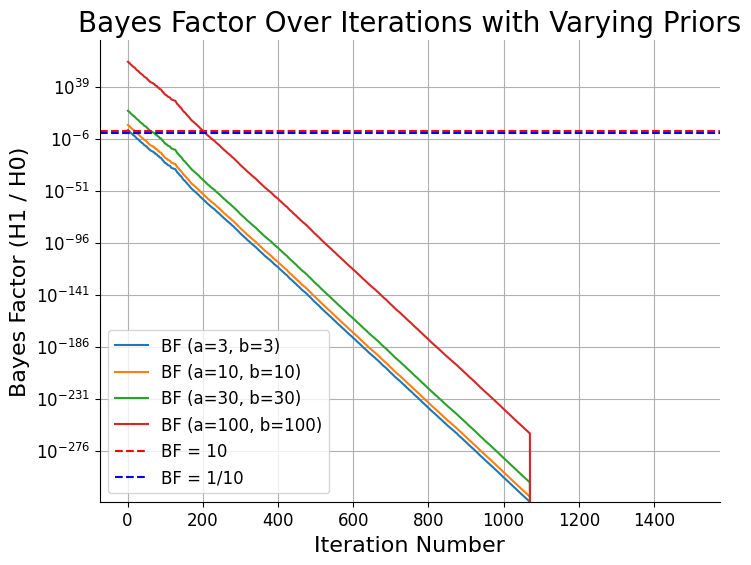

In [63]:
a_priors = [3, 10, 30, 100]
b_priors = [3, 10, 30, 100]

for a_prior, b_prior in zip(a_priors, b_priors):
    p_H1s = beta_special(iteration_successes + 1, iteration_failures + 1) / beta_special(a_prior, b_prior)
    BF_10s = p_H1s / p_H0s
    plt.plot(iteration_number, BF_10s, label=f'BF (a={a_prior}, b={b_prior})')

plt.yscale('log')
plt.axhline(10, color='red', linestyle='--', label='BF = 10')
plt.axhline(1/10, color='blue', linestyle='--', label='BF = 1/10')
plt.xlabel('Iteration Number')
plt.ylabel('Bayes Factor (H1 / H0)')
plt.title('Bayes Factor Over Iterations with Varying Priors')
plt.legend()
plt.grid(True)
#plt.ylim(1./1000, 1000)

In [ ]:
# printing just a segment. This is useful for identifying interesting patterns
# print("".join([f"{b_}" for b_ in hypothesis_0pt5.experiments[iexperiment,750:804] ]))


011110000001001101111100000001010011001001110001010100


## Loaded Coin $\theta_{\rm true}=0.6$

In [18]:
%%time

synth_0pt6 = BinomialSimulation(success_rate=0.6, n_experiments=2000)
print("-" * 40)
hypothesis_0pt5_true0pt6 = BinomialHypothesis()
hypothesis_0pt5_true0pt6.run_hypothesis_on_experiments(synth_0pt6.experiments, binary_accounting)

Generating synthetic data with parameter values:
0.6: true success rate
2000: experiments
1500: sample size per experiment
----------------------------------------
0.5: null hypothesis
0.45: ROPE min
0.55: ROPE max
--------------------
0.08: Precision Goal
Sample 475 at final iteration
{'decision_iteration': 1500, 'accept': False, 'reject_below': False, 'reject_above': False, 'conclusive': False, 'inconclusive': True, 'successes': 861, 'failures': 639, 'hdi_min': 0.5489626323111325, 'hdi_max': 0.5989867505889424, 'precision_goal_achieved': True}
Sample 565 at final iteration
{'decision_iteration': 1500, 'accept': False, 'reject_below': False, 'reject_above': False, 'conclusive': False, 'inconclusive': True, 'successes': 859, 'failures': 641, 'hdi_min': 0.5476209931234249, 'hdi_max': 0.597665145471056, 'precision_goal_achieved': True}
Sample 573 at final iteration
{'decision_iteration': 1500, 'accept': False, 'reject_below': False, 'reject_above': False, 'conclusive': False, 'inconclusi

accept  reject  conclusive  inconclusive  stop_iter_mean  \
hdi_rope     0.0  0.9920      0.9920        0.0080        278.5250   
pitg         0.0  0.6930      0.6930        0.3070        574.0995   
epitg        0.0  0.9905      0.9905        0.0095        638.4050   

          stop_iter_std  success_rate_mean  success_rate_std  
hdi_rope     296.550922           0.642112          0.056068  
pitg          10.032693           0.600358          0.020512  
epitg        164.652043           0.602890          0.017084

CPU times: user 2min 52s, sys: 556 ms, total: 2min 52s
Wall time: 2min 53s


In [56]:
hypothesis_0pt5_true0pt6.method_df_stats['pitg']['success_rate'].mean(), hypothesis_0pt5_true0pt6.method_df_stats['pitg'].query("conclusive")['success_rate'].mean(), hypothesis_0pt5_true0pt6.method_df_stats['pitg'].query("inconclusive")['success_rate'].mean()

(0.6003584726351877, 0.6107158481855339, 0.5769784685427052)

In [ ]:
print("True = 0.6")
print("-" * 40)
_ = report_success_rates_multiple_algos(hypothesis_0pt5_true0pt6.method_df_stats.copy())

True = 0.6
----------------------------------------


count    frac      mean       std       p25    median  \
algorithm group                                                                 
pitg      overall        2000  1.0000  0.600358  0.020512  0.586919  0.600000   
          conclusive     1386  0.6930  0.610716  0.014524  0.598958  0.607706   
          inconclusive    614  0.3070  0.576978  0.010264  0.570698  0.578767   
          reject         1386  0.6930  0.610716  0.014524  0.598958  0.607706   
epitg     overall        2000  1.0000  0.602890  0.017084  0.589491  0.600000   
          conclusive     1981  0.9905  0.603219  0.016824  0.589615  0.600000   
          inconclusive     19  0.0095  0.568596  0.005052  0.567333  0.570000   
          reject         1981  0.9905  0.603219  0.016824  0.589615  0.600000   
hdi_rope  overall        2000  1.0000  0.642112  0.056068  0.598485  0.624242   
          conclusive     1984  0.9920  0.642695  0.055915  0.598972  0.624277   
          inconclusive     16  0.0080  0.569833  0.002727  0.568500  0.570333   
          reject         1984  0.9920  0.642695  0.055915  0.598972  0.624277   

                             p75  
algorithm group                   
pitg      overall       0.614437  
          conclusive    0.619469  
          inconclusive  0.584192  
          reject        0.619469  
epitg     overall       0.614437  
          conclusive    0.614437  
          inconclusive  0.571000  
          reject        0.614437  
hdi_rope  overall       0.680000  
          conclusive    0.680000  
          inconclusive  0.571333  
          reject        0.680000

viz_epitg separate


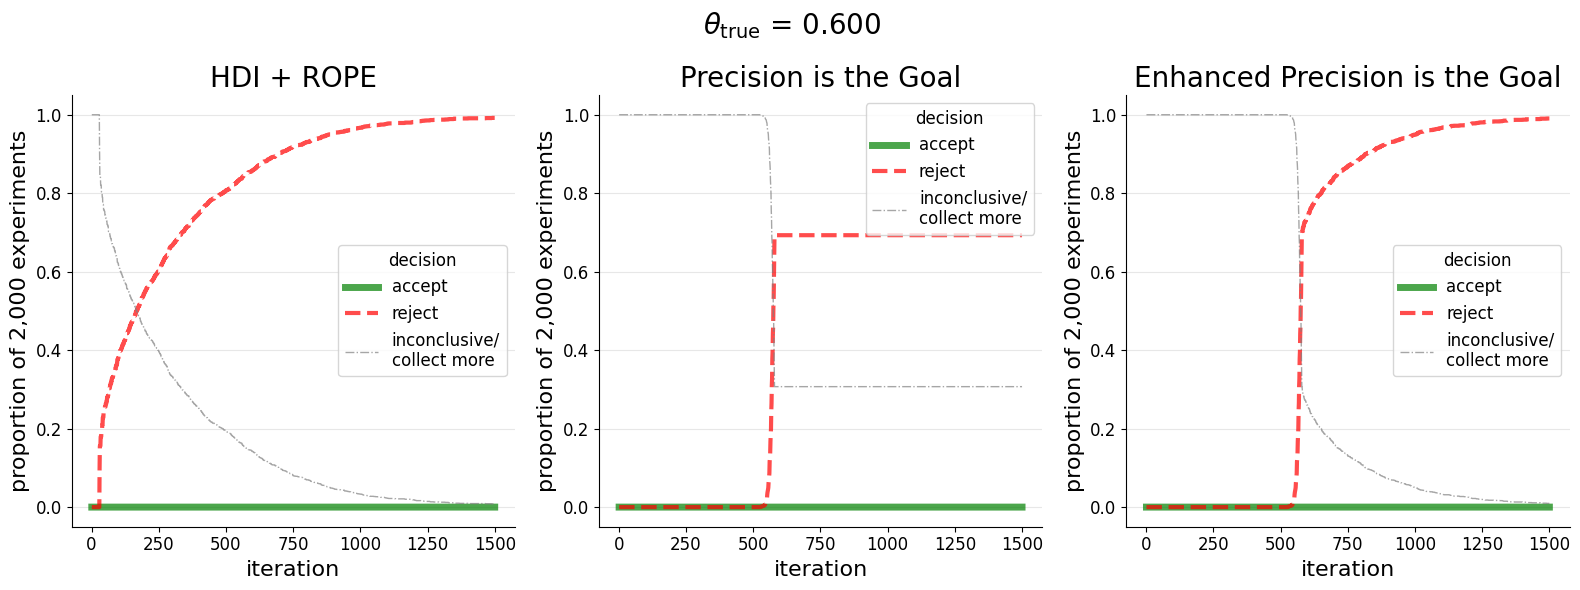

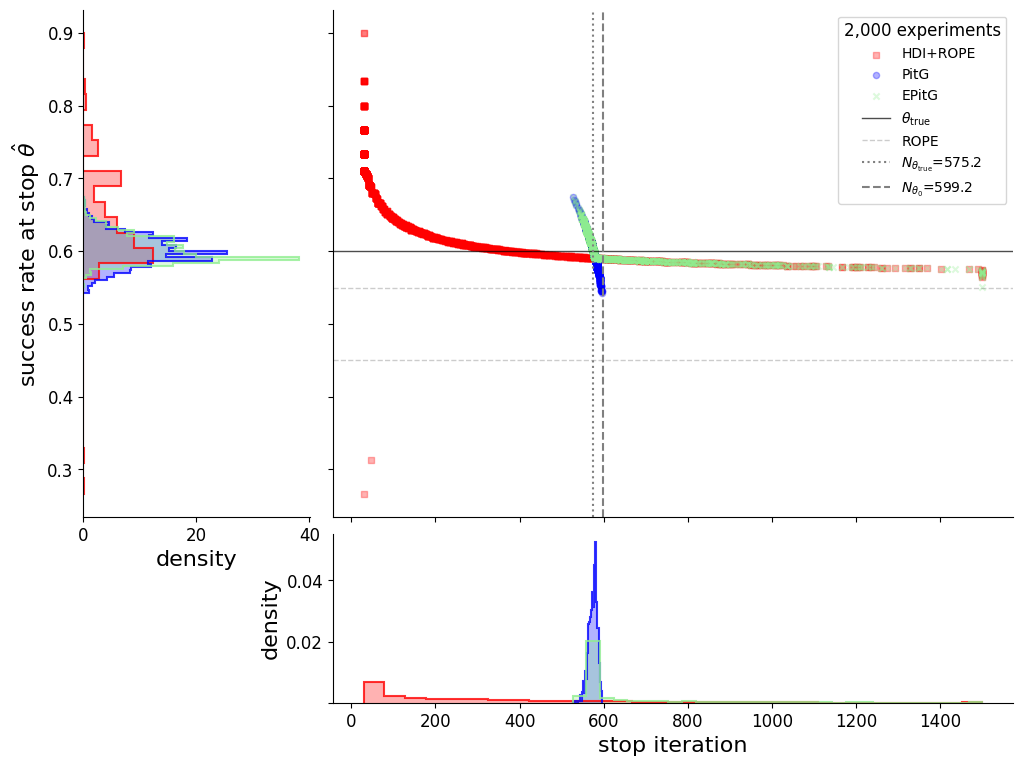

In [63]:
hypothesis_0pt5_true0pt6.plot_decision_rates(synth_0pt6.success_rate, viz_epitg="separate")
plt.show()
hypothesis_0pt5_true0pt6.plot_stop_iter_sample_rates(success_rate=synth_0pt6.success_rate, title=None)
plt.show()

In [23]:
%%time

synth_0pt57 = BinomialSimulation(success_rate=0.57, n_experiments=2000)
hypothesis_0pt5_true0pt57 = BinomialHypothesis()
hypothesis_0pt5_true0pt57.run_hypothesis_on_experiments(synth_0pt57.experiments, binary_accounting)

Generating synthetic data with parameter values:
0.57: true success rate
2000: experiments
1500: sample size per experiment
0.5: null hypothesis
0.45: ROPE min
0.55: ROPE max
--------------------
0.08: Precision Goal
Sample 0 at final iteration
{'decision_iteration': 1500, 'accept': False, 'reject_below': False, 'reject_above': False, 'conclusive': False, 'inconclusive': True, 'successes': 840, 'failures': 660, 'hdi_min': 0.534867547044455, 'hdi_max': 0.5850835156227976, 'precision_goal_achieved': True}
Sample 1 at final iteration
{'decision_iteration': 1500, 'accept': False, 'reject_below': False, 'reject_above': False, 'conclusive': False, 'inconclusive': True, 'successes': 853, 'failures': 647, 'hdi_min': 0.5435971864178839, 'hdi_max': 0.5936992132066574, 'precision_goal_achieved': True}
Sample 2 at final iteration
{'decision_iteration': 1500, 'accept': False, 'reject_below': False, 'reject_above': False, 'conclusive': False, 'inconclusive': True, 'successes': 859, 'failures': 641, 

accept  reject  conclusive  inconclusive  stop_iter_mean  \
hdi_rope  0.0080  0.6480      0.6560        0.3440        804.6165   
pitg      0.0005  0.1570      0.1575        0.8425        586.4470   
epitg     0.0035  0.5415      0.5450        0.4550       1127.1755   

          stop_iter_std  success_rate_mean  success_rate_std  
hdi_rope     611.021115           0.604697          0.058295  
pitg           7.116144           0.570288          0.020308  
epitg        395.941462           0.575583          0.017217

CPU times: user 1min 7s, sys: 470 ms, total: 1min 7s
Wall time: 1min 7s


viz_epitg separate


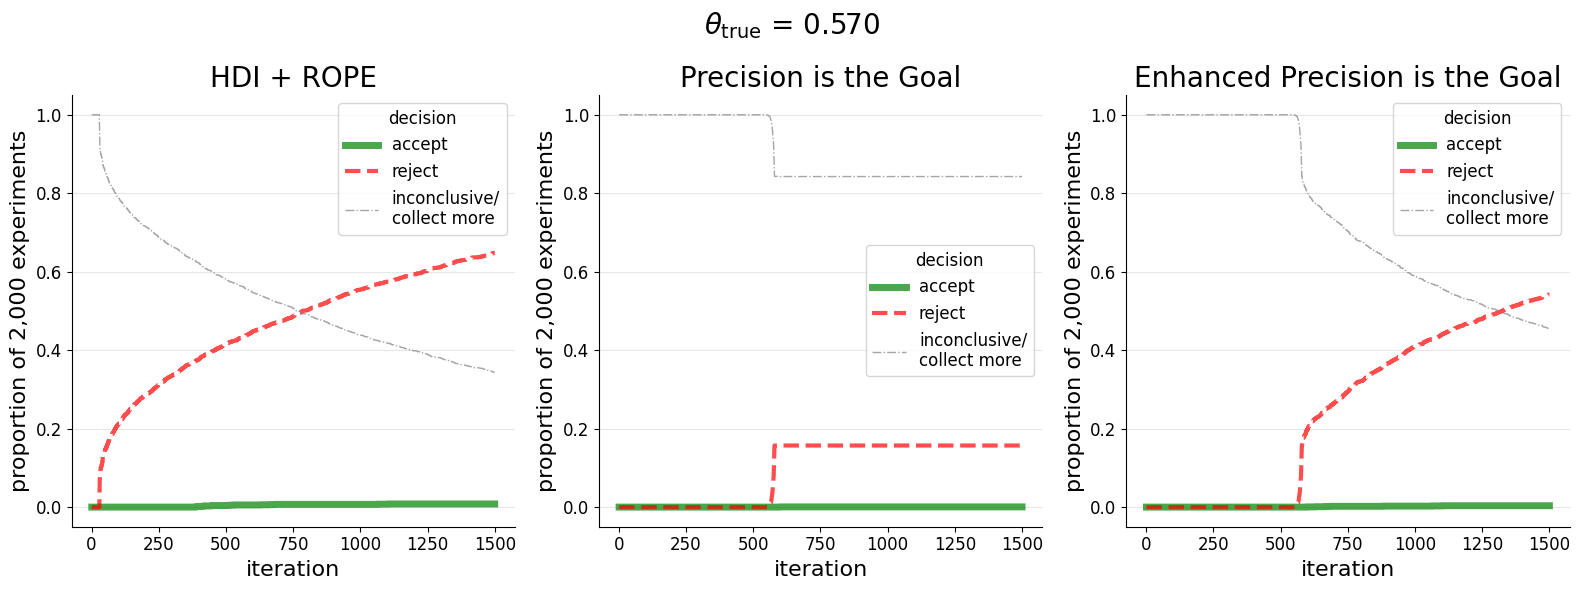

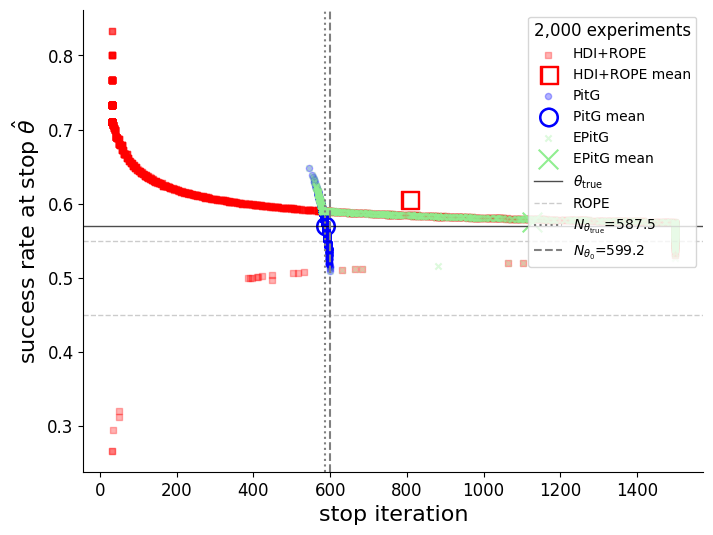

In [24]:
hypothesis_0pt5_true0pt57.plot_decision_rates(synth_0pt57.success_rate)
plt.show()
hypothesis_0pt5_true0pt57.plot_stop_iter_sample_rates(success_rate=synth_0pt57.success_rate, title=None)
plt.show()

In [25]:
print("True = 0.57")
print("-" * 40)
report_success_rates_multiple_algos(hypothesis_0pt5_true0pt57.method_df_stats.copy())

True = 0.57
----------------------------------------
pitg
overall         0.570288
conclusive      0.601331
inconclusive    0.564484
accept          0.509182
reject          0.601625
dtype: float64
----------------------------------------
epitg
overall         0.575583
conclusive      0.588071
inconclusive    0.560624
accept          0.514473
reject          0.588546
dtype: float64
----------------------------------------
hdi_rope
overall         0.604697
conclusive      0.627897
inconclusive    0.560453
accept          0.506296
reject          0.629398
dtype: float64
----------------------------------------


Generating synthetic data with parameter values:
0.85: true success rate
2000: experiments
1500: sample size per experiment
0.5: null hypothesis
0.45: ROPE min
0.55: ROPE max
--------------------
0.08: Precision Goal


accept  reject  conclusive  inconclusive  stop_iter_mean  \
hdi_rope     0.0     1.0         1.0           0.0          30.131   
pitg         0.0     1.0         1.0           0.0         292.417   
epitg        0.0     1.0         1.0           0.0         292.417   

          stop_iter_std  success_rate_mean  success_rate_std  
hdi_rope       1.085093           0.852352          0.064402  
pitg          52.910149           0.855043          0.027878  
epitg         52.910149           0.855043          0.027878

viz_epitg separate


count  success_frac  success_mean  success_std  \
algorithm group                                                        
pitg      overall      2000           1.0      0.855043     0.027878   
          conclusive   2000           1.0      0.855043     0.027878   
          reject       2000           1.0      0.855043     0.027878   
epitg     overall      2000           1.0      0.855043     0.027878   
          conclusive   2000           1.0      0.855043     0.027878   
          reject       2000           1.0      0.855043     0.027878   
hdi_rope  overall      2000           1.0      0.852352     0.064402   
          conclusive   2000           1.0      0.852352     0.064402   
          reject       2000           1.0      0.852352     0.064402   

                      success_p25  success_median  success_p75  \
algorithm group                                                  
pitg      overall        0.838509        0.850993     0.867647   
          conclusive     0.838509        0.850993     0.867647   
          reject         0.838509        0.850993     0.867647   
epitg     overall        0.838509        0.850993     0.867647   
          conclusive     0.838509        0.850993     0.867647   
          reject         0.838509        0.850993     0.867647   
hdi_rope  overall        0.800000        0.866667     0.900000   
          conclusive     0.800000        0.866667     0.900000   
          reject         0.800000        0.866667     0.900000   

                      stop_iter_mean  stop_iter_std  stop_iter_p25  \
algorithm group                                                      
pitg      overall            292.417      52.910149          272.0   
          conclusive         292.417      52.910149          272.0   
          reject             292.417      52.910149          272.0   
epitg     overall            292.417      52.910149          272.0   
          conclusive         292.417      52.910149          272.0   
          reject             292.417      52.910149          272.0   
hdi_rope  overall             30.131       1.085093           30.0   
          conclusive          30.131       1.085093           30.0   
          reject              30.131       1.085093           30.0   

                      stop_iter_median  stop_iter_p75  conclusive_mean  
algorithm group                                                         
pitg      overall                302.0          322.0              1.0  
          conclusive             302.0          322.0              1.0  
          reject                 302.0          322.0              1.0  
epitg     overall                302.0          322.0              1.0  
          conclusive             302.0          322.0              1.0  
          reject                 302.0          322.0              1.0  
hdi_rope  overall                 30.0           30.0              1.0  
          conclusive              30.0           30.0              1.0  
          reject                  30.0           30.0              1.0

CPU times: user 3.52 s, sys: 362 ms, total: 3.88 s
Wall time: 3.29 s


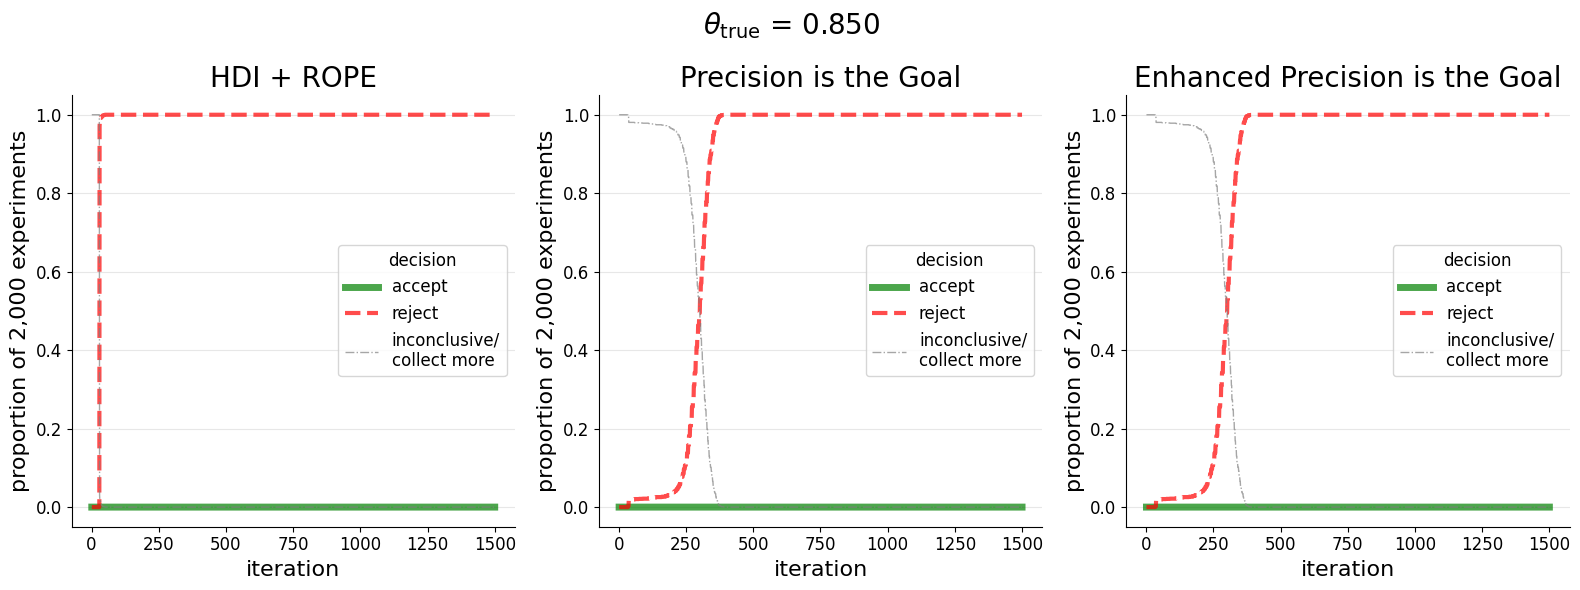

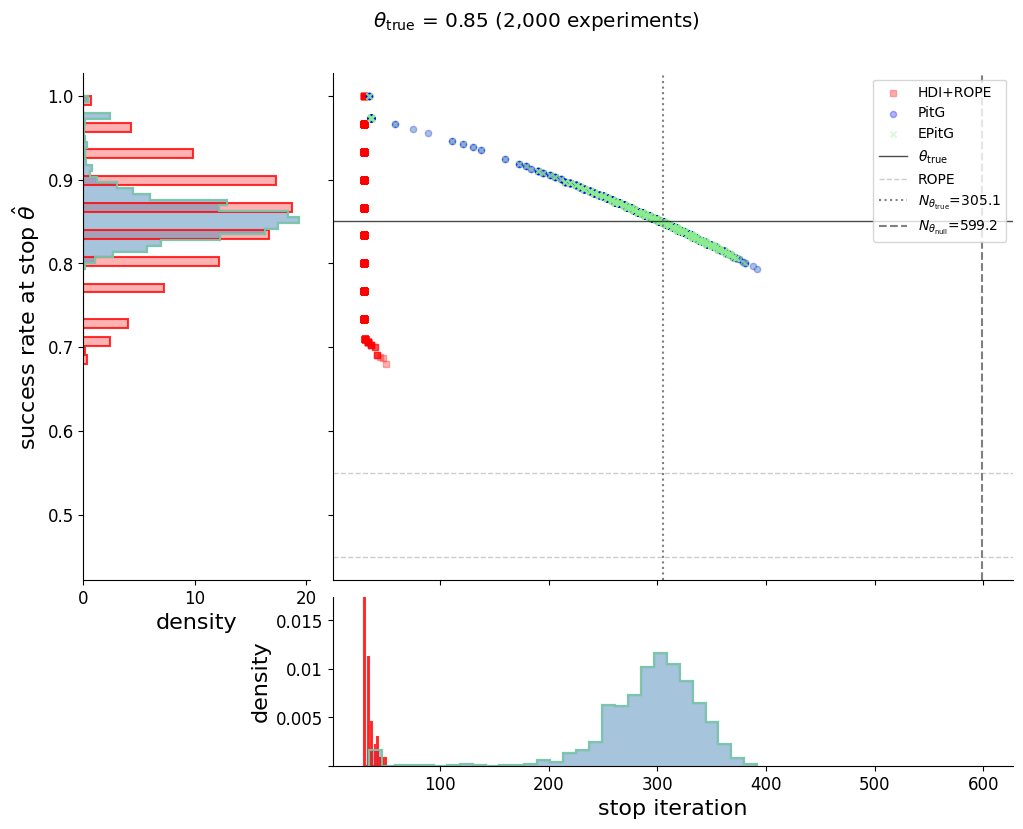

In [175]:
%%time

analysis_0pt85 = run_simulations_and_analysis_report(binary_accounting, success_rate_true=0.85)

Observations

* ePitG and PitG are the same
* HDI+ROPE does the job much faster within ~30 iterations.
* All quite broad bias

Generating synthetic data with parameter values:
0.75: true success rate
2000: experiments
1500: sample size per experiment
0.5: null hypothesis
0.45: ROPE min
0.55: ROPE max
--------------------
0.08: Precision Goal


accept  reject  conclusive  inconclusive  stop_iter_mean  \
hdi_rope     0.0     1.0         1.0           0.0         34.0180   
pitg         0.0     1.0         1.0           0.0        446.2945   
epitg        0.0     1.0         1.0           0.0        446.2945   

          stop_iter_std  success_rate_mean  success_rate_std  
hdi_rope       9.801720           0.763173          0.063243  
pitg          25.542552           0.751059          0.020881  
epitg         25.542552           0.751059          0.020881

viz_epitg separate


count  success_frac  success_mean  success_std  \
algorithm group                                                        
pitg      overall      2000           1.0      0.751059     0.020881   
          conclusive   2000           1.0      0.751059     0.020881   
          reject       2000           1.0      0.751059     0.020881   
epitg     overall      2000           1.0      0.751059     0.020881   
          conclusive   2000           1.0      0.751059     0.020881   
          reject       2000           1.0      0.751059     0.020881   
hdi_rope  overall      2000           1.0      0.763173     0.063243   
          conclusive   2000           1.0      0.763173     0.063243   
          reject       2000           1.0      0.763173     0.063243   

                      success_p25  success_median  success_p75  \
algorithm group                                                  
pitg      overall        0.737069        0.750000     0.765116   
          conclusive     0.737069        0.750000     0.765116   
          reject         0.737069        0.750000     0.765116   
epitg     overall        0.737069        0.750000     0.765116   
          conclusive     0.737069        0.750000     0.765116   
          reject         0.737069        0.750000     0.765116   
hdi_rope  overall        0.709677        0.766667     0.800000   
          conclusive     0.709677        0.766667     0.800000   
          reject         0.709677        0.766667     0.800000   

                      stop_iter_mean  stop_iter_std  stop_iter_p25  \
algorithm group                                                      
pitg      overall           446.2945      25.542552          430.0   
          conclusive        446.2945      25.542552          430.0   
          reject            446.2945      25.542552          430.0   
epitg     overall           446.2945      25.542552          430.0   
          conclusive        446.2945      25.542552          430.0   
          reject            446.2945      25.542552          430.0   
hdi_rope  overall            34.0180       9.801720           30.0   
          conclusive         34.0180       9.801720           30.0   
          reject             34.0180       9.801720           30.0   

                      stop_iter_median  stop_iter_p75  conclusive_mean  
algorithm group                                                         
pitg      overall                448.0          464.0              1.0  
          conclusive             448.0          464.0              1.0  
          reject                 448.0          464.0              1.0  
epitg     overall                448.0          464.0              1.0  
          conclusive             448.0          464.0              1.0  
          reject                 448.0          464.0              1.0  
hdi_rope  overall                 30.0           31.0              1.0  
          conclusive              30.0           31.0              1.0  
          reject                  30.0           31.0              1.0

CPU times: user 4.37 s, sys: 207 ms, total: 4.58 s
Wall time: 4.21 s


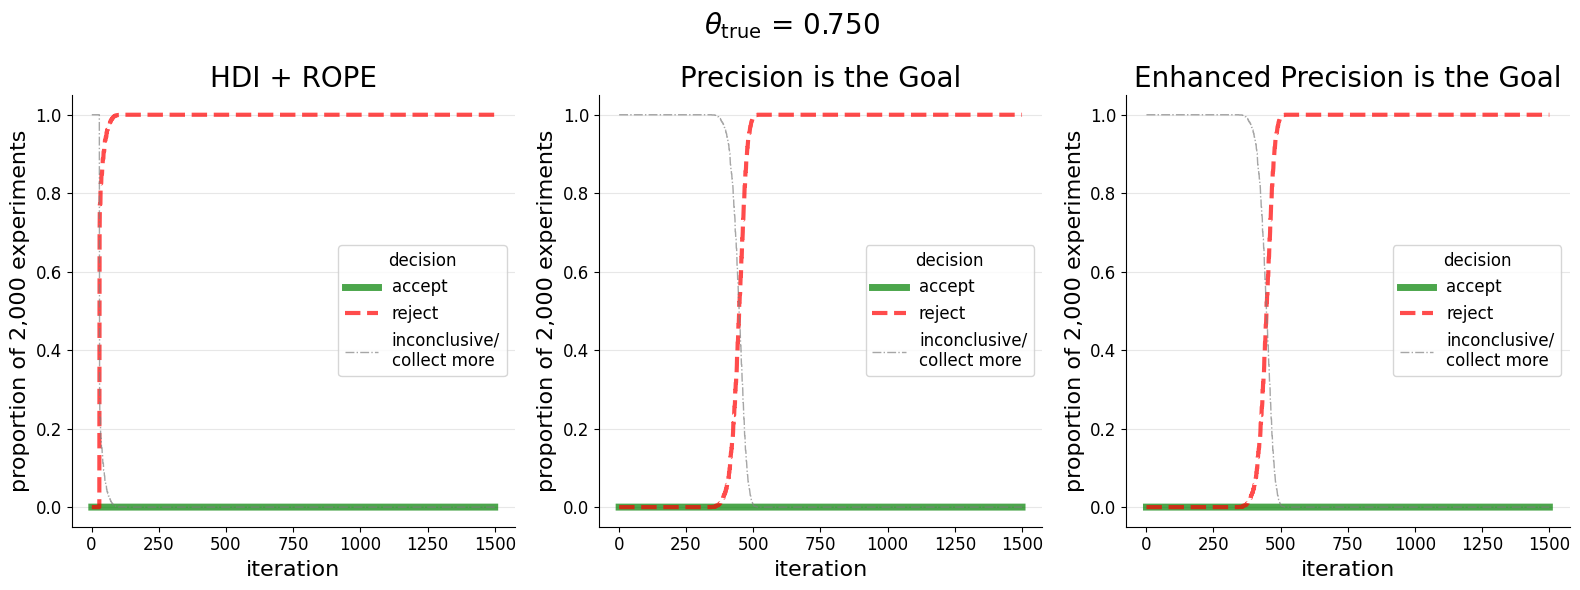

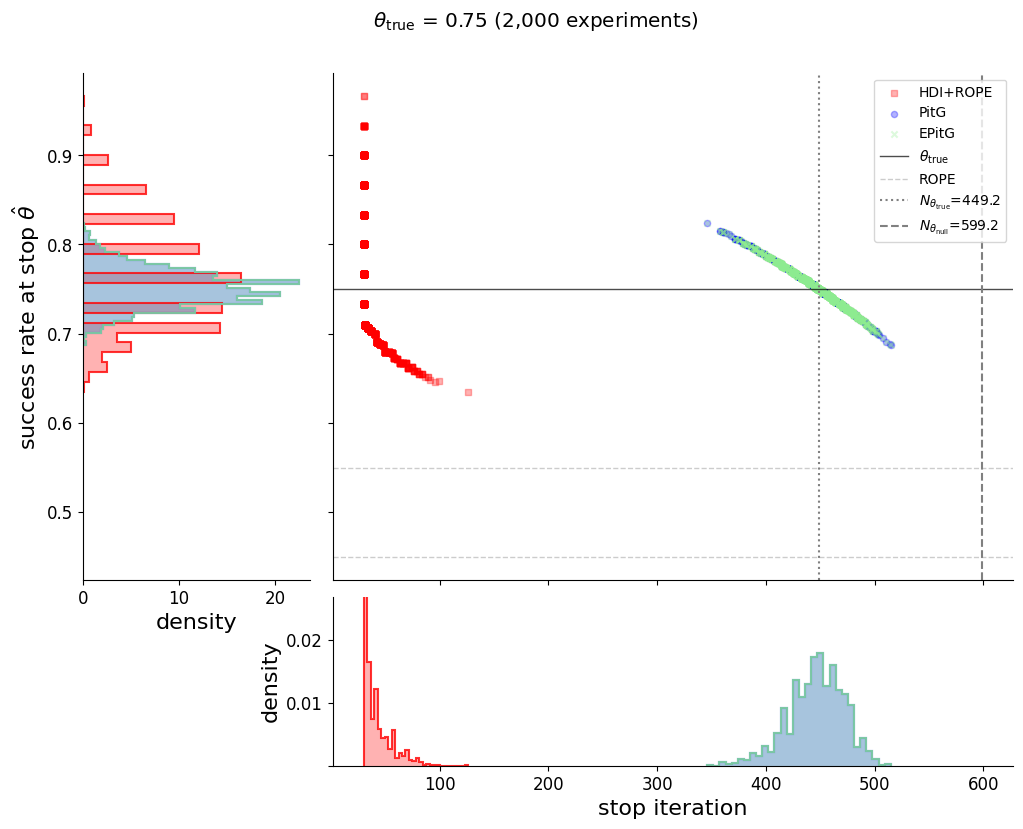

In [176]:
%%time

analysis_0pt75 = run_simulations_and_analysis_report(binary_accounting, success_rate_true=0.75)

Generating synthetic data with parameter values:
0.7: true success rate
2000: experiments
1500: sample size per experiment
0.5: null hypothesis
0.45: ROPE min
0.55: ROPE max
--------------------
0.08: Precision Goal


accept  reject  conclusive  inconclusive  stop_iter_mean  \
hdi_rope     0.0     1.0         1.0           0.0         44.9115   
pitg         0.0     1.0         1.0           0.0        501.1045   
epitg        0.0     1.0         1.0           0.0        501.1045   

          stop_iter_std  success_rate_mean  success_rate_std  
hdi_rope      26.411237           0.724765          0.058644  
pitg          20.766420           0.700835          0.021128  
epitg         20.766420           0.700835          0.021128

viz_epitg separate


count  success_frac  success_mean  success_std  \
algorithm group                                                        
pitg      overall      2000           1.0      0.700835     0.021128   
          conclusive   2000           1.0      0.700835     0.021128   
          reject       2000           1.0      0.700835     0.021128   
epitg     overall      2000           1.0      0.700835     0.021128   
          conclusive   2000           1.0      0.700835     0.021128   
          reject       2000           1.0      0.700835     0.021128   
hdi_rope  overall      2000           1.0      0.724765     0.058644   
          conclusive   2000           1.0      0.724765     0.058644   
          reject       2000           1.0      0.724765     0.058644   

                      success_p25  success_median  success_p75  \
algorithm group                                                  
pitg      overall        0.686047        0.699801     0.713701   
          conclusive     0.686047        0.699801     0.713701   
          reject         0.686047        0.699801     0.713701   
epitg     overall        0.686047        0.699801     0.713701   
          conclusive     0.686047        0.699801     0.713701   
          reject         0.686047        0.699801     0.713701   
hdi_rope  overall        0.680000        0.709677     0.766667   
          conclusive     0.680000        0.709677     0.766667   
          reject         0.680000        0.709677     0.766667   

                      stop_iter_mean  stop_iter_std  stop_iter_p25  \
algorithm group                                                      
pitg      overall           501.1045      20.766420          489.0   
          conclusive        501.1045      20.766420          489.0   
          reject            501.1045      20.766420          489.0   
epitg     overall           501.1045      20.766420          489.0   
          conclusive        501.1045      20.766420          489.0   
          reject            501.1045      20.766420          489.0   
hdi_rope  overall            44.9115      26.411237           30.0   
          conclusive         44.9115      26.411237           30.0   
          reject             44.9115      26.411237           30.0   

                      stop_iter_median  stop_iter_p75  conclusive_mean  
algorithm group                                                         
pitg      overall                503.0          516.0              1.0  
          conclusive             503.0          516.0              1.0  
          reject                 503.0          516.0              1.0  
epitg     overall                503.0          516.0              1.0  
          conclusive             503.0          516.0              1.0  
          reject                 503.0          516.0              1.0  
hdi_rope  overall                 31.0           50.0              1.0  
          conclusive              31.0           50.0              1.0  
          reject                  31.0           50.0              1.0

CPU times: user 4.67 s, sys: 216 ms, total: 4.88 s
Wall time: 4.56 s


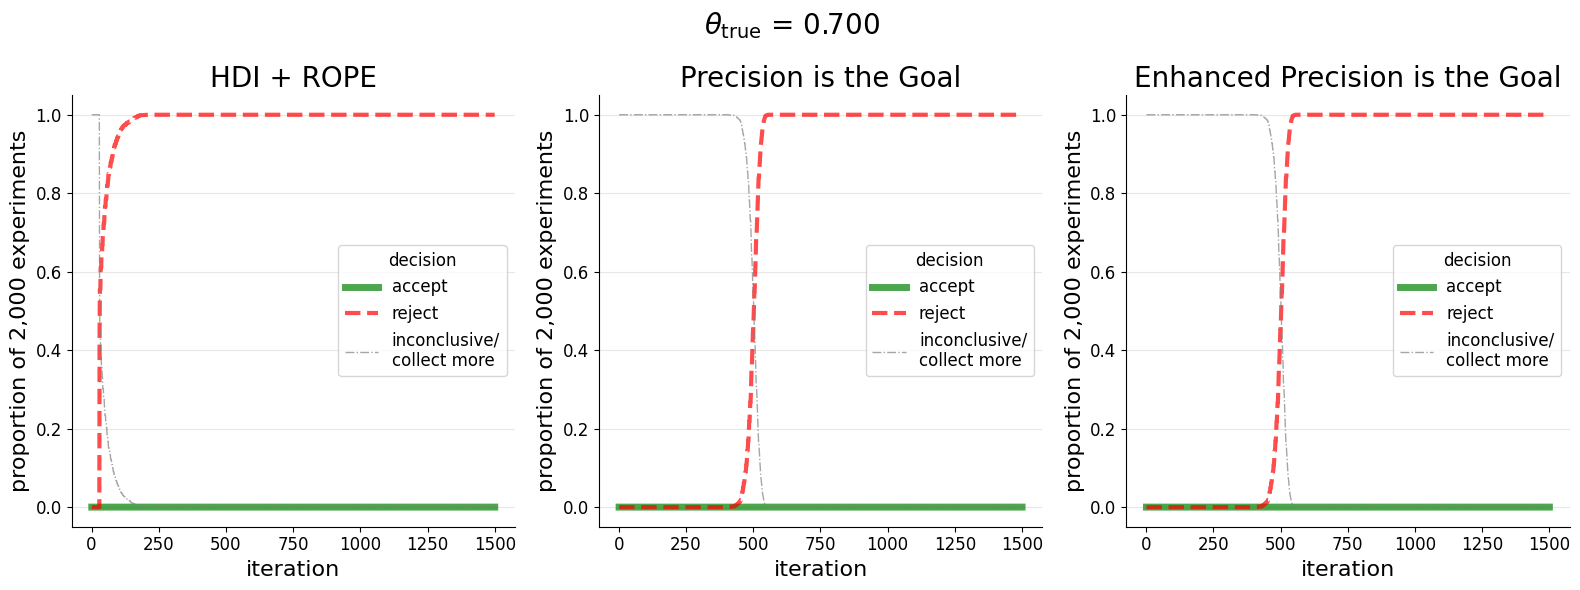

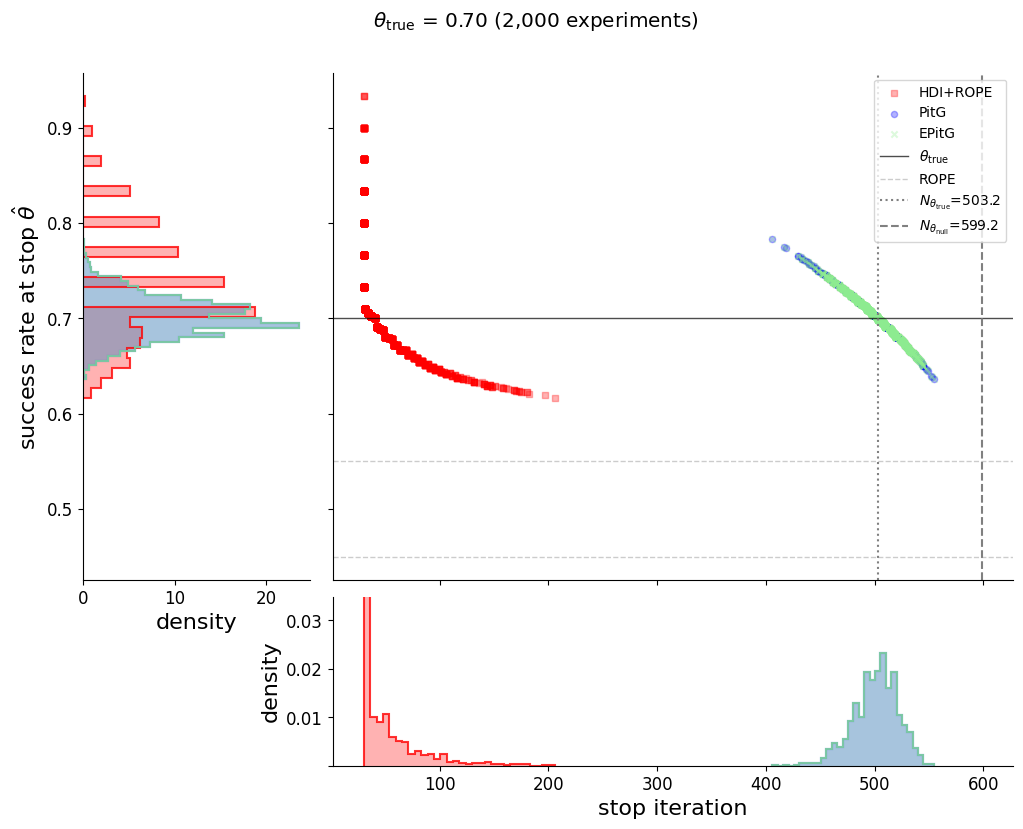

In [177]:
%%time

analysis_0pt70 = run_simulations_and_analysis_report(binary_accounting, success_rate_true=0.7)

Generating synthetic data with parameter values:
0.65: true success rate
2000: experiments
1500: sample size per experiment
0.5: null hypothesis
0.45: ROPE min
0.55: ROPE max
--------------------
0.08: Precision Goal


accept  reject  conclusive  inconclusive  stop_iter_mean  \
hdi_rope     0.0  1.0000      1.0000        0.0000         82.5675   
pitg         0.0  0.9995      0.9995        0.0005        543.6420   
epitg        0.0  1.0000      1.0000        0.0000        543.6445   

          stop_iter_std  success_rate_mean  success_rate_std  
hdi_rope      72.153569           0.686040          0.055239  
pitg          15.324466           0.650811          0.020900  
epitg         15.330970           0.650812          0.020898

viz_epitg separate


count  success_frac  success_mean  success_std  \
algorithm group                                                          
pitg      overall        2000        1.0000      0.650811     0.020900   
          conclusive     1999        0.9995      0.650842     0.020859   
          inconclusive      1        0.0005      0.588640          NaN   
          reject         1999        0.9995      0.650842     0.020859   
epitg     overall        2000        1.0000      0.650812     0.020898   
          conclusive     2000        1.0000      0.650812     0.020898   
          reject         2000        1.0000      0.650812     0.020898   
hdi_rope  overall        2000        1.0000      0.686040     0.055239   
          conclusive     2000        1.0000      0.686040     0.055239   
          reject         2000        1.0000      0.686040     0.055239   

                        success_p25  success_median  success_p75  \
algorithm group                                                    
pitg      overall          0.637184        0.651376     0.664794   
          conclusive       0.637184        0.651376     0.664794   
          inconclusive     0.588640        0.588640     0.588640   
          reject           0.637184        0.651376     0.664794   
epitg     overall          0.637184        0.651376     0.664794   
          conclusive       0.637184        0.651376     0.664794   
          reject           0.637184        0.651376     0.664794   
hdi_rope  overall          0.641509        0.679245     0.709677   
          conclusive       0.641509        0.679245     0.709677   
          reject           0.641509        0.679245     0.709677   

                        stop_iter_mean  stop_iter_std  stop_iter_p25  \
algorithm group                                                        
pitg      overall           543.642000      15.324466          534.0   
          conclusive        543.623312      15.305487          534.0   
          inconclusive      581.000000            NaN          581.0   
          reject            543.623312      15.305487          534.0   
epitg     overall           543.644500      15.330970          534.0   
          conclusive        543.644500      15.330970          534.0   
          reject            543.644500      15.330970          534.0   
hdi_rope  overall            82.567500      72.153569           31.0   
          conclusive         82.567500      72.153569           31.0   
          reject             82.567500      72.153569           31.0   

                        stop_iter_median  stop_iter_p75  conclusive_mean  
algorithm group                                                           
pitg      overall                  545.0          554.0           0.9995  
          conclusive               545.0          554.0           1.0000  
          inconclusive             581.0          581.0           0.0000  
          reject                   545.0          554.0           1.0000  
epitg     overall                  545.0          554.0           1.0000  
          conclusive               545.0          554.0           1.0000  
          reject                   545.0          554.0           1.0000  
hdi_rope  overall                   53.0          106.0           1.0000  
          conclusive                53.0          106.0           1.0000  
          reject                    53.0          106.0           1.0000

CPU times: user 4.95 s, sys: 248 ms, total: 5.2 s
Wall time: 4.82 s


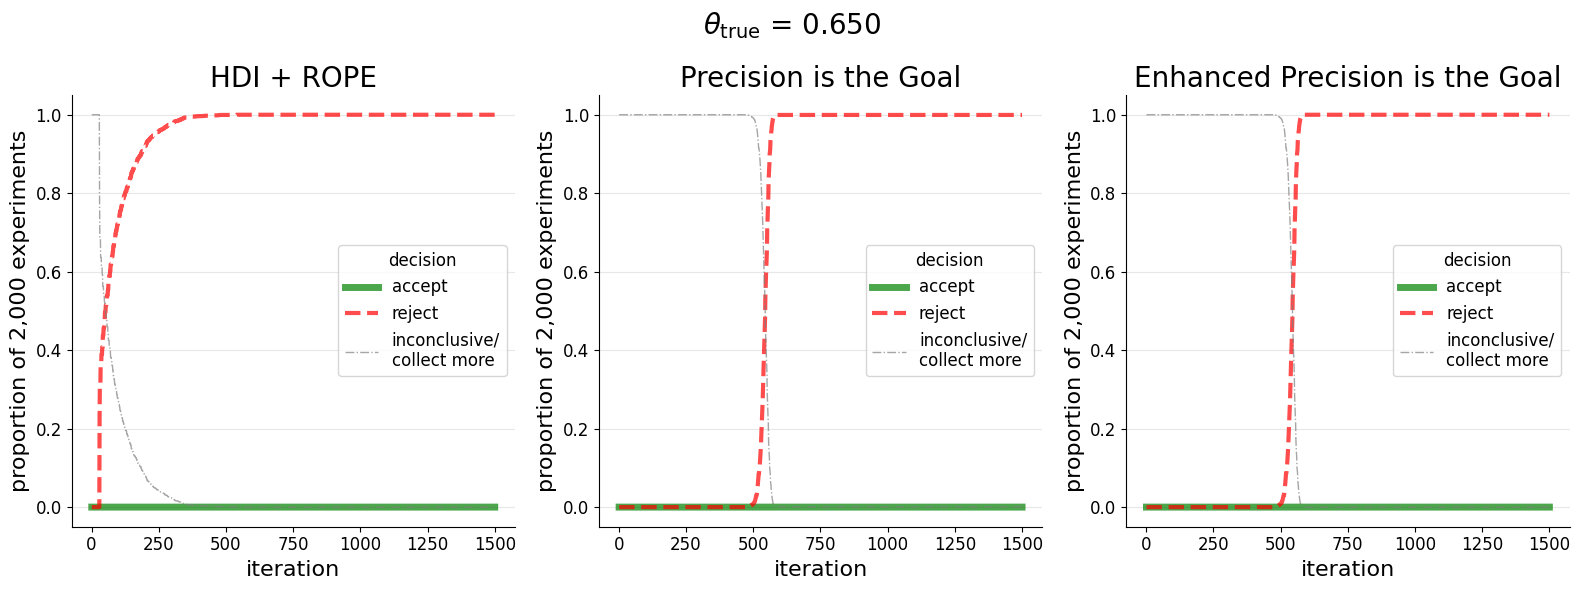

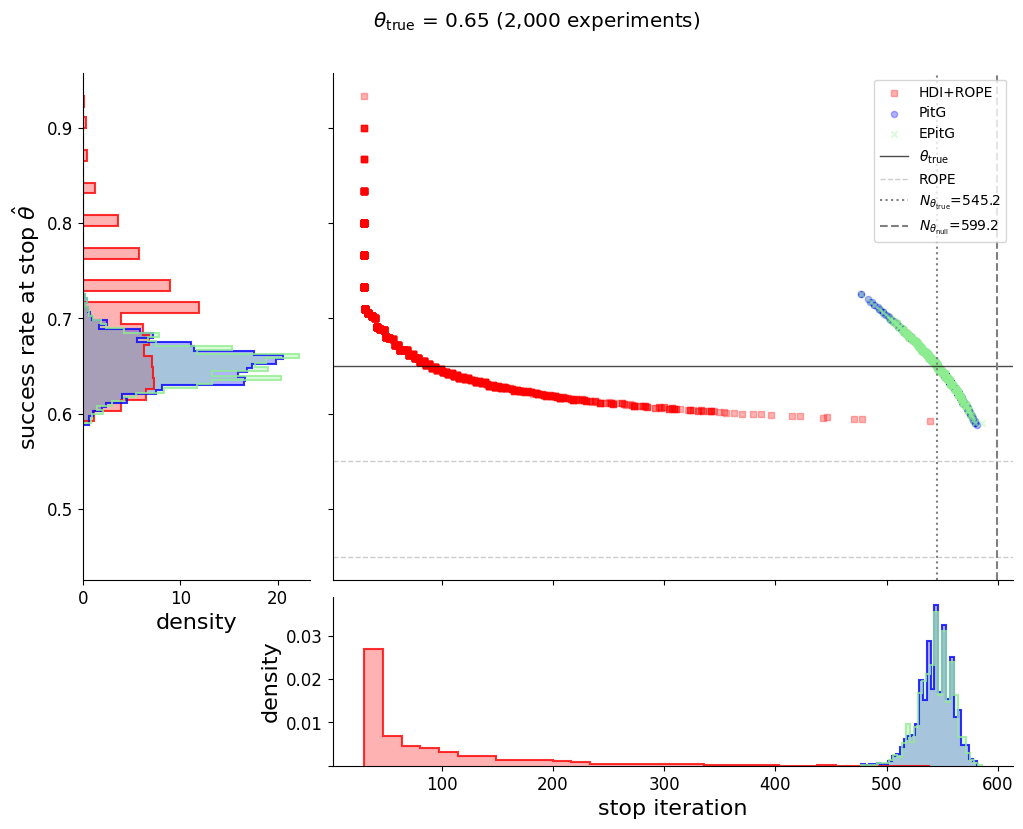

In [178]:
%%time

analysis_0pt65 = run_simulations_and_analysis_report(binary_accounting, success_rate_true=0.65)

Generating synthetic data with parameter values:
0.63: true success rate
2000: experiments
1500: sample size per experiment
0.5: null hypothesis
0.45: ROPE min
0.55: ROPE max
--------------------
0.08: Precision Goal


accept  reject  conclusive  inconclusive  stop_iter_mean  \
hdi_rope     0.0   1.000       1.000         0.000        122.6660   
pitg         0.0   0.974       0.974         0.026        557.3740   
epitg        0.0   1.000       1.000         0.000        559.7985   

          stop_iter_std  success_rate_mean  success_rate_std  
hdi_rope     122.368867           0.668872          0.055158  
pitg          13.044585           0.630577          0.020629  
epitg         28.474784           0.630724          0.020284

viz_epitg separate


count  success_frac  success_mean  success_std  \
algorithm group                                                          
pitg      overall        2000         1.000      0.630577     0.020629   
          conclusive     1948         0.974      0.631872     0.019275   
          inconclusive     52         0.026      0.582064     0.005704   
          reject         1948         0.974      0.631872     0.019275   
epitg     overall        2000         1.000      0.630724     0.020284   
          conclusive     2000         1.000      0.630724     0.020284   
          reject         2000         1.000      0.630724     0.020284   
hdi_rope  overall        2000         1.000      0.668872     0.055158   
          conclusive     2000         1.000      0.668872     0.055158   
          reject         2000         1.000      0.668872     0.055158   

                        success_p25  success_median  success_p75  \
algorithm group                                                    
pitg      overall          0.617284        0.629696     0.644809   
          conclusive       0.618375        0.630824     0.645985   
          inconclusive     0.577350        0.583691     0.586919   
          reject           0.618375        0.630824     0.645985   
epitg     overall          0.617284        0.629696     0.644809   
          conclusive       0.617284        0.629696     0.644809   
          reject           0.617284        0.629696     0.644809   
hdi_rope  overall          0.624242        0.658228     0.705882   
          conclusive       0.624242        0.658228     0.705882   
          reject           0.624242        0.658228     0.705882   

                        stop_iter_mean  stop_iter_std  stop_iter_p25  \
algorithm group                                                        
pitg      overall           557.374000      13.044585          549.0   
          conclusive        556.688398      12.510168          548.0   
          inconclusive      583.057692       2.080851          581.0   
          reject            556.688398      12.510168          548.0   
epitg     overall           559.798500      28.474784          549.0   
          conclusive        559.798500      28.474784          549.0   
          reject            559.798500      28.474784          549.0   
hdi_rope  overall           122.666000     122.368867           34.0   
          conclusive        122.666000     122.368867           34.0   
          reject            122.666000     122.368867           34.0   

                        stop_iter_median  stop_iter_p75  conclusive_mean  
algorithm group                                                           
pitg      overall                  559.0          567.0            0.974  
          conclusive               558.0          566.0            1.000  
          inconclusive             582.5          585.0            0.000  
          reject                   558.0          566.0            1.000  
epitg     overall                  559.0          567.0            1.000  
          conclusive               559.0          567.0            1.000  
          reject                   559.0          567.0            1.000  
hdi_rope  overall                   76.0          168.0            1.000  
          conclusive                76.0          168.0            1.000  
          reject                    76.0          168.0            1.000

CPU times: user 4.91 s, sys: 290 ms, total: 5.2 s
Wall time: 4.79 s


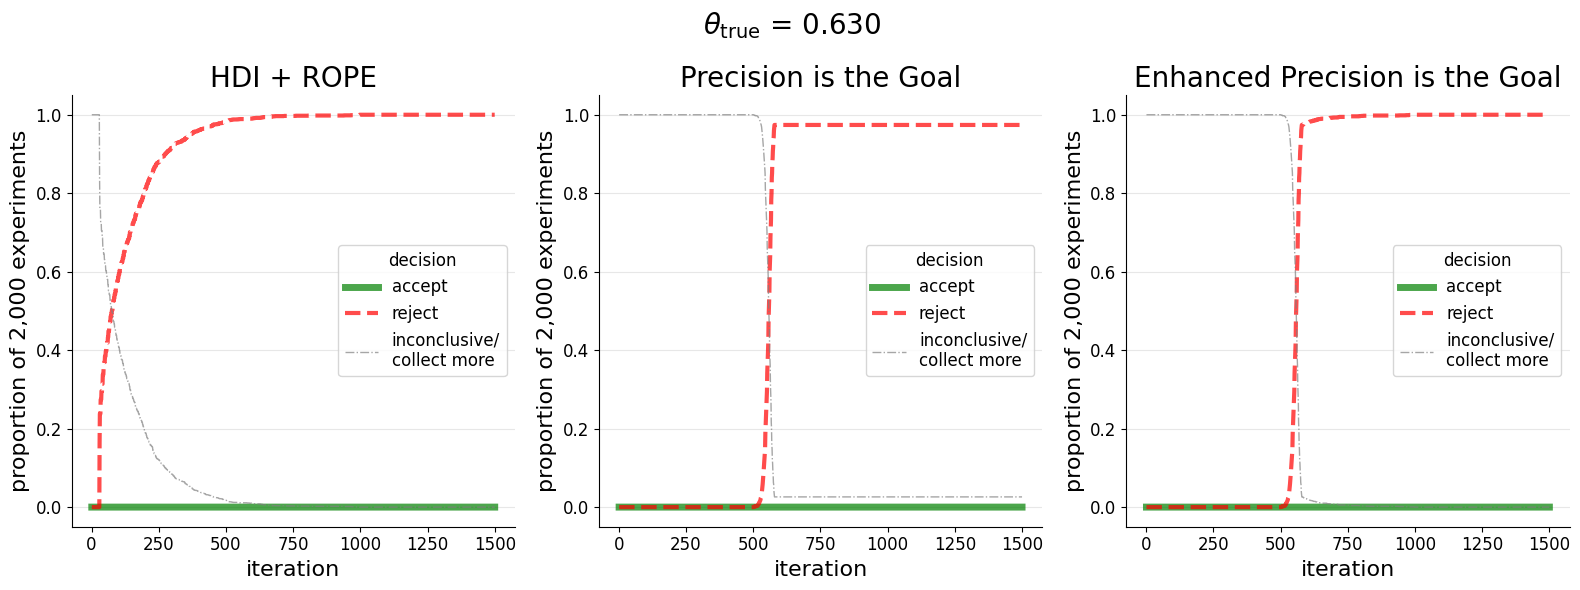

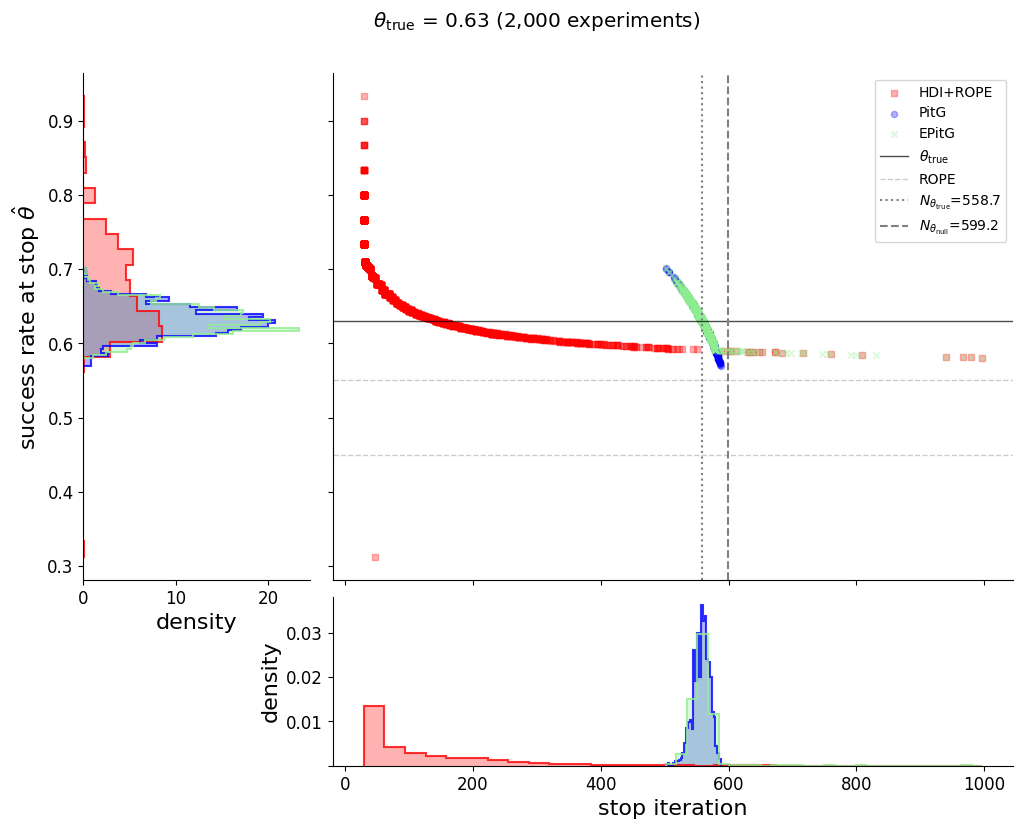

In [179]:
%%time

analysis_0pt63 = run_simulations_and_analysis_report(binary_accounting, success_rate_true=0.63)

In [181]:
analysis_0pt63['hypothesis'].method_df_stats['pitg'] #['success_rate'].mean(), analysis_0pt50['hypothesis'].method_df_stats['epitg']['success_rate'].mean(), analysis_0pt50['hypothesis'].method_df_stats['hdi_rope']['success_rate'].mean()

decision_iteration accept reject_below reject_above  \
experiment_number                                                        
0                               569.0  False        False         True   
1                               552.0  False        False         True   
2                               560.0  False        False         True   
3                               563.0  False        False         True   
4                               548.0  False        False         True   
...                               ...    ...          ...          ...   
1995                            573.0  False        False         True   
1996                            549.0  False        False         True   
1997                            545.0  False        False         True   
1998                            545.0  False        False         True   
1999                            555.0  False        False         True   

                  conclusive inconclusive successes failures   hdi_min  \
experiment_number                                                        
0                       True        False       348      221  0.571494   
1                       True        False       353      199  0.599358   
2                       True        False       352      208  0.588487   
3                       True        False       351      212  0.583363   
4                       True        False       354      194  0.605856   
...                      ...          ...       ...      ...       ...   
1995                    True        False       346      227  0.563748   
1996                    True        False       354      195  0.604690   
1997                    True        False       354      191  0.609380   
1998                    True        False       354      191  0.609380   
1999                    True        False       353      202  0.595927   

                    hdi_max precision_goal_achieved reject  precision  \
experiment_number                                                       
0                  0.651478                    True   True   0.079984   
1                  0.679349                    True   True   0.079991   
2                  0.668411                    True   True   0.079924   
3                  0.663296                    True   True   0.079933   
4                  0.685812                    True   True   0.079957   
...                     ...                     ...    ...        ...   
1995               0.643734                    True   True   0.079986   
1996               0.684634                    True   True   0.079944   
1997               0.689370                    True   True   0.079990   
1998               0.689370                    True   True   0.079990   
1999               0.675868                    True   True   0.079941   

                  success_rate  
experiment_number               
0                     0.611599  
1                     0.639493  
2                     0.628571  
3                     0.623446  
4                     0.645985  
...                        ...  
1995                  0.603839  
1996                  0.644809  
1997                  0.649541  
1998                  0.649541  
1999                  0.636036  

[2000 rows x 14 columns]

Generating synthetic data with parameter values:
0.62: true success rate
2000: experiments
1500: sample size per experiment
0.5: null hypothesis
0.45: ROPE min
0.55: ROPE max
--------------------
0.08: Precision Goal


accept  reject  conclusive  inconclusive  stop_iter_mean  \
hdi_rope     0.0   1.000       1.000         0.000        157.7065   
pitg         0.0   0.934       0.934         0.066        563.4645   
epitg        0.0   1.000       1.000         0.000        571.4140   

          stop_iter_std  success_rate_mean  success_rate_std  
hdi_rope     161.762505           0.659565          0.055200  
pitg          12.119744           0.620420          0.020708  
epitg         51.754361           0.620869          0.019815

viz_epitg separate


count  success_frac  success_mean  success_std  \
algorithm group                                                          
pitg      overall        2000         1.000      0.620420     0.020708   
          conclusive     1868         0.934      0.623252     0.018265   
          inconclusive    132         0.066      0.580340     0.007509   
          reject         1868         0.934      0.623252     0.018265   
epitg     overall        2000         1.000      0.620869     0.019815   
          conclusive     2000         1.000      0.620869     0.019815   
          reject         2000         1.000      0.620869     0.019815   
hdi_rope  overall        2000         1.000      0.659565     0.055200   
          conclusive     2000         1.000      0.659565     0.055200   
          reject         2000         1.000      0.659565     0.055200   

                        success_p25  success_median  success_p75  \
algorithm group                                                    
pitg      overall          0.606643        0.620567     0.634892   
          conclusive       0.609457        0.622340     0.636036   
          inconclusive     0.576068        0.582333     0.586163   
          reject           0.609457        0.622340     0.636036   
epitg     overall          0.606643        0.620567     0.634892   
          conclusive       0.606643        0.620567     0.634892   
          reject           0.606643        0.620567     0.634892   
hdi_rope  overall          0.615385        0.645833     0.702703   
          conclusive       0.615385        0.645833     0.702703   
          reject           0.615385        0.645833     0.702703   

                        stop_iter_mean  stop_iter_std  stop_iter_p25  \
algorithm group                                                        
pitg      overall           563.464500      12.119744         556.00   
          conclusive        562.040685      11.225996         555.00   
          inconclusive      583.613636       2.717340         581.75   
          reject            562.040685      11.225996         555.00   
epitg     overall           571.414000      51.754361         556.00   
          conclusive        571.414000      51.754361         556.00   
          reject            571.414000      51.754361         556.00   
hdi_rope  overall           157.706500     161.762505          37.00   
          conclusive        157.706500     161.762505          37.00   
          reject            157.706500     161.762505          37.00   

                        stop_iter_median  stop_iter_p75  conclusive_mean  
algorithm group                                                           
pitg      overall                  564.0          572.0            0.934  
          conclusive               564.0          571.0            1.000  
          inconclusive             583.0          585.0            0.000  
          reject                   564.0          571.0            1.000  
epitg     overall                  564.0          572.0            1.000  
          conclusive               564.0          572.0            1.000  
          reject                   564.0          572.0            1.000  
hdi_rope  overall                   99.0          218.0            1.000  
          conclusive                99.0          218.0            1.000  
          reject                    99.0          218.0            1.000

CPU times: user 5.3 s, sys: 404 ms, total: 5.71 s
Wall time: 5.08 s


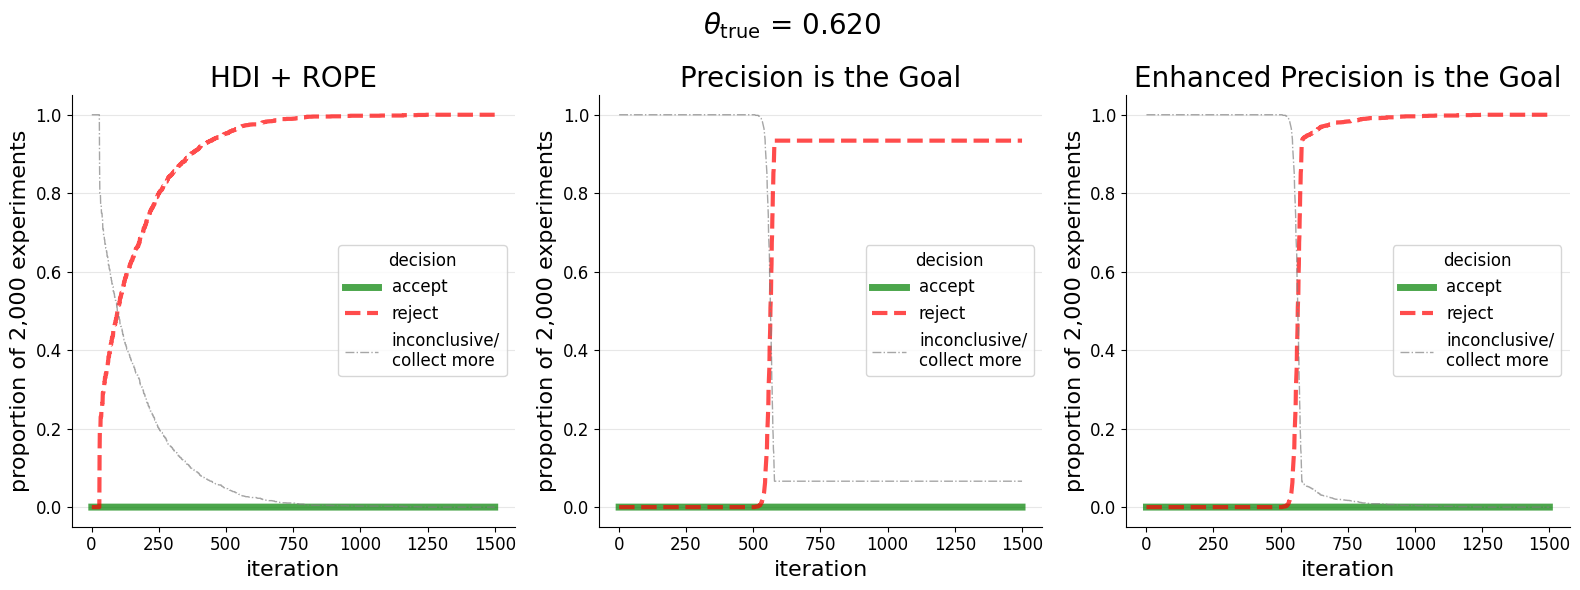

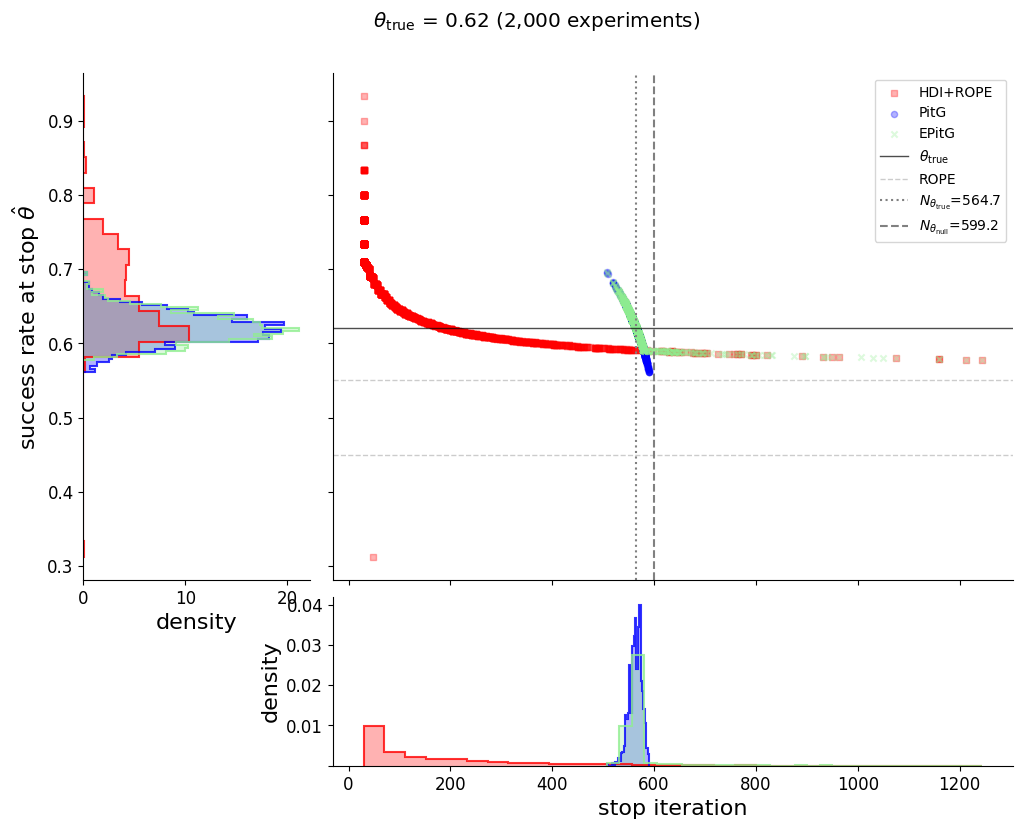

In [182]:
%%time

analysis_0pt62 = run_simulations_and_analysis_report(binary_accounting, success_rate_true=0.62)

Generating synthetic data with parameter values:
0.53: true success rate
2000: experiments
1500: sample size per experiment
0.5: null hypothesis
0.45: ROPE min
0.55: ROPE max
--------------------
0.08: Precision Goal
Sample 2 at final iteration
{'decision_iteration': 1500, 'accept': False, 'reject_below': False, 'reject_above': False, 'conclusive': False, 'inconclusive': True, 'successes': 795, 'failures': 705, 'hdi_min': 0.5047510964288994, 'hdi_max': 0.5552419113387459, 'precision_goal_achieved': True}
Sample 3 at final iteration
{'decision_iteration': 1500, 'accept': False, 'reject_below': False, 'reject_above': False, 'conclusive': False, 'inconclusive': True, 'successes': 805, 'failures': 695, 'hdi_min': 0.5114318861003363, 'hdi_max': 0.5618775545642721, 'precision_goal_achieved': True}
Sample 4 at final iteration
{'decision_iteration': 1500, 'accept': False, 'reject_below': False, 'reject_above': False, 'conclusive': False, 'inconclusive': True, 'successes': 833, 'failures': 667,

accept  reject  conclusive  inconclusive  stop_iter_mean  \
hdi_rope  0.5110  0.1140       0.625         0.375        942.3635   
pitg      0.1445  0.0025       0.147         0.853        596.0795   
epitg     0.5310  0.0060       0.537         0.463       1148.5125   

          stop_iter_std  success_rate_mean  success_rate_std  
hdi_rope     532.153087           0.536867          0.059220  
pitg           3.341371           0.530125          0.020632  
epitg        385.163010           0.525122          0.017286

viz_epitg separate


count  success_frac  success_mean  success_std  \
algorithm group                                                          
pitg      overall        2000        1.0000      0.530125     0.020632   
          conclusive      294        0.1470      0.503454     0.013801   
          inconclusive   1706        0.8530      0.534722     0.017960   
          accept          289        0.1445      0.501794     0.005524   
          reject            5        0.0025      0.599408     0.006917   
epitg     overall        2000        1.0000      0.525122     0.017286   
          conclusive     1074        0.5370      0.512623     0.012818   
          inconclusive    926        0.4630      0.539618     0.007965   
          accept         1062        0.5310      0.511731     0.009696   
          reject           12        0.0060      0.591569     0.009040   
hdi_rope  overall        2000        1.0000      0.536867     0.059220   
          conclusive     1250        0.6250      0.535328     0.074628   
          inconclusive    750        0.3750      0.539433     0.007881   
          accept         1022        0.5110      0.508931     0.010013   
          reject          228        0.1140      0.653648     0.113991   

                        success_p25  success_median  success_p75  \
algorithm group                                                    
pitg      overall          0.515860        0.529313     0.544538   
          conclusive       0.497496        0.502504     0.507513   
          inconclusive     0.523411        0.532663     0.545455   
          accept           0.497496        0.502504     0.507513   
          reject           0.595156        0.598958     0.600000   
epitg     overall          0.512482        0.523639     0.538000   
          conclusive       0.507513        0.513324     0.519963   
          inconclusive     0.533500        0.538667     0.544667   
          accept           0.507513        0.513287     0.519802   
          reject           0.588487        0.589723     0.596106   
hdi_rope  overall          0.507456        0.523759     0.540667   
          conclusive       0.500000        0.512839     0.522459   
          inconclusive     0.533333        0.538000     0.544000   
          accept           0.500000        0.508651     0.518293   
          reject           0.643564        0.680000     0.709677   

                        stop_iter_mean  stop_iter_std  stop_iter_p25  \
algorithm group                                                        
pitg      overall           596.079500       3.341371         595.00   
          conclusive        598.602041       3.058273         599.00   
          inconclusive      595.644783       3.193169         594.00   
          accept            599.000000       0.000000         599.00   
          reject            575.600000       3.507136         575.00   
epitg     overall          1148.512500     385.163010         697.75   
          conclusive        845.460894     278.986040         599.00   
          inconclusive     1500.000000       0.000000        1500.00   
          accept            847.060264     278.910933         599.00   
          reject            703.916667     258.548908         577.50   
hdi_rope  overall           942.363500     532.153087         446.50   
          conclusive        607.781600     393.034294         390.00   
          inconclusive     1500.000000       0.000000        1500.00   
          accept            724.897260     332.846213         438.00   
          reject             82.815789     114.484138          31.00   

                        stop_iter_median  stop_iter_p75  conclusive_mean  
algorithm group                                                           
pitg      overall                  597.0         599.00            0.147  
          conclusive               599.0         599.00            1.000  
          inconclusive             597.0         598.00            0.000  
        

CPU times: user 7.13 s, sys: 251 ms, total: 7.38 s
Wall time: 7.11 s


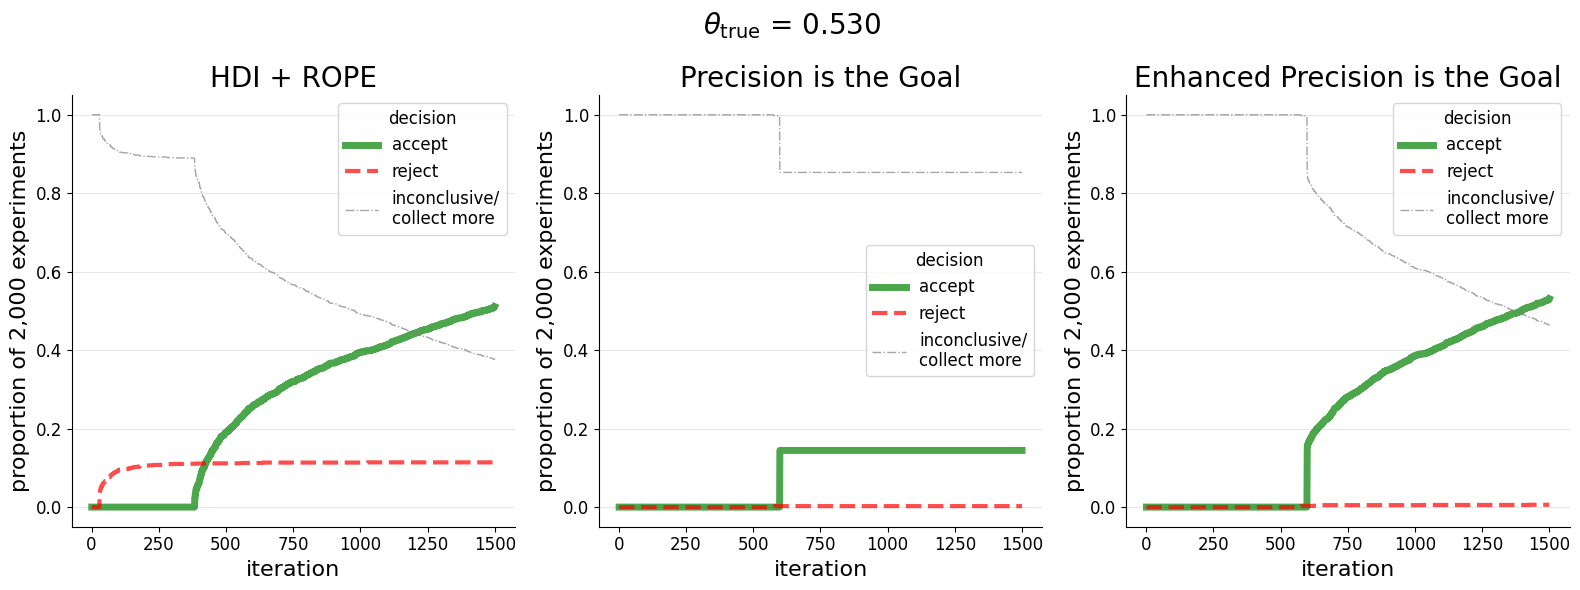

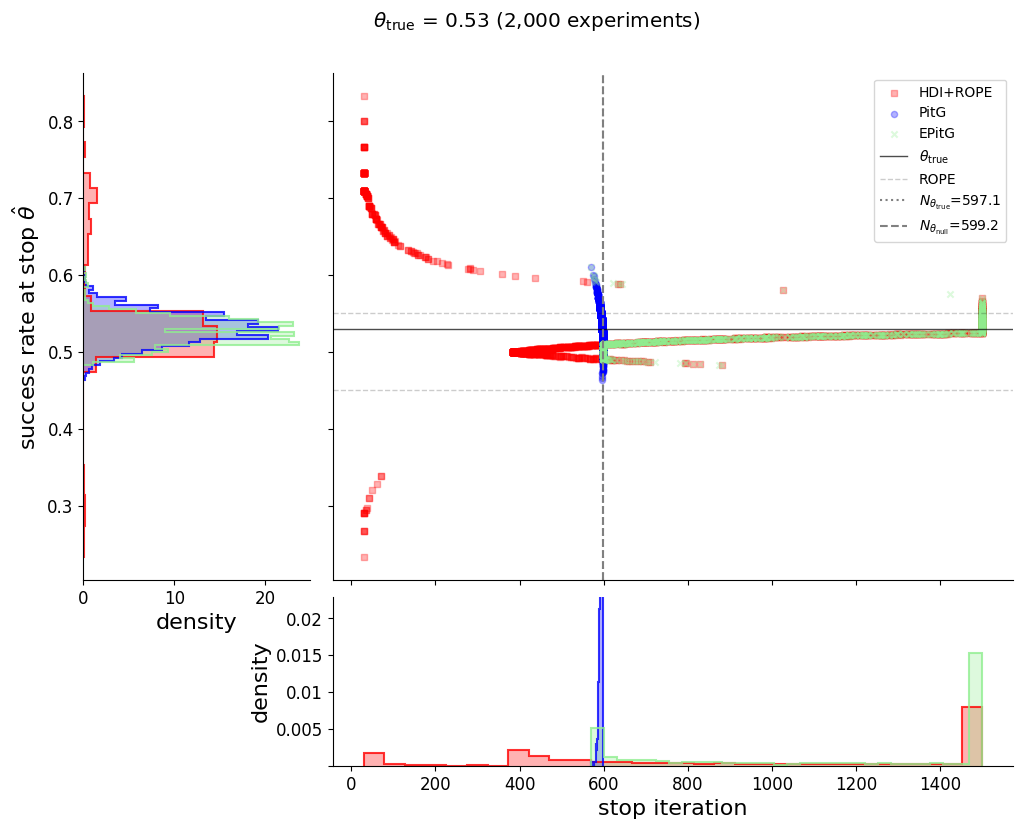

In [183]:
%%time

analysis_0pt53 = run_simulations_and_analysis_report(binary_accounting, success_rate_true=0.53)

Generating synthetic data with parameter values:
0.5: true success rate
2000: experiments
1500: sample size per experiment
0.5: null hypothesis
0.45: ROPE min
0.55: ROPE max
--------------------
0.08: Precision Goal
Sample 11 at final iteration
{'decision_iteration': 1500, 'accept': False, 'reject_below': False, 'reject_above': False, 'conclusive': False, 'inconclusive': True, 'successes': 799, 'failures': 701, 'hdi_min': 0.5074142760260834, 'hdi_max': 0.5578881163957048, 'precision_goal_achieved': True}
Sample 61 at final iteration
{'decision_iteration': 1500, 'accept': False, 'reject_below': False, 'reject_above': False, 'conclusive': False, 'inconclusive': True, 'successes': 804, 'failures': 696, 'hdi_min': 0.5107636035522547, 'hdi_max': 0.5612141943766372, 'precision_goal_achieved': True}
Sample 64 at final iteration
{'decision_iteration': 1500, 'accept': False, 'reject_below': False, 'reject_above': False, 'conclusive': False, 'inconclusive': True, 'successes': 790, 'failures': 71

accept  reject  conclusive  inconclusive  stop_iter_mean  \
hdi_rope  0.9210   0.061      0.9820        0.0180        592.9835   
pitg      0.3670   0.000      0.3670        0.6330        598.2090   
epitg     0.9765   0.000      0.9765        0.0235        740.9665   

          stop_iter_std  success_rate_mean  success_rate_std  
hdi_rope     290.737790           0.498253          0.051782  
pitg           1.457526           0.499978          0.020554  
epitg        221.187573           0.500032          0.013120

viz_epitg separate


count  success_frac  success_mean  success_std  \
algorithm group                                                          
pitg      overall        2000        1.0000      0.499978     0.020554   
          conclusive      734        0.3670      0.500293     0.005508   
          inconclusive   1266        0.6330      0.499794     0.025494   
          accept          734        0.3670      0.500293     0.005508   
epitg     overall        2000        1.0000      0.500032     0.013120   
          conclusive     1953        0.9765      0.499973     0.012220   
          inconclusive     47        0.0235      0.502454     0.033731   
          accept         1953        0.9765      0.499973     0.012220   
hdi_rope  overall        2000        1.0000      0.498253     0.051782   
          conclusive     1964        0.9820      0.498114     0.052057   
          inconclusive     36        0.0180      0.505870     0.033090   
          accept         1842        0.9210      0.499911     0.010597   
          reject          122        0.0610      0.470976     0.203625   

                        success_p25  success_median  success_p75  \
algorithm group                                                    
pitg      overall          0.485810        0.500835     0.514190   
          conclusive       0.495826        0.500835     0.504174   
          inconclusive     0.479933        0.489149     0.520067   
          accept           0.495826        0.500835     0.504174   
epitg     overall          0.489465        0.500835     0.510501   
          conclusive       0.489499        0.500835     0.510433   
          inconclusive     0.470000        0.526667     0.533667   
          accept           0.489499        0.500835     0.510433   
hdi_rope  overall          0.491803        0.500000     0.508057   
          conclusive       0.491892        0.500000     0.507519   
          inconclusive     0.471333        0.528000     0.533500   
          accept           0.492620        0.500000     0.507435   
          reject           0.294118        0.337838     0.702027   

                        stop_iter_mean  stop_iter_std  stop_iter_p25  \
algorithm group                                                        
pitg      overall           598.209000       1.457526          598.0   
          conclusive        599.000000       0.000000          599.0   
          inconclusive      597.750395       1.668382          597.0   
          accept            599.000000       0.000000          599.0   
epitg     overall           740.966500     221.187573          599.0   
          conclusive        722.699949     189.462560          599.0   
          inconclusive     1500.000000       0.000000         1500.0   
          accept            722.699949     189.462560          599.0   
hdi_rope  overall           592.983500     290.737790          415.0   
          conclusive        576.357943     265.922483          413.0   
          inconclusive     1500.000000       0.000000         1500.0   
          accept            611.389794     235.712841          426.5   
          reject             47.434426      33.382083           31.0   

                        stop_iter_median  stop_iter_p75  conclusive_mean  
algorithm group                                                           
pitg      overall                  599.0         599.00           0.3670  
          conclusive               599.0         599.00           1.0000  
          inconclusive             598.0         599.00           0.0000  
          accept                   599.0         599.00           1.0000  
epitg     overall                  627.0         794.00           0.9765  
          conclusive               623.0         775.00           1.0000  
          inconclusive            1500.0        1500.00           0.0000  
          accept                   623.0         775.00           1.0000  
hdi_rope  overall                  523.0         721.00      

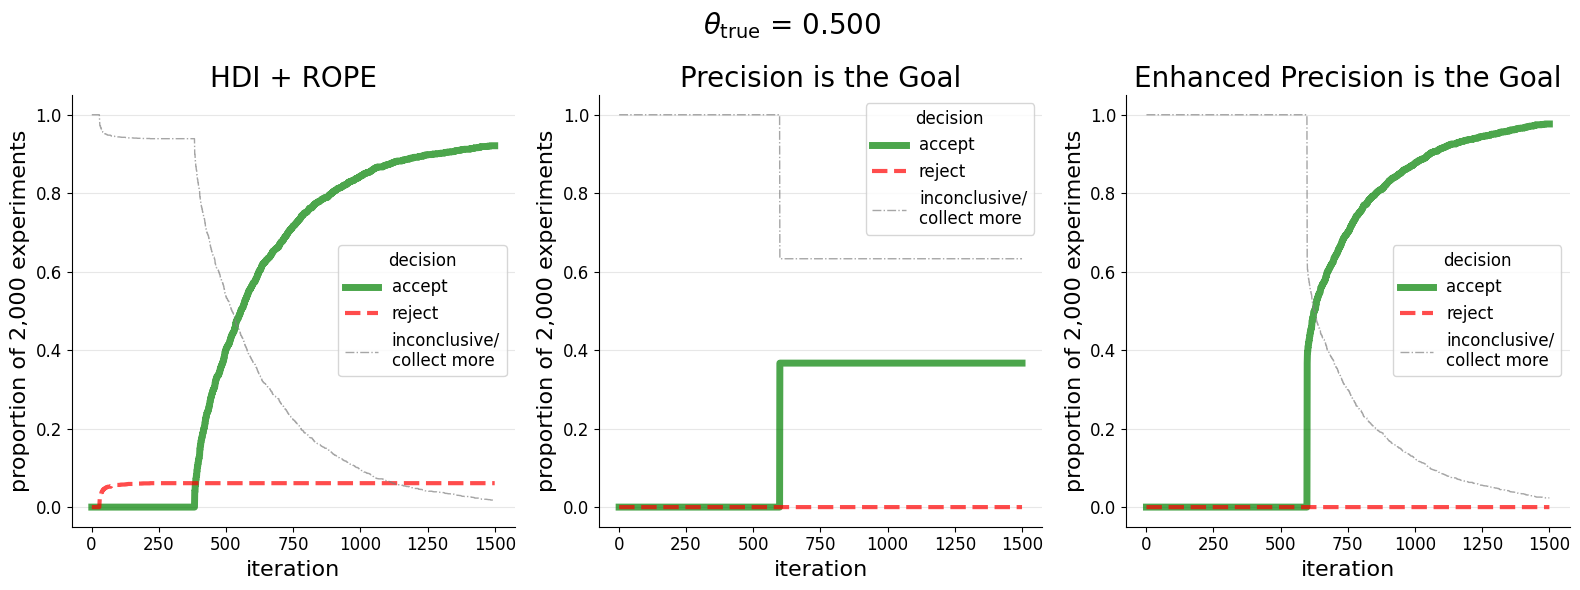

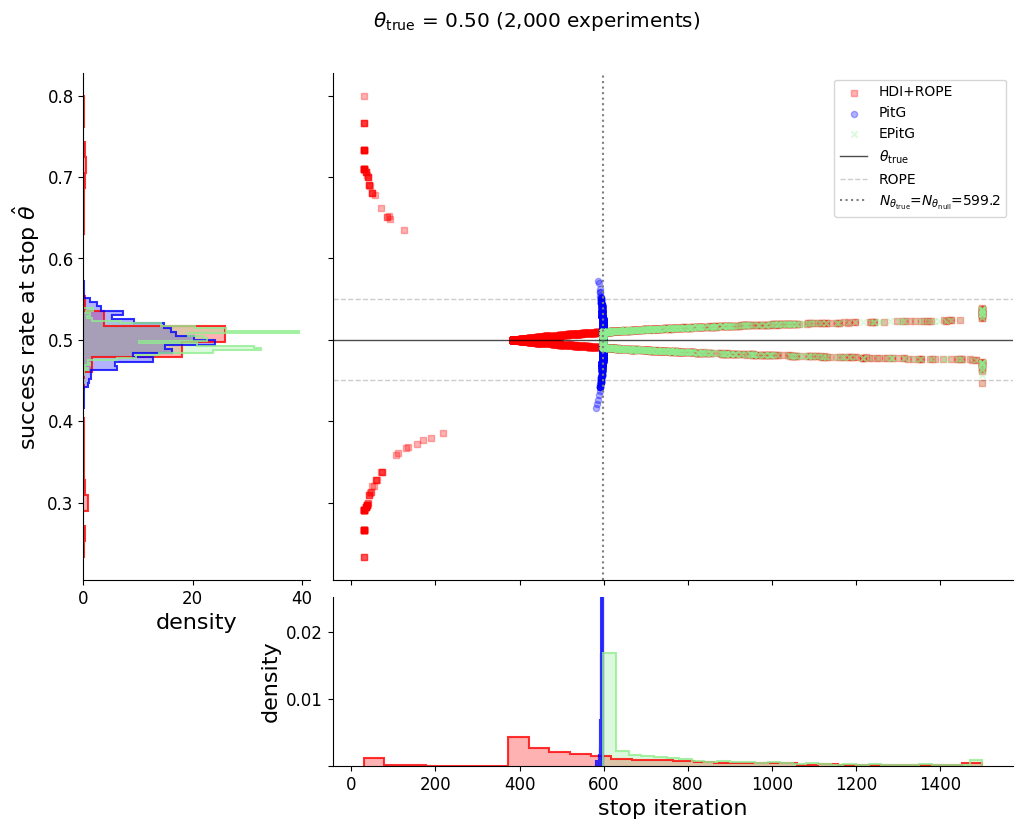

In [184]:
analysis_0pt50 = run_simulations_and_analysis_report(binary_accounting, success_rate_true=0.5)

Generating synthetic data with parameter values:
0.57: true success rate
2000: experiments
1500: sample size per experiment
0.5: null hypothesis
0.45: ROPE min
0.55: ROPE max
--------------------
0.08: Precision Goal
Sample 0 at final iteration
{'decision_iteration': 1500, 'accept': False, 'reject_below': False, 'reject_above': False, 'conclusive': False, 'inconclusive': True, 'successes': 840, 'failures': 660, 'hdi_min': 0.534867547044455, 'hdi_max': 0.5850835156227976, 'precision_goal_achieved': True}
Sample 1 at final iteration
{'decision_iteration': 1500, 'accept': False, 'reject_below': False, 'reject_above': False, 'conclusive': False, 'inconclusive': True, 'successes': 853, 'failures': 647, 'hdi_min': 0.5435971864178839, 'hdi_max': 0.5936992132066574, 'precision_goal_achieved': True}
Sample 2 at final iteration
{'decision_iteration': 1500, 'accept': False, 'reject_below': False, 'reject_above': False, 'conclusive': False, 'inconclusive': True, 'successes': 859, 'failures': 641, 

accept  reject  conclusive  inconclusive  stop_iter_mean  \
hdi_rope  0.0080  0.6480      0.6560        0.3440        804.6165   
pitg      0.0005  0.1570      0.1575        0.8425        586.4470   
epitg     0.0035  0.5415      0.5450        0.4550       1127.1755   

          stop_iter_std  success_rate_mean  success_rate_std  
hdi_rope     611.021115           0.604697          0.058295  
pitg           7.116144           0.570288          0.020308  
epitg        395.941462           0.575583          0.017217

viz_epitg separate


count  success_frac  success_mean  success_std  \
algorithm group                                                          
pitg      overall        2000        1.0000      0.570288     0.020308   
          conclusive      315        0.1575      0.601331     0.011291   
          inconclusive   1685        0.8425      0.564484     0.015869   
          accept            1        0.0005      0.509182          NaN   
          reject          314        0.1570      0.601625     0.010034   
epitg     overall        2000        1.0000      0.575583     0.017217   
          conclusive     1090        0.5450      0.588071     0.012207   
          inconclusive    910        0.4550      0.560624     0.007898   
          accept            7        0.0035      0.514473     0.004406   
          reject         1083        0.5415      0.588546     0.010705   
hdi_rope  overall        2000        1.0000      0.604697     0.058295   
          conclusive     1312        0.6560      0.627897     0.059858   
          inconclusive    688        0.3440      0.560453     0.007907   
          accept           16        0.0080      0.506296     0.007129   
          reject         1296        0.6480      0.629398     0.058666   

                        success_p25  success_median  success_p75  \
algorithm group                                                    
pitg      overall          0.555743        0.570698     0.584192   
          conclusive       0.593426        0.598958     0.606643   
          inconclusive     0.554054        0.565365     0.576068   
          accept           0.509182        0.509182     0.509182   
          reject           0.593426        0.598958     0.606643   
epitg     overall          0.562000        0.576765     0.587613   
          conclusive       0.580875        0.586351     0.592401   
          inconclusive     0.556000        0.561333     0.566667   
          accept           0.511544        0.512445     0.518098   
          reject           0.580953        0.586445     0.592401   
hdi_rope  overall          0.565333        0.584464     0.629197   
          conclusive       0.585145        0.606957     0.666667   
          inconclusive     0.556000        0.561333     0.566667   
          accept           0.500908        0.504647     0.511310   
          reject           0.585333        0.608059     0.666667   

                        stop_iter_mean  stop_iter_std  stop_iter_p25  \
algorithm group                                                        
pitg      overall           586.447000       7.116144         582.00   
          conclusive        574.320635       5.364015         572.00   
          inconclusive      588.713947       4.700920         585.00   
          accept            599.000000            NaN         599.00   
          reject            574.242038       5.187724         572.00   
epitg     overall          1127.175500     395.941462         667.00   
          conclusive        815.918349     273.221656         579.00   
          inconclusive     1500.000000       0.000000        1500.00   
          accept            804.000000     211.433205         649.00   
          reject            815.995383     273.649777         579.00   
hdi_rope  overall           804.616500     611.021115         145.25   
          conclusive        439.964177     427.125493          63.00   
          inconclusive     1500.000000       0.000000        1500.00   
          accept            563.312500     225.144611         412.00   
          reject            438.441358     428.850531          61.00   

                        stop_iter_median  stop_iter_p75  conclusive_mean  
algorithm group                                                           
pitg      overall                  587.0          592.0           0.1575  
          conclusive               576.0          578.0           1.0000  
          inconclusive             589.0          592.0           0.0000  
        

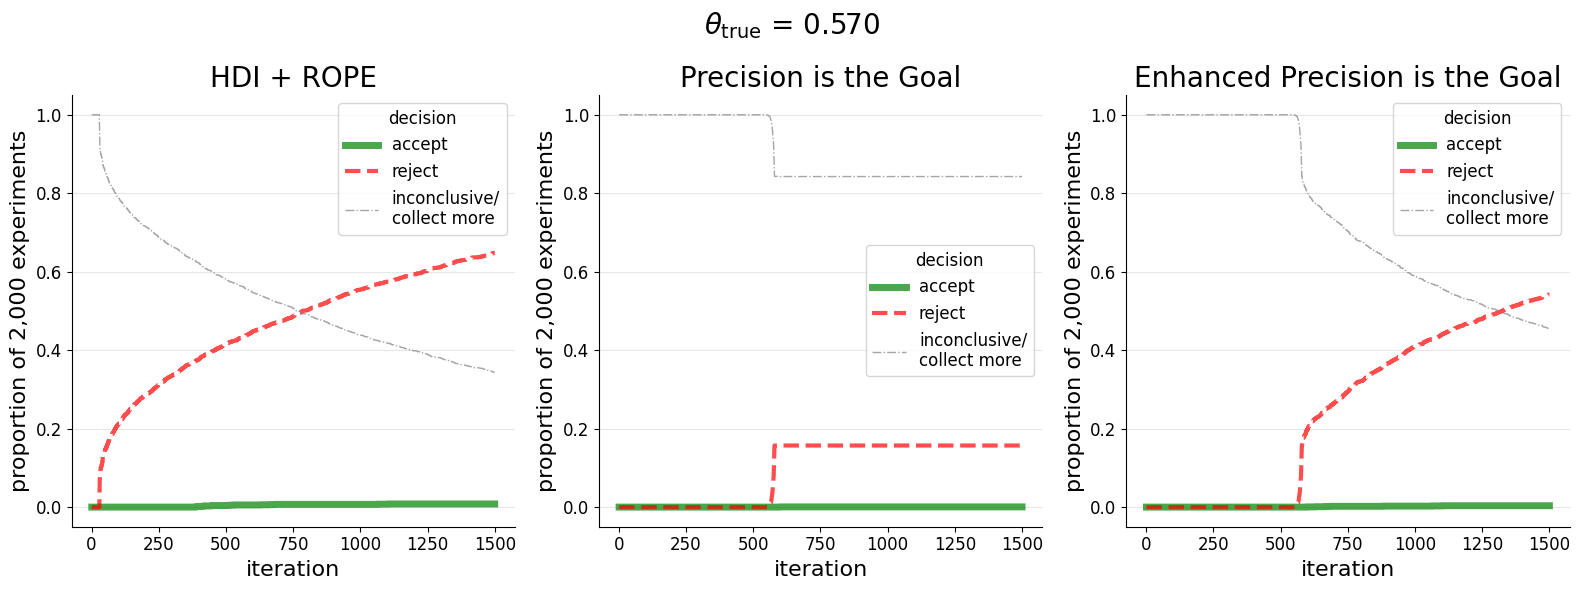

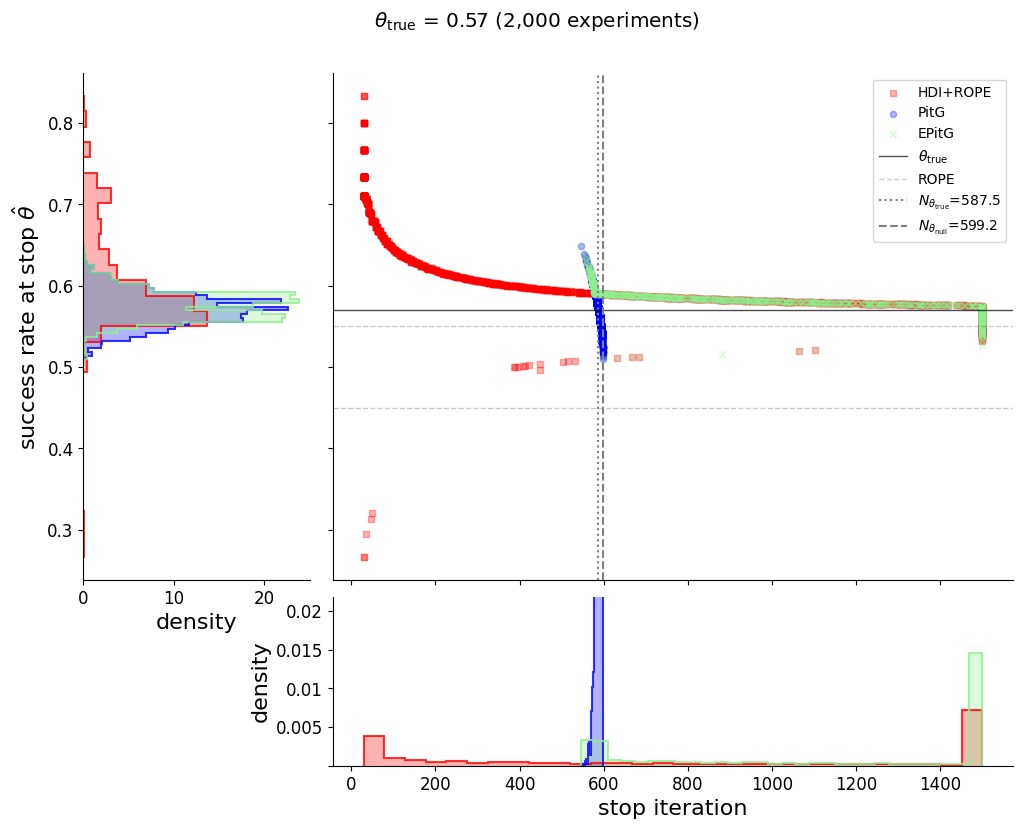

In [213]:
analysis_0pt57 = run_simulations_and_analysis_report(binary_accounting, success_rate_true=0.57)

Generating synthetic data with parameter values:
0.6: true success rate
2000: experiments
1500: sample size per experiment
0.5: null hypothesis
0.45: ROPE min
0.55: ROPE max
--------------------
0.08: Precision Goal
Sample 475 at final iteration
{'decision_iteration': 1500, 'accept': False, 'reject_below': False, 'reject_above': False, 'conclusive': False, 'inconclusive': True, 'successes': 861, 'failures': 639, 'hdi_min': 0.5489626323111325, 'hdi_max': 0.5989867505889424, 'precision_goal_achieved': True}
Sample 565 at final iteration
{'decision_iteration': 1500, 'accept': False, 'reject_below': False, 'reject_above': False, 'conclusive': False, 'inconclusive': True, 'successes': 859, 'failures': 641, 'hdi_min': 0.5476209931234249, 'hdi_max': 0.597665145471056, 'precision_goal_achieved': True}
Sample 573 at final iteration
{'decision_iteration': 1500, 'accept': False, 'reject_below': False, 'reject_above': False, 'conclusive': False, 'inconclusive': True, 'successes': 856, 'failures': 

accept  reject  conclusive  inconclusive  stop_iter_mean  \
hdi_rope     0.0  0.9920      0.9920        0.0080        278.5250   
pitg         0.0  0.6930      0.6930        0.3070        574.0995   
epitg        0.0  0.9905      0.9905        0.0095        638.4050   

          stop_iter_std  success_rate_mean  success_rate_std  
hdi_rope     296.550922           0.642112          0.056068  
pitg          10.032693           0.600358          0.020512  
epitg        164.652043           0.602890          0.017084

viz_epitg separate


count  success_frac  success_mean  success_std  \
algorithm group                                                          
pitg      overall        2000        1.0000      0.600358     0.020512   
          conclusive     1386        0.6930      0.610716     0.014524   
          inconclusive    614        0.3070      0.576978     0.010264   
          reject         1386        0.6930      0.610716     0.014524   
epitg     overall        2000        1.0000      0.602890     0.017084   
          conclusive     1981        0.9905      0.603219     0.016824   
          inconclusive     19        0.0095      0.568596     0.005052   
          reject         1981        0.9905      0.603219     0.016824   
hdi_rope  overall        2000        1.0000      0.642112     0.056068   
          conclusive     1984        0.9920      0.642695     0.055915   
          inconclusive     16        0.0080      0.569833     0.002727   
          reject         1984        0.9920      0.642695     0.055915   

                        success_p25  success_median  success_p75  \
algorithm group                                                    
pitg      overall          0.586919        0.600000     0.614437   
          conclusive       0.598958        0.607706     0.619469   
          inconclusive     0.570698        0.578767     0.584192   
          reject           0.598958        0.607706     0.619469   
epitg     overall          0.589491        0.600000     0.614437   
          conclusive       0.589615        0.600000     0.614437   
          inconclusive     0.567333        0.570000     0.571000   
          reject           0.589615        0.600000     0.614437   
hdi_rope  overall          0.598485        0.624242     0.680000   
          conclusive       0.598972        0.624277     0.680000   
          inconclusive     0.568500        0.570333     0.571333   
          reject           0.598972        0.624277     0.680000   

                        stop_iter_mean  stop_iter_std  stop_iter_p25  \
algorithm group                                                        
pitg      overall           574.099500      10.032693          568.0   
          conclusive        569.360029       8.148768          565.0   
          inconclusive      584.798046       3.574186          582.0   
          reject            569.360029       8.148768          565.0   
epitg     overall           638.405000     164.652043          568.0   
          conclusive        630.141343     142.051400          568.0   
          inconclusive     1500.000000       0.000000         1500.0   
          reject            630.141343     142.051400          568.0   
hdi_rope  overall           278.525000     296.550922           50.0   
          conclusive        268.674395     276.616344           50.0   
          inconclusive     1500.000000       0.000000         1500.0   
          reject            268.674395     276.616344           50.0   

                        stop_iter_median  stop_iter_p75  conclusive_mean  
algorithm group                                                           
pitg      overall                  575.0          581.0           0.6930  
          conclusive               571.0          576.0           1.0000  
          inconclusive             584.0          587.0           0.0000  
          reject                   571.0          576.0           1.0000  
epitg     overall                  575.0          607.0           0.9905  
          conclusive               575.0          602.0           1.0000  
          inconclusive            1500.0         1500.0           0.0000  
          reject                   575.0          602.0           1.0000  
hdi_rope  overall                  168.0          401.5           0.9920  
          conclusive               165.0          394.5           1.0000  
          inconclusive            1500.0         1500.0           0.0000  
          reject                   165.0          

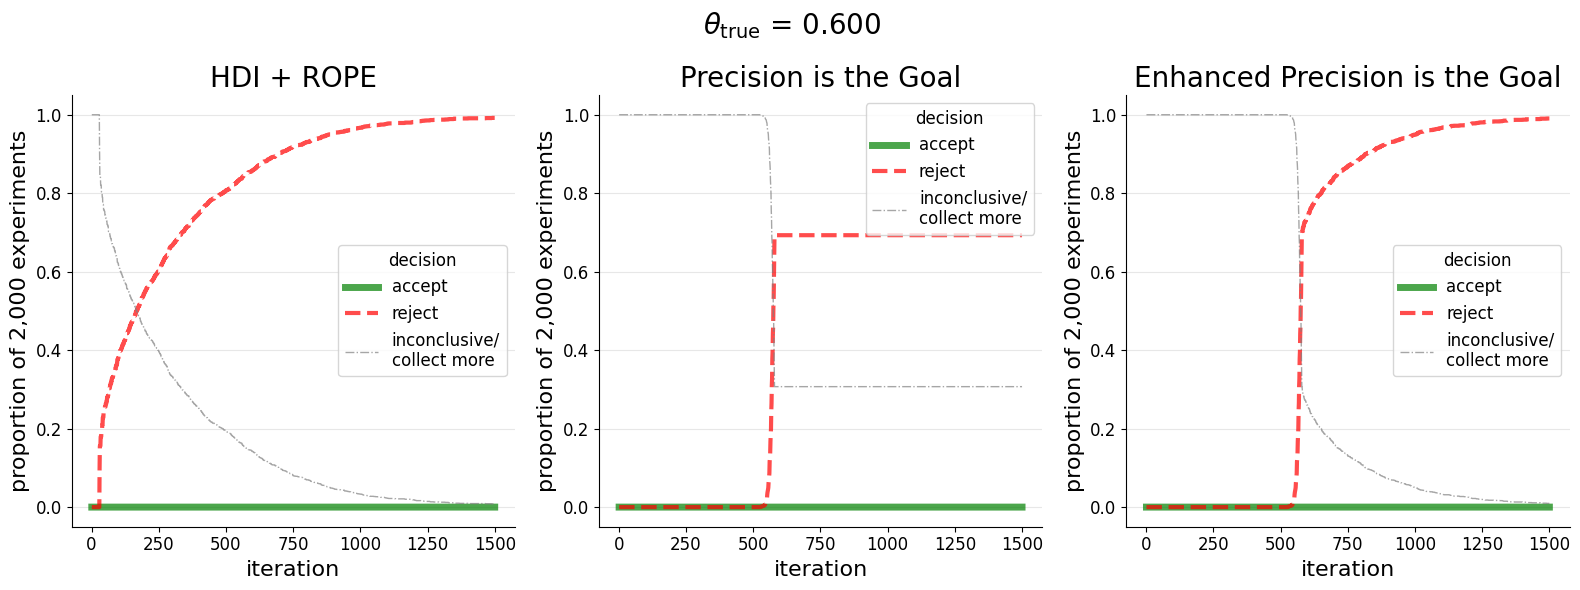

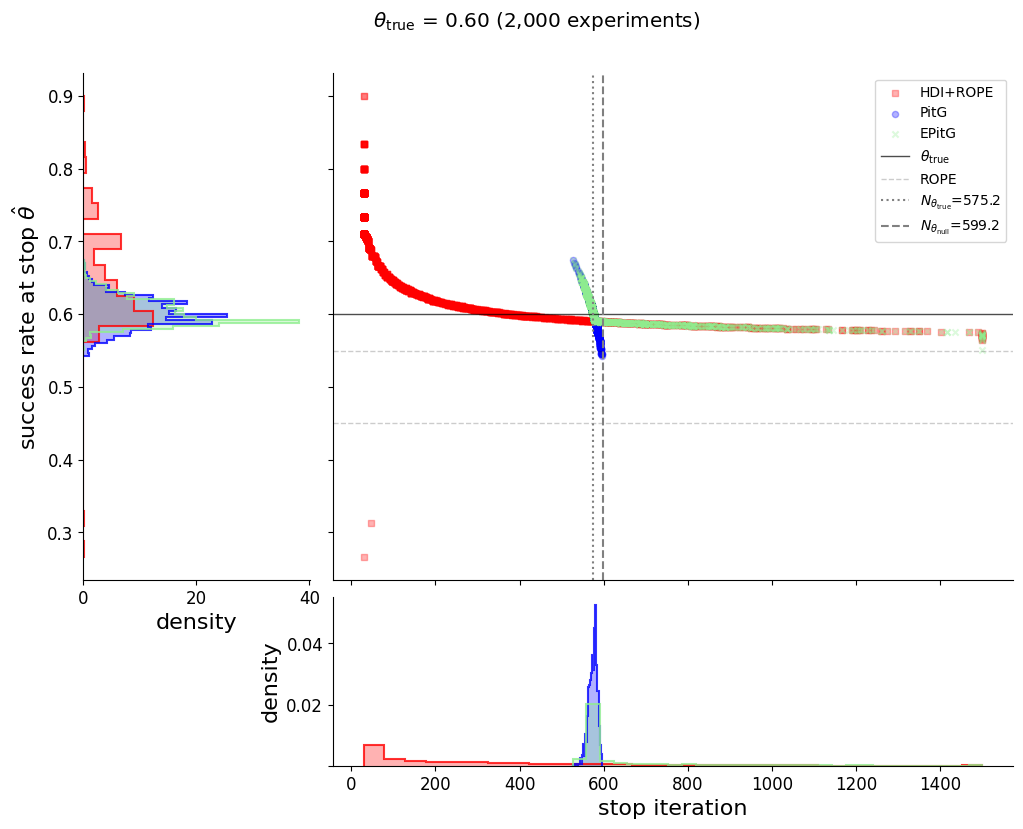

In [214]:
analysis_0pt60 = run_simulations_and_analysis_report(binary_accounting, success_rate_true=0.60)

Generating synthetic data with parameter values:
0.58: true success rate
2000: experiments
1500: sample size per experiment
0.5: null hypothesis
0.45: ROPE min
0.55: ROPE max
--------------------
0.08: Precision Goal
Sample 7 at final iteration
{'decision_iteration': 1500, 'accept': False, 'reject_below': False, 'reject_above': False, 'conclusive': False, 'inconclusive': True, 'successes': 854, 'failures': 646, 'hdi_min': 0.5442591781856505, 'hdi_max': 0.594351784888959, 'precision_goal_achieved': True}
Sample 11 at final iteration
{'decision_iteration': 1500, 'accept': False, 'reject_below': False, 'reject_above': False, 'conclusive': False, 'inconclusive': True, 'successes': 848, 'failures': 652, 'hdi_min': 0.5402282092028787, 'hdi_max': 0.5903759095552954, 'precision_goal_achieved': True}
Sample 12 at final iteration
{'decision_iteration': 1500, 'accept': False, 'reject_below': False, 'reject_above': False, 'conclusive': False, 'inconclusive': True, 'successes': 833, 'failures': 667

accept  reject  conclusive  inconclusive  stop_iter_mean  \
hdi_rope  0.0005  0.8530      0.8535        0.1465         585.331   
pitg      0.0000  0.3175      0.3175        0.6825         582.768   
epitg     0.0000  0.8045      0.8045        0.1955         914.951   

          stop_iter_std  success_rate_mean  success_rate_std  
hdi_rope     540.685760           0.620141          0.057135  
pitg           8.108641           0.580360          0.020475  
epitg        372.452422           0.586007          0.015814

viz_epitg separate


count  success_frac  success_mean  success_std  \
algorithm group                                                          
pitg      overall        2000        1.0000      0.580360     0.020475   
          conclusive      635        0.3175      0.603372     0.011059   
          inconclusive   1365        0.6825      0.569655     0.014012   
          reject          635        0.3175      0.603372     0.011059   
epitg     overall        2000        1.0000      0.586007     0.015814   
          conclusive     1609        0.8045      0.591296     0.012518   
          inconclusive    391        0.1955      0.564246     0.006756   
          reject         1609        0.8045      0.591296     0.012518   
hdi_rope  overall        2000        1.0000      0.620141     0.057135   
          conclusive     1707        0.8535      0.629706     0.056501   
          inconclusive    293        0.1465      0.564412     0.006731   
          accept            1        0.0005      0.498795          NaN   
          reject         1706        0.8530      0.629783     0.056428   

                        success_p25  success_median  success_p75  \
algorithm group                                                    
pitg      overall          0.565365        0.580479     0.593426   
          conclusive       0.595156        0.600000     0.609457   
          inconclusive     0.561017        0.570698     0.581475   
          reject           0.595156        0.600000     0.609457   
epitg     overall          0.577072        0.585561     0.593426   
          conclusive       0.582073        0.588976     0.597920   
          inconclusive     0.560667        0.565333     0.569333   
          reject           0.582073        0.588976     0.597920   
hdi_rope  overall          0.579877        0.599476     0.648936   
          conclusive       0.586445        0.607774     0.666667   
          inconclusive     0.560667        0.565333     0.569333   
          accept           0.498795        0.498795     0.498795   
          reject           0.586445        0.607774     0.666667   

                        stop_iter_mean  stop_iter_std  stop_iter_p25  \
algorithm group                                                        
pitg      overall           582.768000       8.108641          578.0   
          conclusive        573.322835       5.842412          571.0   
          inconclusive      587.161905       4.431891          583.0   
          reject            573.322835       5.842412          571.0   
epitg     overall           914.951000     372.452422          578.0   
          conclusive        772.779366     262.673952          577.0   
          inconclusive     1500.000000       0.000000         1500.0   
          reject            772.779366     262.673952          577.0   
hdi_rope  overall           585.331000     540.685760           90.5   
          conclusive        428.331576     417.372474           66.0   
          inconclusive     1500.000000       0.000000         1500.0   
          accept            415.000000            NaN          415.0   
          reject            428.339390     417.494728           66.0   

                        stop_iter_median  stop_iter_p75  conclusive_mean  
algorithm group                                                           
pitg      overall                  584.0         589.00           0.3175  
          conclusive               575.0         578.00           1.0000  
          inconclusive             587.0         590.00           0.0000  
          reject                   575.0         578.00           1.0000  
epitg     overall                  743.0        1291.50           0.8045  
          conclusive               625.0         914.00           1.0000  
          inconclusive            1500.0        1500.00           0.0000  
          reject                   625.0         914.00           1.0000  
hdi_rope  overall                  387.0        1052.00      

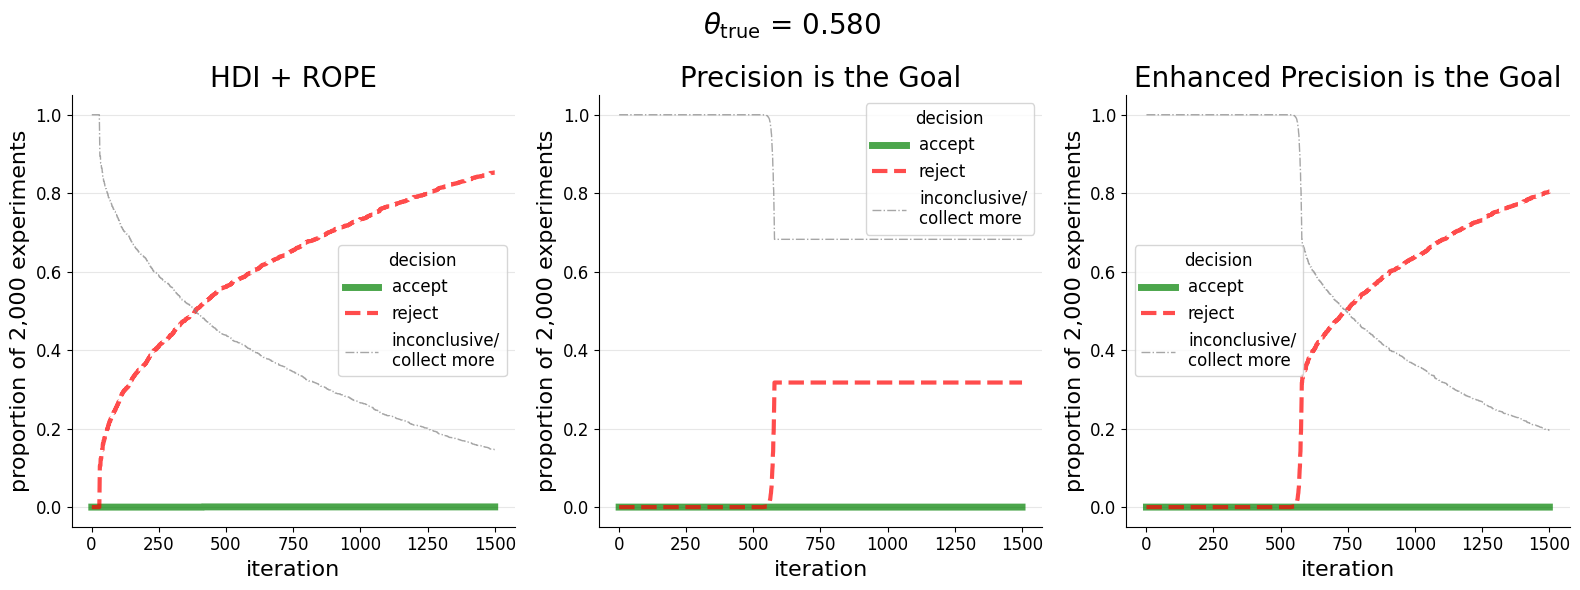

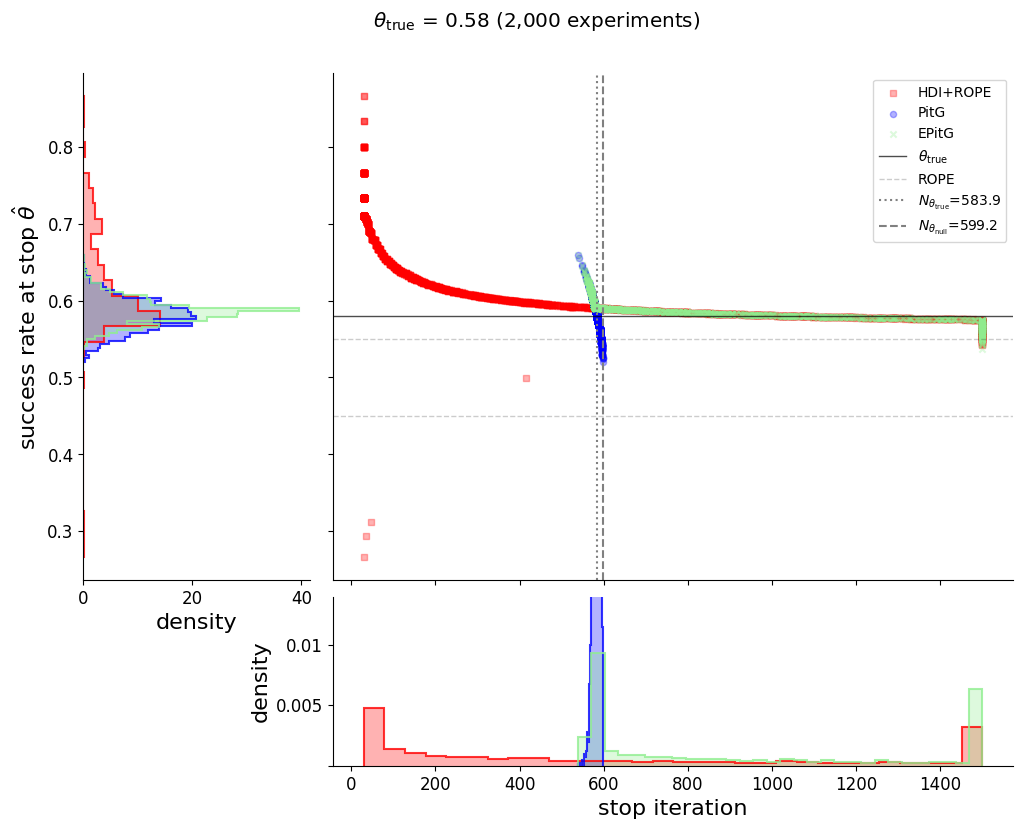

In [239]:
analysis_0pt58 = run_simulations_and_analysis_report(binary_accounting, success_rate_true=0.58)

Generating synthetic data with parameter values:
0.54: true success rate
2000: experiments
1500: sample size per experiment
0.5: null hypothesis
0.45: ROPE min
0.55: ROPE max
--------------------
0.08: Precision Goal
Sample 0 at final iteration
{'decision_iteration': 1500, 'accept': False, 'reject_below': False, 'reject_above': False, 'conclusive': False, 'inconclusive': True, 'successes': 799, 'failures': 701, 'hdi_min': 0.5074142760260834, 'hdi_max': 0.5578881163957048, 'precision_goal_achieved': True}
Sample 1 at final iteration
{'decision_iteration': 1500, 'accept': False, 'reject_below': False, 'reject_above': False, 'conclusive': False, 'inconclusive': True, 'successes': 810, 'failures': 690, 'hdi_min': 0.5147739784182077, 'hdi_max': 0.5651936740760046, 'precision_goal_achieved': True}
Sample 2 at final iteration
{'decision_iteration': 1500, 'accept': False, 'reject_below': False, 'reject_above': False, 'conclusive': False, 'inconclusive': True, 'successes': 806, 'failures': 694,

accept  reject  conclusive  inconclusive  stop_iter_mean  \
hdi_rope  0.2670  0.1625      0.4295        0.5705       1070.8565   
pitg      0.0675  0.0085      0.0760        0.9240        594.4305   
epitg     0.2600  0.0305      0.2905        0.7095       1308.2205   

          stop_iter_std  success_rate_mean  success_rate_std  
hdi_rope     559.737505           0.553041          0.060163  
pitg           4.218420           0.540124          0.020426  
epitg        334.458018           0.537258          0.018572

viz_epitg separate


count  success_frac  success_mean  success_std  \
algorithm group                                                          
pitg      overall        2000        1.0000      0.540124     0.020426   
          conclusive      152        0.0760      0.514303     0.030180   
          inconclusive   1848        0.9240      0.542248     0.017824   
          accept          135        0.0675      0.503766     0.004443   
          reject           17        0.0085      0.597979     0.007390   
epitg     overall        2000        1.0000      0.537258     0.018572   
          conclusive      581        0.2905      0.520513     0.024496   
          inconclusive   1419        0.7095      0.544114     0.008882   
          accept          520        0.2600      0.512641     0.008418   
          reject           61        0.0305      0.587619     0.008498   
hdi_rope  overall        2000        1.0000      0.553041     0.060163   
          conclusive      859        0.4295      0.565027     0.089880   
          inconclusive   1141        0.5705      0.544018     0.008781   
          accept          534        0.2670      0.509057     0.009369   
          reject          325        0.1625      0.656991     0.087190   

                        success_p25  success_median  success_p75  \
algorithm group                                                    
pitg      overall          0.526756        0.540268     0.554054   
          conclusive       0.500835        0.505843     0.509182   
          inconclusive     0.529313        0.541176     0.554054   
          accept           0.500835        0.504174     0.507513   
          reject           0.593426        0.595156     0.600000   
epitg     overall          0.524072        0.540000     0.548000   
          conclusive       0.509182        0.514763     0.521523   
          inconclusive     0.537333        0.543333     0.550000   
          accept           0.509182        0.513605     0.519393   
          reject           0.580905        0.587970     0.590674   
hdi_rope  overall          0.522510        0.541333     0.553333   
          conclusive       0.504202        0.518630     0.637147   
          inconclusive     0.537333        0.543333     0.550000   
          accept           0.500000        0.508636     0.517583   
          reject           0.620879        0.672131     0.709677   

                        stop_iter_mean  stop_iter_std  stop_iter_p25  \
algorithm group                                                        
pitg      overall           594.430500       4.218420         592.00   
          conclusive        596.427632       7.362516         599.00   
          inconclusive      594.266234       3.804296         592.00   
          accept            599.000000       0.000000         599.00   
          reject            576.000000       3.517812         575.00   
epitg     overall          1308.220500     334.458018        1224.75   
          conclusive        839.829604     275.295848         599.00   
          inconclusive     1500.000000       0.000000        1500.00   
          accept            844.373077     277.249808         599.00   
          reject            801.098361     256.920072         579.00   
hdi_rope  overall          1070.856500     559.737505         496.00   
          conclusive        500.830035     399.668480          94.00   
          inconclusive     1500.000000       0.000000        1500.00   
          accept            708.142322     328.045240         432.50   
          reject            160.200000     242.381599          31.00   

                        stop_iter_median  stop_iter_p75  conclusive_mean  
algorithm group                                                           
pitg      overall                  596.0         598.00           0.0760  
          conclusive               599.0         599.00           1.0000  
          inconclusive             595.0         597.00           0.0000  
        

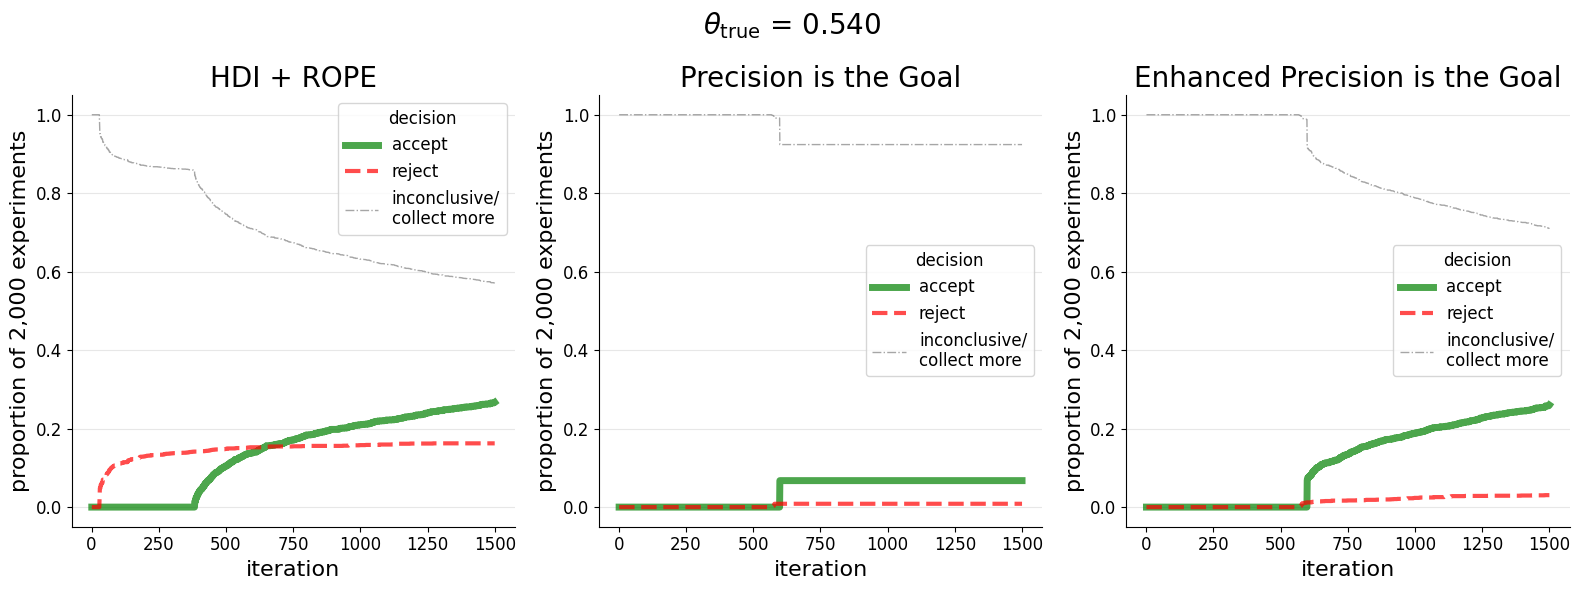

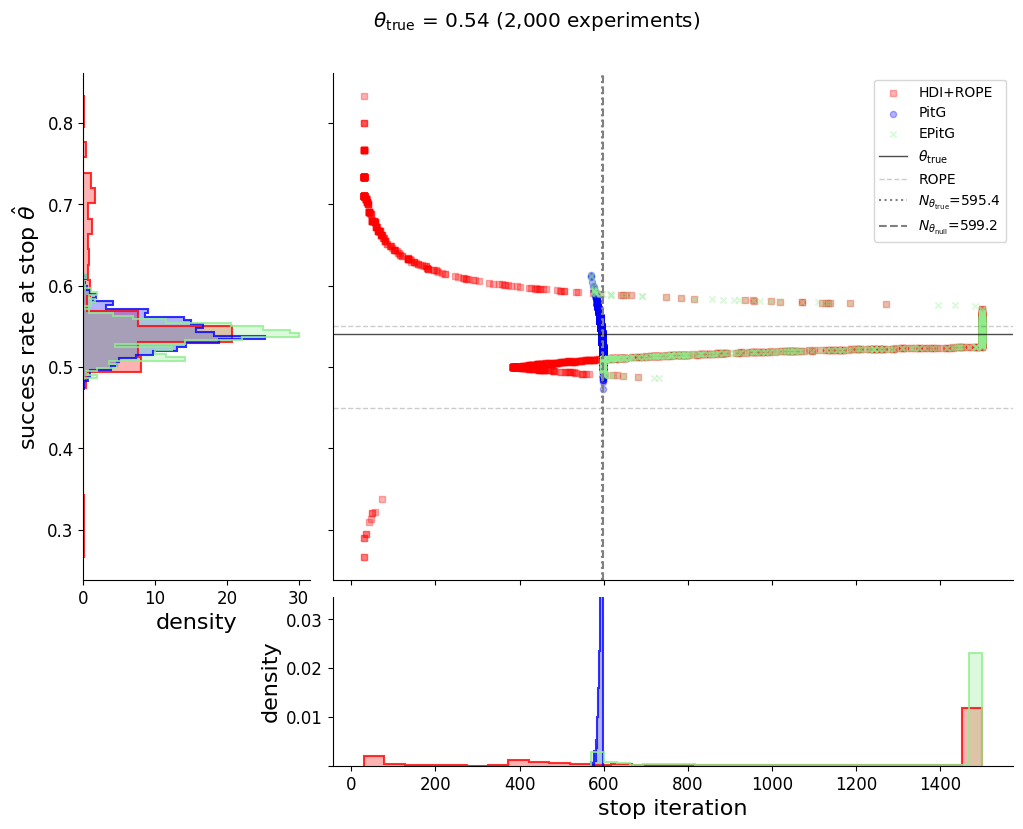

In [240]:
analysis_0pt54 = run_simulations_and_analysis_report(binary_accounting, success_rate_true=0.54)

Generating synthetic data with parameter values:
0.52: true success rate
2000: experiments
1500: sample size per experiment
0.5: null hypothesis
0.45: ROPE min
0.55: ROPE max
--------------------
0.08: Precision Goal
Sample 3 at final iteration
{'decision_iteration': 1500, 'accept': False, 'reject_below': False, 'reject_above': False, 'conclusive': False, 'inconclusive': True, 'successes': 796, 'failures': 704, 'hdi_min': 0.5054189719605636, 'hdi_max': 0.5559056796504055, 'precision_goal_achieved': True}
Sample 4 at final iteration
{'decision_iteration': 1500, 'accept': False, 'reject_below': False, 'reject_above': False, 'conclusive': False, 'inconclusive': True, 'successes': 818, 'failures': 682, 'hdi_min': 0.5201322656223768, 'hdi_max': 0.5705056751589526, 'precision_goal_achieved': True}
Sample 5 at final iteration
{'decision_iteration': 1500, 'accept': False, 'reject_below': False, 'reject_above': False, 'conclusive': False, 'inconclusive': True, 'successes': 816, 'failures': 684,

accept  reject  conclusive  inconclusive  stop_iter_mean  \
hdi_rope  0.7420  0.0780       0.820         0.180        781.3675   
pitg      0.2345  0.0015       0.236         0.764        597.2440   
epitg     0.7780  0.0020       0.780         0.220        946.1260   

          stop_iter_std  success_rate_mean  success_rate_std  
hdi_rope     454.818403           0.521762          0.054782  
pitg           2.499317           0.520183          0.020711  
epitg        364.507324           0.515122          0.015324

viz_epitg separate


count  success_frac  success_mean  success_std  \
algorithm group                                                          
pitg      overall        2000        1.0000      0.520183     0.020711   
          conclusive      472        0.2360      0.502159     0.009363   
          inconclusive   1528        0.7640      0.525750     0.020077   
          accept          469        0.2345      0.501561     0.005630   
          reject            3        0.0015      0.595629     0.006350   
epitg     overall        2000        1.0000      0.515122     0.015324   
          conclusive     1560        0.7800      0.509278     0.011506   
          inconclusive    440        0.2200      0.535841     0.006893   
          accept         1556        0.7780      0.509061     0.010689   
          reject            4        0.0020      0.593712     0.006448   
hdi_rope  overall        2000        1.0000      0.521762     0.054782   
          conclusive     1640        0.8200      0.518723     0.059995   
          inconclusive    360        0.1800      0.535604     0.006594   
          accept         1484        0.7420      0.507066     0.010254   
          reject          156        0.0780      0.629620     0.152892   

                        success_p25  success_median  success_p75  \
algorithm group                                                    
pitg      overall          0.505843        0.520067     0.535235   
          conclusive       0.497496        0.502504     0.505843   
          inconclusive     0.515860        0.526756     0.538591   
          accept           0.497496        0.502504     0.505843   
          reject           0.592050        0.593426     0.598107   
epitg     overall          0.505843        0.514687     0.523366   
          conclusive       0.502504        0.511006     0.517401   
          inconclusive     0.530667        0.534667     0.540000   
          accept           0.502504        0.511006     0.517289   
          reject           0.589996        0.592050     0.595766   
hdi_rope  overall          0.500000        0.512658     0.524277   
          conclusive       0.500000        0.507519     0.518296   
          inconclusive     0.530000        0.534667     0.540167   
          accept           0.500000        0.506024     0.516223   
          reject           0.643051        0.689683     0.709677   

                        stop_iter_mean  stop_iter_std  stop_iter_p25  \
algorithm group                                                        
pitg      overall           597.244000       2.499317          596.0   
          conclusive        598.860169       1.758673          599.0   
          inconclusive      596.744764       2.483272          596.0   
          accept            599.000000       0.000000          599.0   
          reject            577.000000       2.645751          576.0   
epitg     overall           946.126000     364.507324          600.0   
          conclusive        789.905128     243.642650          599.0   
          inconclusive     1500.000000       0.000000         1500.0   
          accept            790.406812     243.749417          599.0   
          reject            594.750000      35.565667          577.0   
hdi_rope  overall           781.367500     454.818403          432.0   
          conclusive        623.618902     337.584790          415.0   
          inconclusive     1500.000000       0.000000         1500.0   
          accept            682.895553     297.613362          438.0   
          reject             59.730769      62.922825           31.0   

                        stop_iter_median  stop_iter_p75  conclusive_mean  
algorithm group                                                           
pitg      overall                  598.0         599.00            0.236  
          conclusive               599.0         599.00            1.000  
          inconclusive             598.0         598.00            0.000  
        

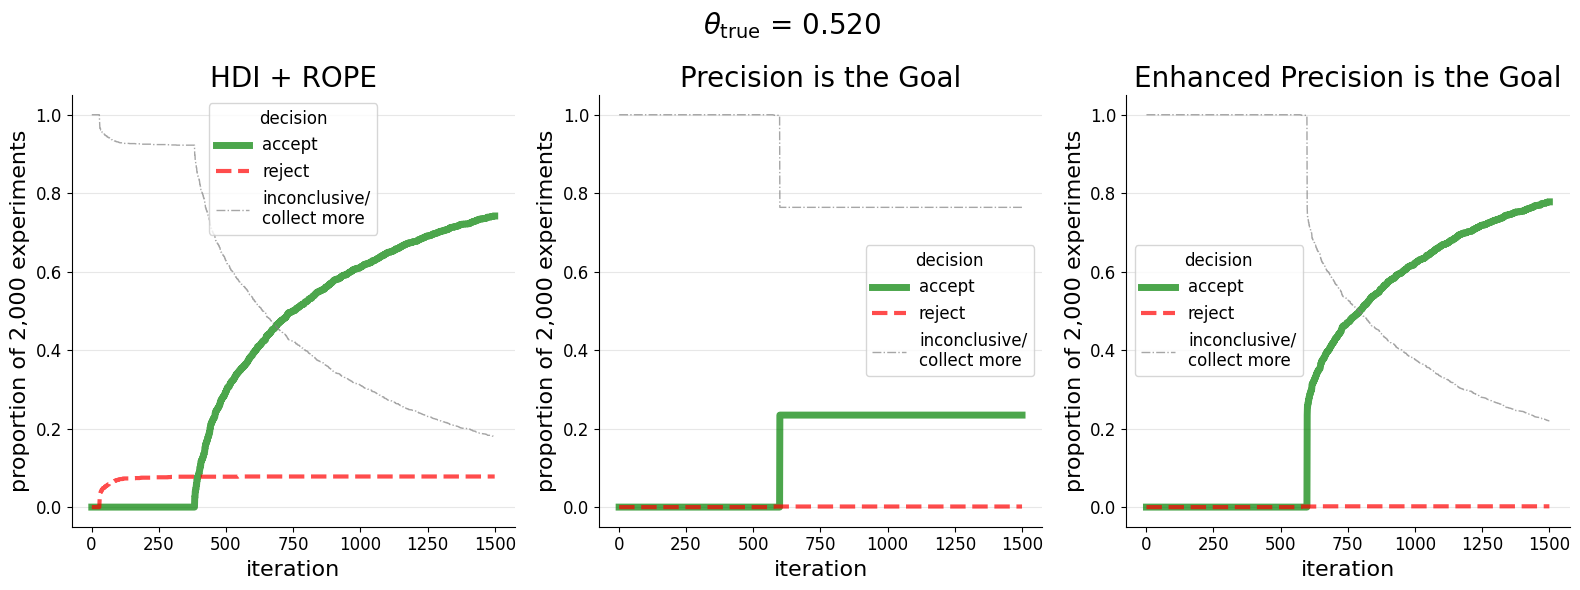

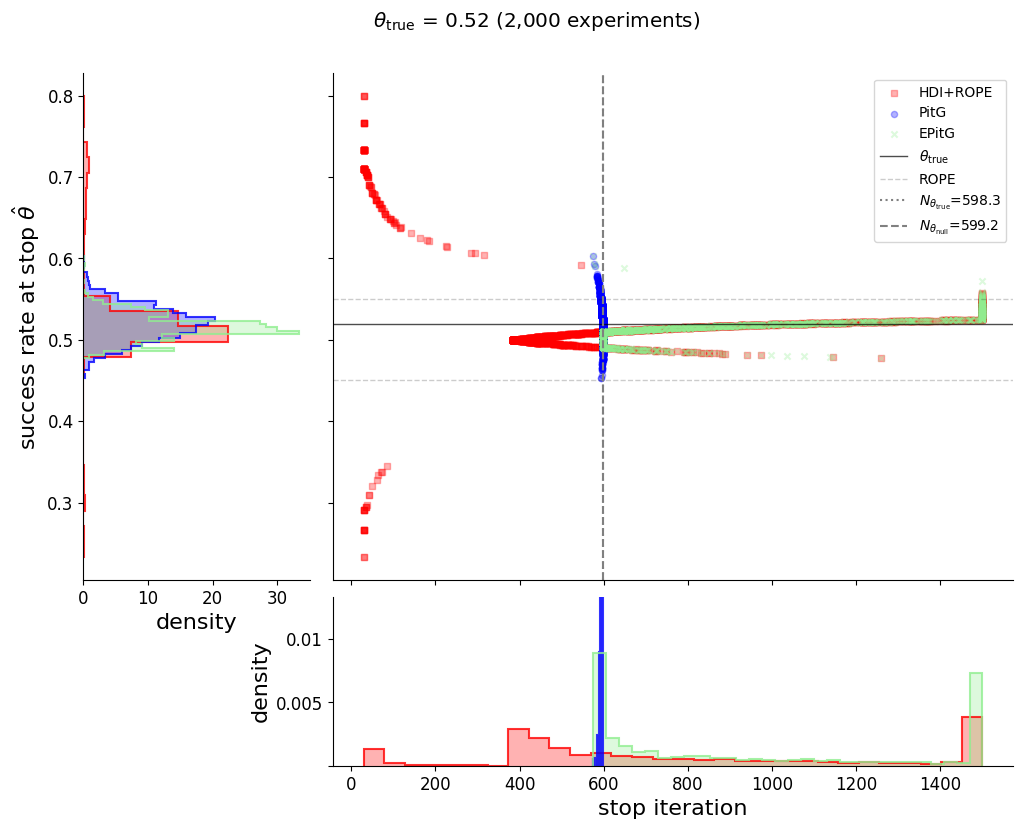

In [273]:
analysis_0pt52 = run_simulations_and_analysis_report(binary_accounting, success_rate_true=0.52)

Generating synthetic data with parameter values:
0.56: true success rate
2000: experiments
1500: sample size per experiment
0.5: null hypothesis
0.45: ROPE min
0.55: ROPE max
--------------------
0.08: Precision Goal
Sample 0 at final iteration
{'decision_iteration': 1500, 'accept': False, 'reject_below': False, 'reject_above': False, 'conclusive': False, 'inconclusive': True, 'successes': 829, 'failures': 671, 'hdi_min': 0.5274928637761854, 'hdi_max': 0.5777930962811357, 'precision_goal_achieved': True}
Sample 1 at final iteration
{'decision_iteration': 1500, 'accept': False, 'reject_below': False, 'reject_above': False, 'conclusive': False, 'inconclusive': True, 'successes': 839, 'failures': 661, 'hdi_min': 0.5341976709726503, 'hdi_max': 0.5844217588392538, 'precision_goal_achieved': True}
Sample 2 at final iteration
{'decision_iteration': 1500, 'accept': False, 'reject_below': False, 'reject_above': False, 'conclusive': False, 'inconclusive': True, 'successes': 843, 'failures': 657,

accept  reject  conclusive  inconclusive  stop_iter_mean  \
hdi_rope  0.0330  0.4150       0.448         0.552        998.4935   
pitg      0.0035  0.0725       0.076         0.924        589.5750   
epitg     0.0215  0.2685       0.290         0.710       1303.4305   

          stop_iter_std  success_rate_mean  success_rate_std  
hdi_rope     618.529451           0.588080          0.059521  
pitg           6.138340           0.560317          0.020270  
epitg        341.767516           0.563398          0.018307

viz_epitg separate


count  success_frac  success_mean  success_std  \
algorithm group                                                          
pitg      overall        2000        1.0000      0.560317     0.020270   
          conclusive      152        0.0760      0.594903     0.021711   
          inconclusive   1848        0.9240      0.557473     0.017309   
          accept            7        0.0035      0.504412     0.001785   
          reject          145        0.0725      0.599272     0.008768   
epitg     overall        2000        1.0000      0.563398     0.018307   
          conclusive      580        0.2900      0.582014     0.021580   
          inconclusive   1420        0.7100      0.555794     0.009090   
          accept           43        0.0215      0.513041     0.005289   
          reject          537        0.2685      0.587537     0.009415   
hdi_rope  overall        2000        1.0000      0.588080     0.059521   
          conclusive      896        0.4480      0.628275     0.069854   
          inconclusive   1104        0.5520      0.555457     0.009142   
          accept           66        0.0330      0.507342     0.007293   
          reject          830        0.4150      0.637892     0.063301   

                        success_p25  success_median  success_p75  \
algorithm group                                                    
pitg      overall          0.545455        0.561017     0.573379   
          conclusive       0.592401        0.595156     0.605585   
          inconclusive     0.545455        0.558376     0.570698   
          accept           0.503339        0.504174     0.505008   
          reject           0.592401        0.596187     0.605585   
epitg     overall          0.551333        0.560667     0.576497   
          conclusive       0.578924        0.585628     0.590501   
          inconclusive     0.550000        0.556667     0.562667   
          accept           0.510652        0.512894     0.515264   
          reject           0.580392        0.586592     0.590674   
hdi_rope  overall          0.553333        0.564667     0.606290   
          conclusive       0.585205        0.616822     0.680000   
          inconclusive     0.549333        0.556000     0.562667   
          accept           0.501196        0.505906     0.513957   
          reject           0.589586        0.624277     0.688889   

                        stop_iter_mean  stop_iter_std  stop_iter_p25  \
algorithm group                                                        
pitg      overall           589.575000       6.138340         586.00   
          conclusive        576.480263       6.520442         573.00   
          inconclusive      590.652056       4.693835         587.00   
          accept            599.000000       0.000000         599.00   
          reject            575.393103       4.328999         573.00   
epitg     overall          1303.430500     341.767516        1217.25   
          conclusive        822.174138     276.583584         580.50   
          inconclusive     1500.000000       0.000000        1500.00   
          accept            777.883721     202.107846         627.50   
          reject            825.720670     281.539995         579.00   
hdi_rope  overall           998.493500     618.529451         290.00   
          conclusive        380.565848     402.485735          50.00   
          inconclusive     1500.000000       0.000000        1500.00   
          accept            597.212121     244.074359         412.00   
          reject            363.338554     407.660423          45.00   

                        stop_iter_median  stop_iter_p75  conclusive_mean  
algorithm group                                                           
pitg      overall                  590.0         594.00            0.076  
          conclusive               578.0         579.00            1.000  
          inconclusive             591.0         594.00            0.000  
        

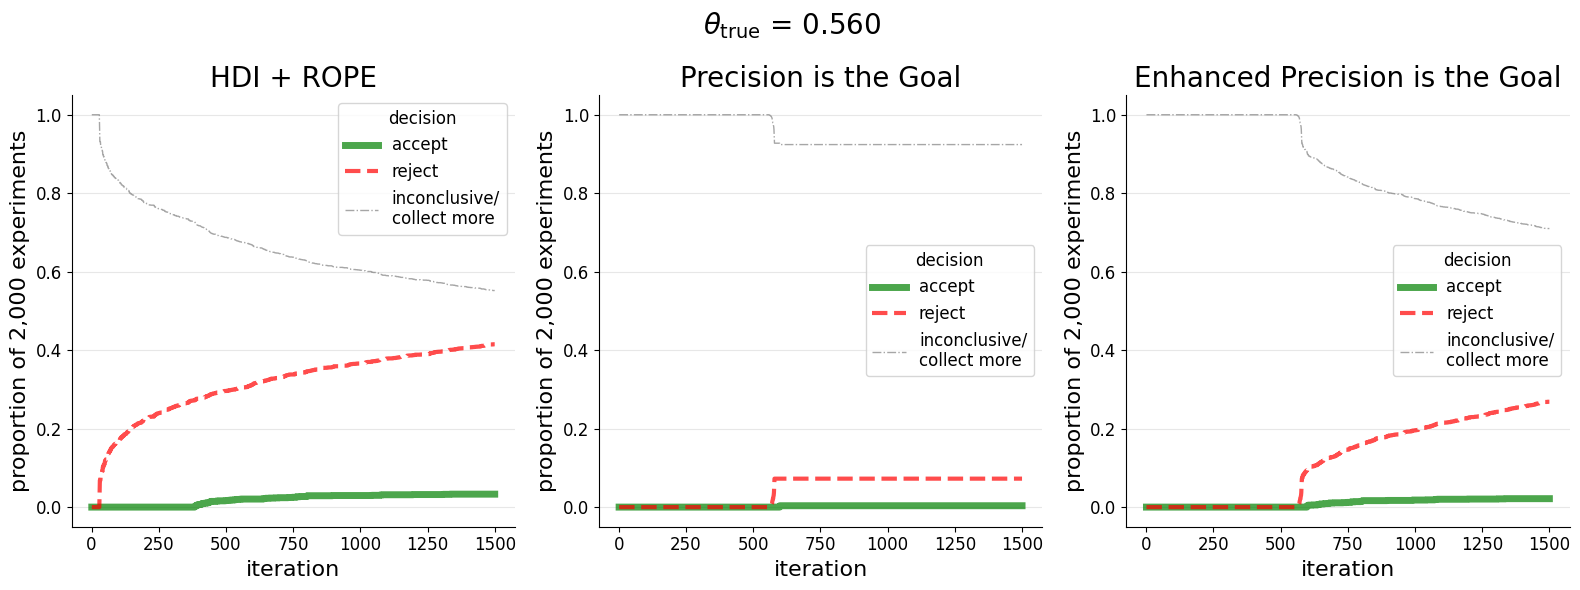

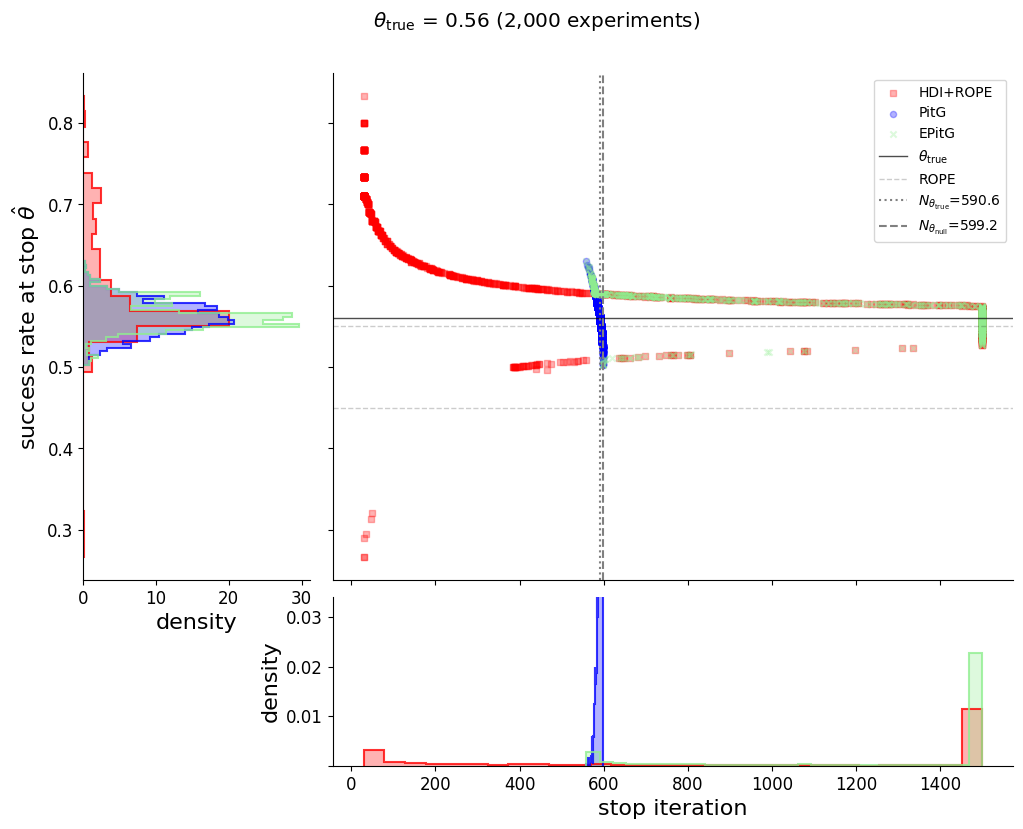

In [274]:
analysis_0pt56 = run_simulations_and_analysis_report(binary_accounting, success_rate_true=0.56)

Generating synthetic data with parameter values:
0.55: true success rate
2000: experiments
1500: sample size per experiment
0.5: null hypothesis
0.45: ROPE min
0.55: ROPE max
--------------------
0.08: Precision Goal
Sample 0 at final iteration
{'decision_iteration': 1500, 'accept': False, 'reject_below': False, 'reject_above': False, 'conclusive': False, 'inconclusive': True, 'successes': 815, 'failures': 685, 'hdi_min': 0.5181172046705578, 'hdi_max': 0.5685086565684114, 'precision_goal_achieved': True}
Sample 1 at final iteration
{'decision_iteration': 1500, 'accept': False, 'reject_below': False, 'reject_above': False, 'conclusive': False, 'inconclusive': True, 'successes': 828, 'failures': 672, 'hdi_min': 0.5268234905395917, 'hdi_max': 0.5771308321771497, 'precision_goal_achieved': True}
Sample 2 at final iteration
{'decision_iteration': 1500, 'accept': False, 'reject_below': False, 'reject_above': False, 'conclusive': False, 'inconclusive': True, 'successes': 826, 'failures': 674,

accept  reject  conclusive  inconclusive  stop_iter_mean  \
hdi_rope   0.110  0.2540      0.3640        0.6360       1090.1835   
pitg       0.022  0.0270      0.0490        0.9510        592.2885   
epitg      0.094  0.0925      0.1865        0.8135       1373.9355   

          stop_iter_std  success_rate_mean  success_rate_std  
hdi_rope     588.159585           0.570888          0.060070  
pitg           5.208439           0.550080          0.020389  
epitg        286.618554           0.550075          0.018580

viz_epitg separate


count  success_frac  success_mean  success_std  \
algorithm group                                                          
pitg      overall        2000        1.0000      0.550080     0.020389   
          conclusive       98        0.0490      0.556468     0.047746   
          inconclusive   1902        0.9510      0.549751     0.017849   
          accept           44        0.0220      0.504401     0.004984   
          reject           54        0.0270      0.598892     0.008225   
epitg     overall        2000        1.0000      0.550075     0.018580   
          conclusive      373        0.1865      0.550572     0.038122   
          inconclusive   1627        0.8135      0.549961     0.009585   
          accept          188        0.0940      0.513690     0.007242   
          reject          185        0.0925      0.588052     0.009091   
hdi_rope  overall        2000        1.0000      0.570888     0.060070   
          conclusive      728        0.3640      0.608014     0.087132   
          inconclusive   1272        0.6360      0.549639     0.009558   
          accept          220        0.1100      0.508899     0.008859   
          reject          508        0.2540      0.650938     0.068874   

                        success_p25  success_median  success_p75  \
algorithm group                                                    
pitg      overall          0.536913        0.549747     0.562712   
          conclusive       0.507513        0.590674     0.597920   
          inconclusive     0.536913        0.549747     0.562712   
          accept           0.500835        0.505843     0.507930   
          reject           0.593426        0.597054     0.601739   
epitg     overall          0.541333        0.550000     0.558667   
          conclusive       0.513250        0.524579     0.587372   
          inconclusive     0.542667        0.550000     0.556667   
          accept           0.509796        0.513287     0.519691   
          reject           0.581818        0.587444     0.590674   
hdi_rope  overall          0.541333        0.552667     0.575532   
          conclusive       0.519090        0.609944     0.679434   
          inconclusive     0.542667        0.550000     0.556167   
          accept           0.501198        0.507061     0.517804   
          reject           0.603460        0.651163     0.702703   

                        stop_iter_mean  stop_iter_std  stop_iter_p25  \
algorithm group                                                        
pitg      overall           592.288500       5.208439         590.00   
          conclusive        586.102041      12.089435         577.00   
          inconclusive      592.607256       4.358212         590.00   
          accept            599.000000       0.000000         599.00   
          reject            575.592593       4.104845         575.00   
epitg     overall          1373.935500     286.618554        1500.00   
          conclusive        824.050938     262.209368         599.00   
          inconclusive     1500.000000       0.000000        1500.00   
          accept            850.000000     267.504590         600.00   
          reject            797.681081     254.734348         579.00   
hdi_rope  overall          1090.183500     588.159585         467.75   
          conclusive        374.130495     379.344237          50.00   
          inconclusive     1500.000000       0.000000        1500.00   
          accept            685.659091     315.799424         424.00   
          reject            239.216535     320.805699          37.00   

                        stop_iter_median  stop_iter_p75  conclusive_mean  
algorithm group                                                           
pitg      overall                  593.0         596.00           0.0490  
          conclusive               579.0         599.00           1.0000  
          inconclusive             593.0         596.00           0.0000  
        

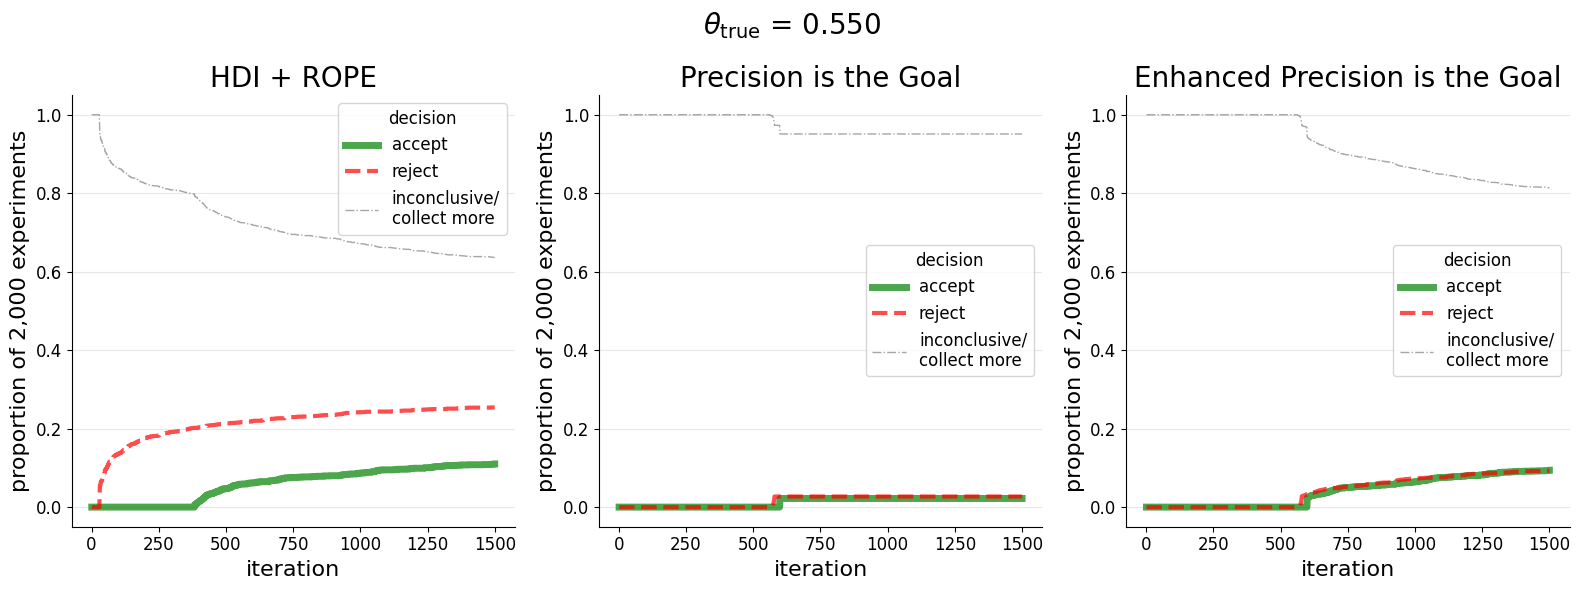

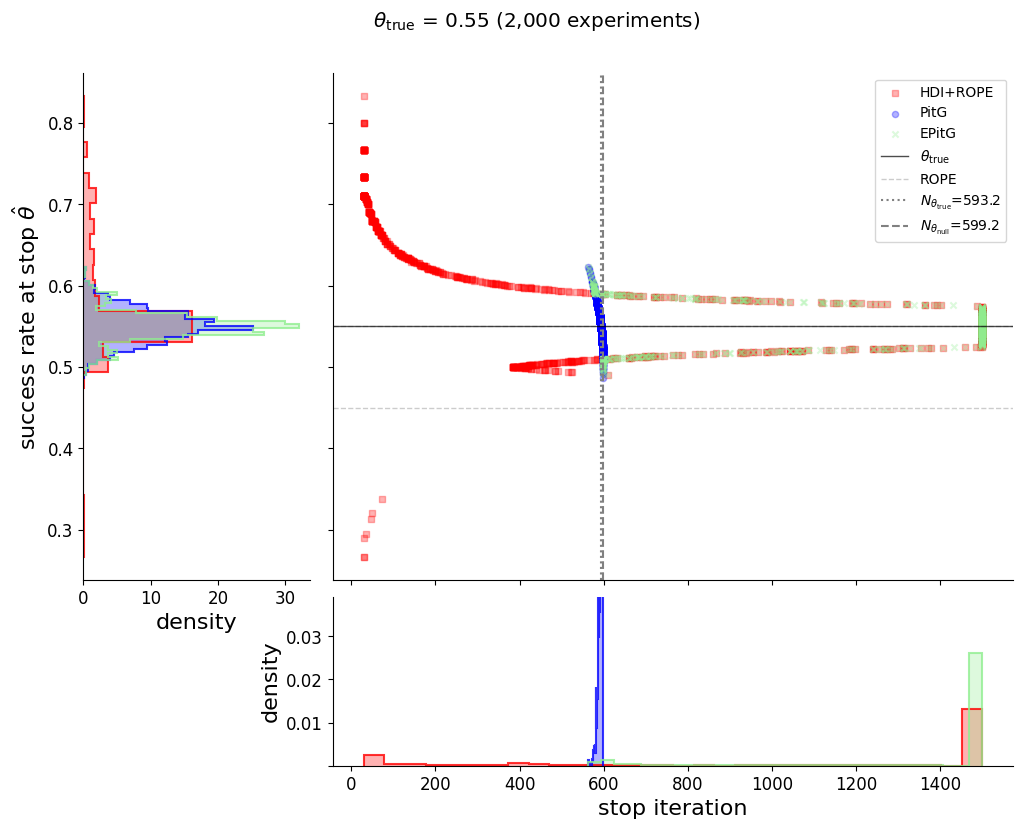

In [279]:
analysis_0pt55 = run_simulations_and_analysis_report(binary_accounting, success_rate_true=0.55)

# Decision vs. Cost

In [285]:
experiment_results = {
    0.5: analysis_0pt50,
    0.52: analysis_0pt52,
    0.53: analysis_0pt53,
    0.54: analysis_0pt54,
    0.55: analysis_0pt55,
    0.56: analysis_0pt56,
    0.57: analysis_0pt57,
    0.58: analysis_0pt58,
    0.60: analysis_0pt60,
    0.62: analysis_0pt62,
    0.63: analysis_0pt63,
    0.65: analysis_0pt65,
    0.7: analysis_0pt70,
    # 0.75: analysis_0pt75,
    # 0.85: analysis_0pt85,
}

In [286]:
experiment_result['df_stats'].keys()

Index(['count', 'success_frac', 'success_mean', 'success_std', 'success_p25',
       'success_median', 'success_p75', 'stop_iter_mean', 'stop_iter_std',
       'stop_iter_p25', 'stop_iter_median', 'stop_iter_p75',
       'conclusive_mean'],
      dtype='object')

In [297]:
algo_stats_df = {}

subset_name = "overall"
#subset_name = "conclusive"

#stat_type = "stop iteration"
# stat_type = "conclusive rate"
stat_type = "conclusive_to_stop"

if "stop iteration" == stat_type:
    mean_stat_name = "stop_iter_mean"
    median_stat_name = "stop_iter_median"
    p25_stat_name = "stop_iter_p25"
    p75_stat_name = "stop_iter_p75"
    l_stats_viz = ["stop_iter_p25", 'stop_iter_median', "stop_iter_p75", "stop_iter_mean"]
elif "conclusive rate" == stat_type:
    mean_stat_name ="conclusive_mean"
    median_stat_name, p25_stat_name, p75_stat_name =None, None, None

    l_stats_viz = [mean_stat_name]

elif "conclusive_to_stop" == stat_type:
    l_stats_viz = ["conclusive_mean", "stop_iter_median", "stop_iter_mean"]

for algo_name in [ 'hdi_rope','pitg', 'epitg']:
    result_summary = {}
    for theta_true, experiment_result in experiment_results.items():
        result_summary[theta_true] = experiment_result['df_stats'].loc[(algo_name, subset_name), l_stats_viz]

    algo_stats_df[algo_name] = pd.DataFrame(result_summary)
    algo_stats_df[algo_name].columns.name = 'theta_true'
    algo_stats_df[algo_name].index.name = 'stat'
    algo_stats_df[algo_name] = algo_stats_df[algo_name].T

algo_stats_df[algo_name]

stat        conclusive_mean  stop_iter_median  stop_iter_mean
theta_true                                                   
0.50                 0.9765             627.0        740.9665
0.52                 0.7800             792.0        946.1260
0.53                 0.5370            1376.5       1148.5125
0.54                 0.2905            1500.0       1308.2205
0.55                 0.1865            1500.0       1373.9355
0.56                 0.2900            1500.0       1303.4305
0.57                 0.5450            1311.0       1127.1755
0.58                 0.8045             743.0        914.9510
0.60                 0.9905             575.0        638.4050
0.62                 1.0000             564.0        571.4140
0.63                 1.0000             559.0        559.7985
0.65                 1.0000             545.0        543.6445
0.70                 1.0000             503.0        501.1045

In [298]:
# algo_name = 'hdi_rope'
# algo_name = 'pitg'
# algo_name = 'epitg'
ALGO_COLORS = {"pitg": "blue", "epitg": "green", "hdi_rope": "red"}

for algo_name in [ 'hdi_rope','pitg', 'epitg']:
    mean_stats = algo_stats_df[algo_name][mean_stat_name].copy()
    xvalues = mean_stats.index.values
    
    #if median_stat_name is not None:
    #    median_stats = algo_stats_df[algo_name][median_stat_name].copy()
    if p25_stat_name is not None and p75_stat_name is not None:
        p25_stats = algo_stats_df[algo_name][p25_stat_name].copy()
        p75_stats = algo_stats_df[algo_name][p75_stat_name].copy()
        plt.fill_between(xvalues, p25_stats.values, p75_stats.values, color=ALGO_COLORS[algo_name], alpha=0.2, label=f"{algo_name}")
    plt.plot(xvalues, mean_stats.values, color=ALGO_COLORS[algo_name], linestyle=None)


plt.grid(True, alpha=0.3)
# draw diagnonal line
#plt.plot(median_stats.index, median_stats.index, color='gray', linestyle='--', label=None, alpha=0.1)
plt.xlabel('True Success Rate')
plt.ylabel('Overall Stats')
plt.title(f'{stat_type.title()}')
plt.legend()
plt.axvline(0.55, color='gray', linestyle='--', label='ROPE upper bound')
plt.ylim(0, None)
plt.show()

KeyError: 'stop_iter_p25'

Text(0, 0.5, 'EPitG Conclusive Rate')

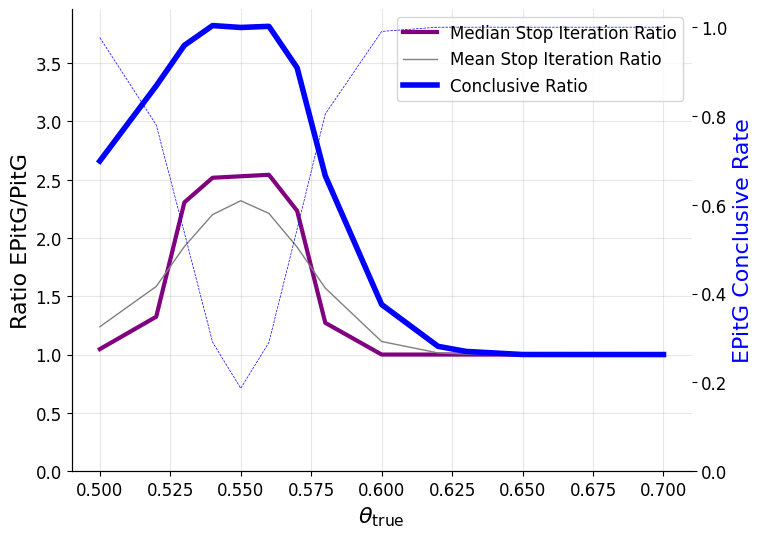

In [299]:
stop_ratio = algo_stats_df["epitg"]["stop_iter_median"] / algo_stats_df["pitg"]["stop_iter_median"]
stop_ratio_mean = algo_stats_df["epitg"]["stop_iter_mean"] / algo_stats_df["pitg"]["stop_iter_mean"]
conclusive_ratio = algo_stats_df["epitg"]["conclusive_mean"] / algo_stats_df["pitg"]["conclusive_mean"]


plt.plot(stop_ratio, color="purple", linewidth=3, label="Median Stop Iteration Ratio")
plt.plot(stop_ratio_mean, color="gray", linewidth=1, label="Mean Stop Iteration Ratio")
plt.plot(conclusive_ratio, color="blue", linewidth=4, label="Conclusive Ratio")
plt.ylim(0,None)
plt.grid(alpha=0.3)
plt.xlabel(r"$\theta_{\rm true}$")
plt.ylabel("Ratio EPitG/PitG")
plt.legend()

# create twin axis for conclusive ratio
ax1 = plt.gca()
ax2 = ax1.twinx()
plt.plot(algo_stats_df["epitg"]["conclusive_mean"], color="blue", linewidth=0.5, linestyle="--")
plt.ylim(0,None)
plt.ylabel("EPitG Conclusive Rate", color="blue")



# Null Not 0.5

Generating synthetic data with parameter values:
0.85: true success rate
500: experiments
1500: sample size per experiment
0.75: null hypothesis
0.7: ROPE min
0.8: ROPE max
--------------------
0.08: Precision Goal


accept  reject  conclusive  inconclusive  stop_iter_mean  \
hdi_rope     0.0   1.000       1.000         0.000         144.786   
pitg         0.0   0.676       0.676         0.324         291.450   
epitg        0.0   1.000       1.000         0.000         329.226   

          stop_iter_std  success_rate_mean  success_rate_std  
hdi_rope     163.106529           0.881056          0.036265  
pitg          52.206038           0.855714          0.028154  
epitg        133.545527           0.857701          0.025923

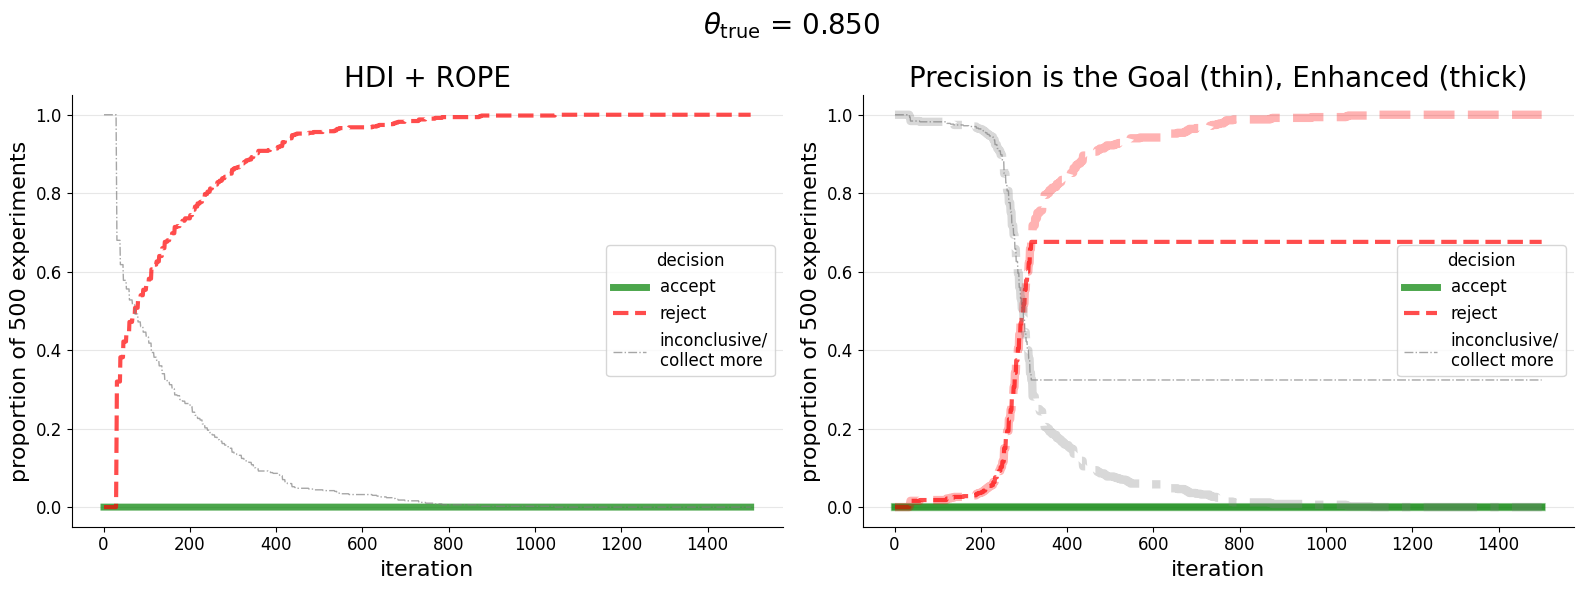

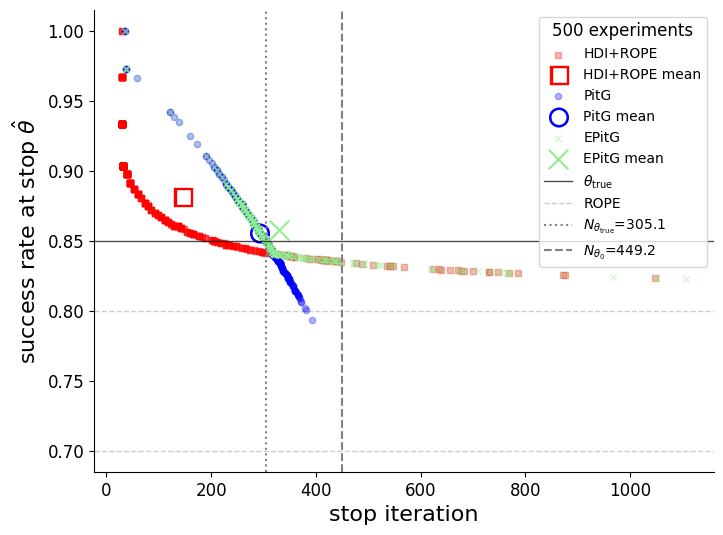

pitg
overall         0.855714
conclusive      0.868177
inconclusive    0.829709
accept               NaN
reject          0.868177
dtype: float64
----------------------------------------
epitg
overall         0.857701
conclusive      0.857701
inconclusive         NaN
accept               NaN
reject          0.857701
dtype: float64
----------------------------------------
hdi_rope
overall         0.881056
conclusive      0.881056
inconclusive         NaN
accept               NaN
reject          0.881056
dtype: float64
----------------------------------------
CPU times: user 28 s, sys: 755 ms, total: 28.7 s
Wall time: 27.6 s


In [82]:
%%time

full_analysis(binary_accounting, success_rate_true=0.85, success_rate_null=0.75, dsuccess_rate=0.05)

# Quantfiying Uncertainty

In [68]:
df_count_stats = pd.DataFrame(binary_accounting.dict_successes_failures_hdi_limits).T
df_count_stats = df_count_stats.reset_index().rename(columns={"level_0": "a", "level_1": "b", 0: "hdi_min", 1: "hdi_max"})
df_count_stats["hdi_width"] = df_count_stats["hdi_max"] - df_count_stats["hdi_min"]
df_count_stats['n'] = df_count_stats['a'] + df_count_stats['b']
df_count_stats.sort_values(["n", "a"], inplace=True)

df_count_stats.index.name = "tally"

df_count_stats.head(4)

a  b   hdi_min   hdi_max
tally                          
0      0  1  0.000000  0.776393
1      1  1  0.050000  1.000000
2      2  1  0.223607  1.000000
3      3  1  0.368403  1.000000

In [76]:
# apply  beta.var(a_, b_) to columns a and b

df_count_stats['var'] = df_count_stats.apply(lambda x: beta.var(x["a"], x["b"]), axis=1)

In [81]:
df_count_stats['std'] = df_count_stats['var'].apply(lambda x: np.sqrt(x))

In [109]:
df_count_stats["n"].astype(float)/ 20.


tally
0          0.05
640        0.05
3690       0.10
1          0.10
1196       0.10
          ...  
103260    75.00
105512    75.00
81546     75.00
105147    75.00
80207     75.00
Name: n, Length: 106863, dtype: float64

In [117]:
df_count_stats.tail(4)

a    b   hdi_min   hdi_max       var  hdi_width       std     n
tally                                                                    
105512  858  642  0.546950  0.597004  0.000163   0.050054  0.012771  1500
81546   859  641  0.547621  0.597665  0.000163   0.050044  0.012769  1500
105147  860  640  0.548292  0.598326  0.000163   0.050034  0.012766  1500
80207   861  639  0.548963  0.598987  0.000163   0.050024  0.012764  1500

In [119]:
df_count_stats.tail(4)["std"] * 1.96 * 2

tally
105512    0.050063
81546     0.050053
105147    0.050043
80207     0.050033
Name: std, dtype: float64

In [ ]:
a_ = 861
b_ = 639

In [116]:
0.012764 * 1.96*2

0.05003488

Text(0, 0.5, 'hdi_width')

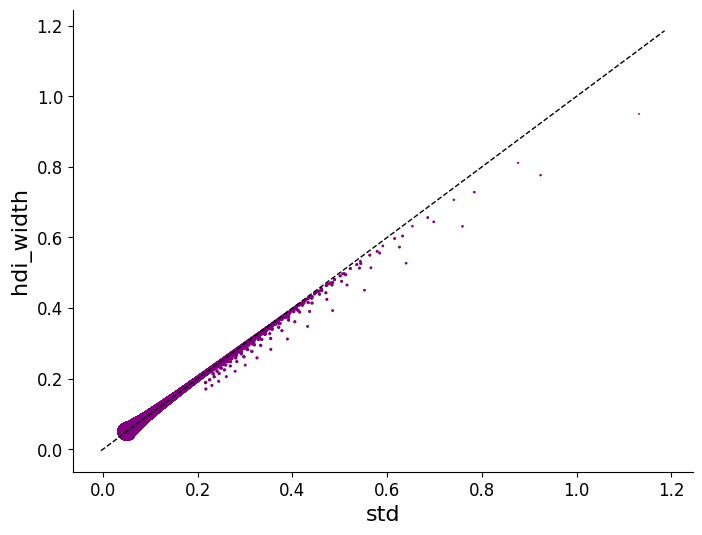

In [122]:
plt.scatter(df_count_stats['std'] * 1.96 * 2, df_count_stats["hdi_width"], s=df_count_stats["n"] / 10., color="purple")

plot_parity_line()
plt.xlabel("std")
plt.ylabel("hdi_width")

Text(0, 0.5, '$\\log_{10}(diff)$')

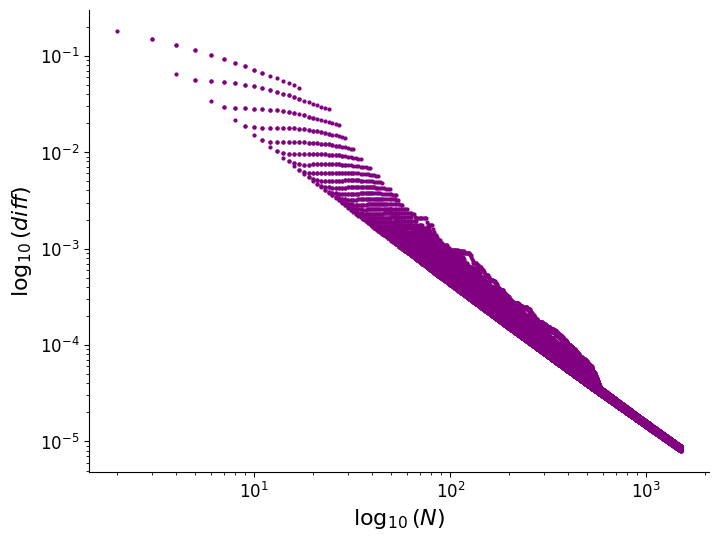

In [139]:
factor_ = 1.96 * 2   # 1.96 for 95% CI, 2 for two-tailed

sr_diff = df_count_stats['std'] * factor_ -  df_count_stats["hdi_width"]
sr_frac = sr_diff/ df_count_stats["hdi_width"]


plt.scatter(df_count_stats["n"], sr_diff, color="purple", s=4)
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$\log_{10}(N)$")
plt.ylabel(r"$\log_{10}(diff)$")

Text(0, 0.5, '$\\log_{10}(\\%)$')

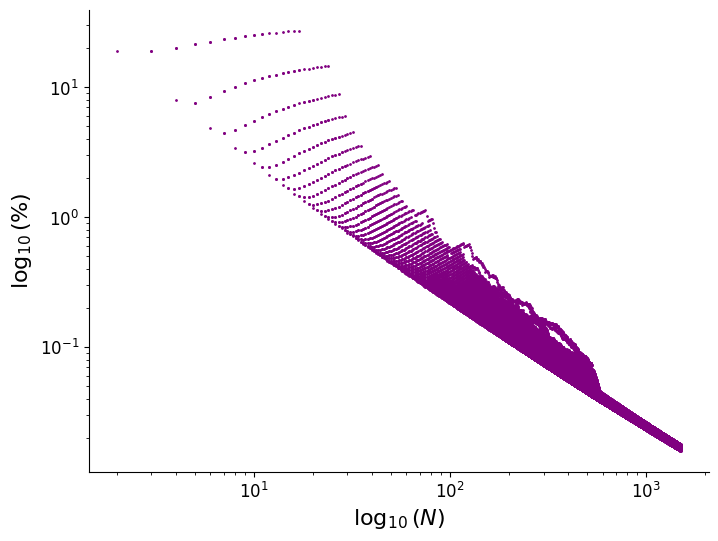

In [146]:
plt.scatter(df_count_stats["n"], sr_frac * 100., color="purple", s=1)
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$\log_{10}(N)$")
plt.ylabel(r"$\log_{10}(\%)$")

In [123]:
plt.scatter(df_count_stats['std'] * 1.96 * 2, df_count_stats["hdi_width"], s=df_count_stats["n"] / 10., color="purple")

plot_parity_line()
plt.xlabel("std")
plt.ylabel("hdi_width")

tally
0              NaN
640            NaN
3690           NaN
1         1.131607
1196           NaN
            ...   
103260    0.050073
105512    0.050063
81546     0.050053
105147    0.050043
80207     0.050033
Name: std, Length: 106863, dtype: float64

In [83]:
df_count_stats.tail(4)

a    b   hdi_min   hdi_max       var  hdi_width       std
tally                                                              
106859  607  440  0.549832  0.609586  0.000232   0.059754  0.015247
106860  608  440  0.550250  0.609968  0.000232   0.059718  0.015238
106861  833  622  0.547077  0.597890  0.000168   0.050814  0.012965
106862  624  467  0.542577  0.601258  0.000224   0.058681  0.014973

In [ ]:
variances = []
hdi_widths = []
as_ = []
bs_ = []

for a_, b_ in binary_accounting.dict_successes_failures_hdi_limits.keys():
    if a_ >= 10 and b_ >= 10:
        variances.append(beta.var(a_, b_))
        hdi_min, hdi_max = binary_accounting.dict_successes_failures_hdi_limits[(a_, b_)]
        hdi_widths.append(hdi_max - hdi_min)
        as_.append(a_)
        bs_.append(b_)

variances = np.array(variances)
hdi_widths = np.array(hdi_widths)
ns_ = np.array(ns_)

# Old Scripts
Consider deleting

In [45]:
# https://en.wikipedia.org/wiki/Beta_distribution
alpha_, beta_ =  300, 300
alpha_beta__squared = (alpha_ + beta_) ** 2
variance_ = alpha_ * beta_ / ( alpha_beta__squared * (alpha_ + beta_ + 1))

np.sqrt(variance_) * 1.95 * 2

0.0795421591036804

In [4]:
success_rate_null = 0.5   # this is the null hypothesis, not necessarilly true
dsuccess_rate = 0.05 #success_rate * 0.1
rope_precision_fraction = 0.8

success_rate = 0.5  #0.65  #0.5 + 0.5 * dsuccess_rate  # the true value
# --------

rope_min = success_rate_null - dsuccess_rate
rope_max = success_rate_null + dsuccess_rate

# hypothesis: if precision_goal is lower, then PitG has less of
# an inconclusiveness problem but at the expense of more trials.
precision_goal = (2 * dsuccess_rate) * rope_precision_fraction
#precision_goal = (dsuccess_rate) * rope_precision_fraction # 1500 was not enough for 0.04
#precision_goal = (1.5 * dsuccess_rate) * rope_precision_fraction # 1500 was not enough for 0.04


print(f"{success_rate_null:0.5}: null")
print(f"{rope_min:0.2}: ROPE min")
print(f"{rope_max:0.2}: ROPE max")
print("-" * 20)
print(f"{precision_goal:0.2}: Precision Goal")
print("-" * 20)
print(f"{success_rate:0.3}: true")

0.5: null
0.45: ROPE min
0.55: ROPE max
--------------------
0.08: Precision Goal
--------------------
0.5: true


In [46]:
experiments = 500 # number of experiments 500 #200 #300 #200
n_samples = 1500  #2500 # max number of samples in each experiement #2500 #1000 #1500

np.random.seed(seed)
samples = np.random.binomial(1, success_rate, [experiments, n_samples])

samples.shape  # (experiments, n_samples)

(500, 1500)

# Enhanced Precision is the Goal

As compared to "Precision is the Goal" and HDI+ROPE.

In [47]:
# binary_accounting = BinaryAccounting()

In [48]:
method_stats, method_roperesult_iteration = stop_decision_multiple_experiments_multiple_methods(samples, rope_min, rope_max, precision_goal, binary_accounting=binary_accounting)

Sample 140 at final iteration
{'decision_iteration': 1500, 'accept': False, 'reject_below': False, 'reject_above': False, 'conclusive': False, 'inconclusive': True, 'successes': 708, 'failures': 792, 'hdi_min': 0.446766867411269, 'hdi_max': 0.4972694566161049}
Sample 165 at final iteration
{'decision_iteration': 1500, 'accept': False, 'reject_below': False, 'reject_above': False, 'conclusive': False, 'inconclusive': True, 'successes': 809, 'failures': 691, 'hdi_min': 0.5141054692980911, 'hdi_max': 0.5645305410768443}
Sample 169 at final iteration
{'decision_iteration': 1500, 'accept': False, 'reject_below': False, 'reject_above': False, 'conclusive': False, 'inconclusive': True, 'successes': 698, 'failures': 802, 'hdi_min': 0.4401126621762446, 'hdi_max': 0.4905728257358288}
Sample 171 at final iteration
{'decision_iteration': 1500, 'accept': False, 'reject_below': False, 'reject_above': False, 'conclusive': False, 'inconclusive': True, 'successes': 705, 'failures': 795, 'hdi_min': 0.44

In [49]:
# examining uniqueness distributions of success and failure pairs
100. * pd.Series(binary_accounting.dict_successes_failures_counter).value_counts(normalize=True).sort_index()

1      31.374649
2      13.900983
3       7.907303
4       5.540730
5       4.216994
         ...    
209     0.001756
216     0.001756
250     0.001756
253     0.001756
287     0.001756
Name: proportion, Length: 129, dtype: float64

In [50]:
method_df_stats = {method_name: stats_dict_to_df(method_stats[method_name]) for method_name in method_stats}

method_df_stats["hdi_rope"]

decision_iteration accept reject_below reject_above  \
experiment_number                                                       
0                                424   True        False        False   
1                                443   True        False        False   
2                                794   True        False        False   
3                                597   True        False        False   
4                                445   True        False        False   
...                              ...    ...          ...          ...   
495                             1157   True        False        False   
496                             1075   True        False        False   
497                              845   True        False        False   
498                              604   True        False        False   
499                               10  False         True        False   

                  conclusive inconclusive successes failures   hdi_min  \
experiment_number                                                        
0                       True        False       211      213   0.45014   
1                       True        False       223      220  0.456903   
2                       True        False       409      385   0.48037   
3                       True        False       293      304  0.450736   
4                       True        False       224      221  0.456992   
...                      ...          ...       ...      ...       ...   
495                     True        False       554      603  0.450073   
496                     True        False       516      559  0.450169   
497                     True        False       436      409  0.482297   
498                     True        False       308      296   0.47011   
499                     True        False         2        8  0.008635   

                    hdi_max precision success_rate  
experiment_number                                   
0                  0.545164  0.095024     0.497642  
1                  0.549872  0.092969     0.503386  
2                  0.549832  0.069462     0.515113  
3                  0.530843  0.080107     0.490787  
4                  0.549753  0.092761     0.503371  
...                     ...       ...          ...  
495                0.507607  0.057534     0.478825  
496                 0.50986  0.059691         0.48  
497                 0.54963  0.067334     0.515976  
498                 0.54975   0.07964     0.509934  
499                 0.43345  0.424815          0.2  

[500 rows x 12 columns]

In [51]:
method_df_iteration_counts = {method_name: iteration_counts_to_df(method_roperesult_iteration[method_name], experiments) for method_name in method_roperesult_iteration}

method_df_iteration_counts["hdi_rope"]

iteration  accept  reject_below  reject_above  reject  inconclusive
0             1       0             0             0       0           500
1             2       0             0             0       0           500
2             3       0             0             0       0           500
3             4       0             0             0       0           500
4             5       0            14            13      27           473
...         ...     ...           ...           ...     ...           ...
1495       1496     373            62            59     121             6
1496       1497     373            62            59     121             6
1497       1498     373            62            59     121             6
1498       1499     373            62            59     121             6
1499       1500     373            62            59     121             6

[1500 rows x 6 columns]

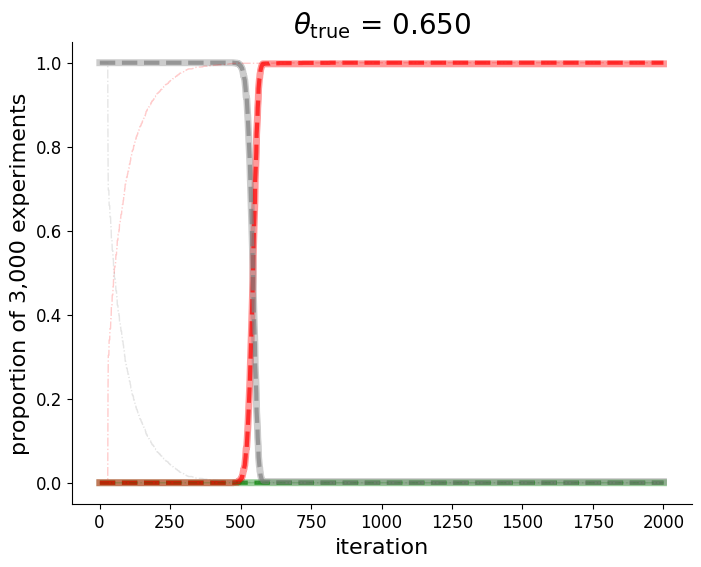

In [200]:
plot_multiple_decision_rates_jammed(method_df_iteration_counts, success_rate, experiments, iteration_values=None)

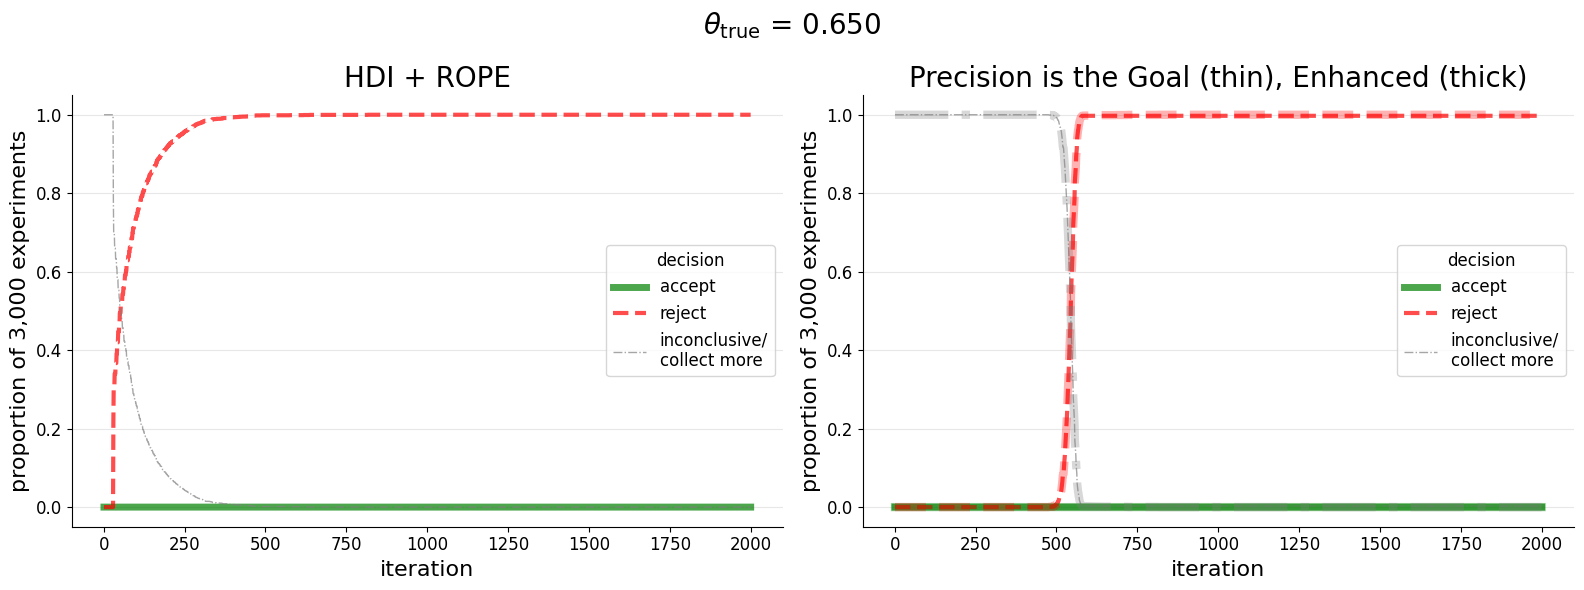

In [199]:
viz_epitg = True
plot_multiple_decision_rates_separate(method_df_iteration_counts, success_rate, experiments, viz_epitg=viz_epitg, iteration_values=None)

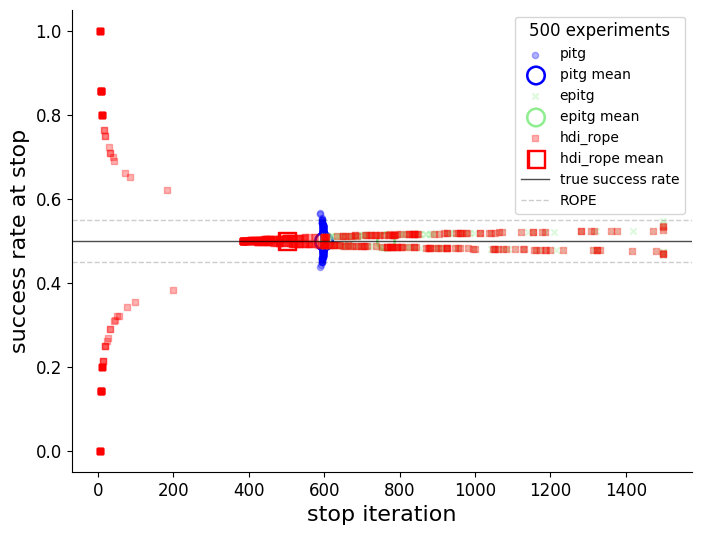

In [54]:
scatter_stop_iter_sample_rate(method_df_stats, rope_min=rope_min, rope_max=rope_max, success_rate_true=success_rate, title=None)

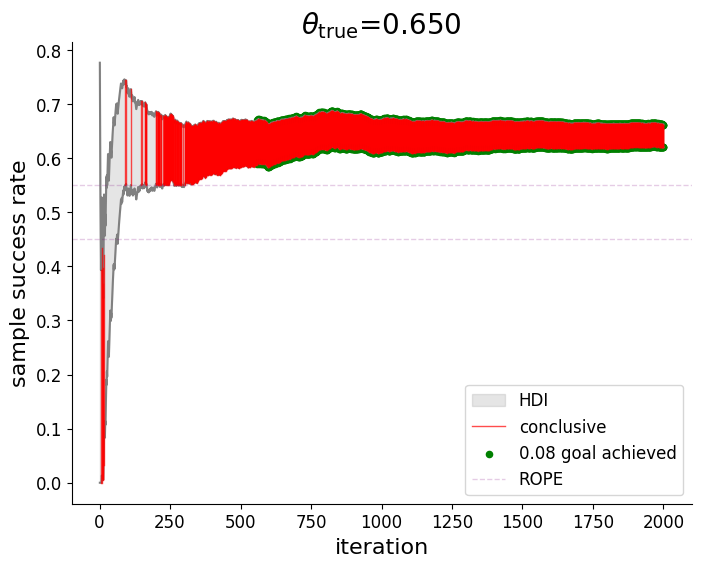

In [197]:
isample  = 2

df_sample_results = sample_all_iterations_results(samples[isample, :], precision_goal, rope_min, rope_max, binary_accounting=binary_accounting, iteration_number=None)

viz_one_sample_results(df_sample_results, precision_goal, rope_min, rope_max, success_rate=success_rate)

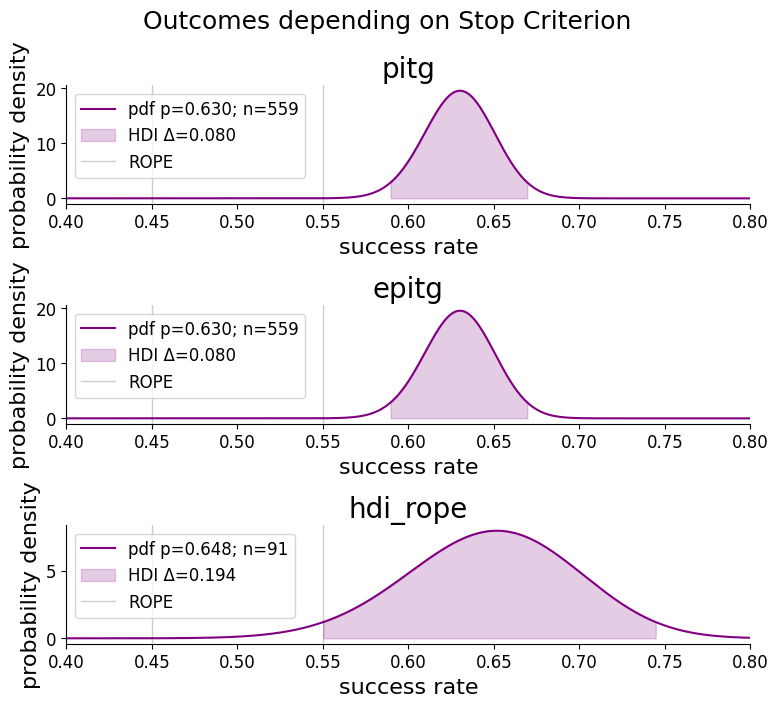

In [203]:
xlim = (0.4,0.8)
plot_sample_pdf_methods(method_df_stats, isample, rope_min, rope_max, xlim=xlim, method_names=None)


# Old Scripts
Some still useful!

In [28]:
dict_successes_failures_hdi_limits = {}
dict_successes_failures_counter = {}

def _update_iteration_tally(iteration_dict, iteration):
    for this_iteration in range(iteration, len(iteration_dict)+1):
        iteration_dict[this_iteration] += 1

def booleans_to_rope_result(decision_accept, decision_reject_below, decision_reject_above):
    if decision_accept:
        return "within"
    elif decision_reject_below:
        return "below"
    elif decision_reject_above:
        return "above"

def successes_failures_to_hdi_limits(successes, failures):

    pair = (successes, failures)
    if pair not in dict_successes_failures_hdi_limits:
        dict_successes_failures_hdi_limits[pair] =\
            successes_failures_caculate_hdi_limits(successes, failures)
        dict_successes_failures_counter[pair] = 1
    else:
        dict_successes_failures_counter[pair] += 1

    return dict_successes_failures_hdi_limits[pair]


def successes_failures_caculate_hdi_limits(successes, failures):
    aa = int(successes)
    bb = int(failures)
    
    if not failures:
        aa += 1
        bb += 1
        
    if not successes:
        aa += 1
        bb += 1

    hdi_min, hdi_max = successes_failures_to_hdi_ci_limits(aa, bb)

    return hdi_min, hdi_max

In [29]:
# For each method and rope result type creating tally of outcomes

method_roperesult_iteration = {}
methods = ["pitg", "epitg", "hdi_rope"]
rope_results = ["within", "below", "above"]
for method in methods:
    method_roperesult_iteration[method] = {}
    for rope_result in rope_results:
        method_roperesult_iteration[method][rope_result] = {iteration: 0 for iteration in range(1, n_samples + 1)}

print(method, rope_result)
len(method_roperesult_iteration[method][rope_result])

hdi_rope above


1500

In [30]:
iteration_number = np.arange(1, n_samples + 1)

method_stats = {"pitg": {}, "epitg": {}, "hdi_rope": {}}

for isample, sample in enumerate(samples):
    pitg_stopped = False
    hdi_rope_stopped = False

    iteration_successes = sample.cumsum()
    iteration_failures = iteration_number - iteration_successes

    for iteration, successes, failures in zip(iteration_number, iteration_successes, iteration_failures):
        final_iteration = iteration == iteration_number[-1]
        hdi_min, hdi_max = successes_failures_to_hdi_limits(successes, failures)
        #hdi_min, hdi_max = successes_failures_caculate_hdi_limits(successes, failures)

        # has the precision goal been achieved?
        precision_goal_achieved = (hdi_max - hdi_min) < precision_goal

        # is the HDI conclusively within or outside the ROPE?
        decision_accept = (hdi_min >= rope_min) & (hdi_max <= rope_max)
        decision_reject_below = hdi_max < rope_min  
        decision_reject_above = rope_max < hdi_min
        conclusive = decision_accept | decision_reject_above | decision_reject_below

        iteration_results = {"decision_iteration": iteration,
                                                 "accept": decision_accept,
                                                    "reject_below": decision_reject_below,
                                                    "reject_above": decision_reject_above,
                                                    "conclusive": conclusive,
                                                    "inconclusive": not conclusive,
                                                    "successes": successes,
                                                    "failures": failures,
                                                    "hdi_min": hdi_min,
                                                    "hdi_max": hdi_max,
                                                 }   

        if precision_goal_achieved:

            # update Precision Is The Goal Stop
            if pitg_stopped is False:
                # not applying `break` because we continue for ePiTG
                if conclusive:
                    rope_result = booleans_to_rope_result(decision_accept, decision_reject_below, decision_reject_above)
                    _update_iteration_tally(method_roperesult_iteration["pitg"][rope_result], iteration)
                method_stats["pitg"][isample] = iteration_results
                pitg_stopped = True  # sample does not continue with PITG (only ePiTG) 

            # continue with Enhance Precision Is The Goal
            if conclusive:
                rope_result = booleans_to_rope_result(decision_accept, decision_reject_below, decision_reject_above)
                _update_iteration_tally(method_roperesult_iteration["epitg"][rope_result], iteration)

                if hdi_rope_stopped is False:
                    _update_iteration_tally(method_roperesult_iteration["hdi_rope"][rope_result], iteration)
                    
            if conclusive | final_iteration:
                method_stats["epitg"][isample] = iteration_results

                if hdi_rope_stopped is False:
                    method_stats["hdi_rope"][isample] = iteration_results
                    hdi_rope_stopped = True

                if final_iteration:
                    print(f"Sample {isample} at final iteration")
                    print(method_stats["epitg"][isample])
                break
        
        elif conclusive & (hdi_rope_stopped is False):
            # case in which precision not achieved yet but conclusive.
            # this is the HDI+ROPE approach which disregards precision
            rope_result = booleans_to_rope_result(decision_accept, decision_reject_below, decision_reject_above)
            _update_iteration_tally(method_roperesult_iteration["hdi_rope"][rope_result], iteration)
            method_stats["hdi_rope"][isample] = iteration_results

            hdi_rope_stopped = True

        elif final_iteration:
            # ensures that if reached final iteration and not conclusive that
            # results are still recorded as inconclusive
            
            """
            decision_accept = False
            decision_reject_below = False
            decision_reject_above = False
            conclusive = False
            """
            if isample not in method_stats["hdi_rope"]:
               method_stats["hdi_rope"][isample] = iteration_results
            if isample not in method_stats["pitg"]:
                method_stats["pitg"][isample] = iteration_results
            if isample not in method_stats["epitg"]:
                method_stats["epitg"][isample] = iteration_results
            break

In [ ]:
# examining uniqueness distributions of success and failure pairs
pd.Series(dict_successes_failures_counter).value_counts(normalize=True).sort_index()

In [ ]:
def stats_dict_to_df(method_stats):
    df = pd.DataFrame(method_stats).T
    df.index.name = "experiment_number"
    df["precision"] = df["hdi_max"] - df["hdi_min"]
    df["success_rate"] = df["successes"] / (df["successes"] + df["failures"])
    return df


df_stats_epitg = stats_dict_to_df(method_stats["epitg"])
print(df_stats_epitg.shape)
df_stats_epitg.head(4)

In [ ]:
df_stats_pitg = stats_dict_to_df(method_stats["pitg"])
print(df_stats_pitg.shape)
df_stats_pitg.head(4)

In [ ]:
df_stats_hdirope = stats_dict_to_df(method_stats["hdi_rope"])
print(df_stats_hdirope.shape)
df_stats_hdirope.head(4)

In [ ]:
df_stats_pitg.equals(df_stats_epitg)

In [ ]:
def iteration_counts_to_df(roperesult_iteration, experiments):
    df = pd.DataFrame({
        "iteration": list(roperesult_iteration["within"].keys()),
        "accept": list(roperesult_iteration["within"].values()),
        "reject_below": list(roperesult_iteration["below"].values()),
        "reject_above": list(roperesult_iteration["above"].values())
    })

    df['reject'] = df['reject_above'] + df['reject_below']
    df['inconclusive'] = experiments - df['accept'] - df['reject']

    return df

df_pitg_counts = iteration_counts_to_df(method_roperesult_iteration["pitg"], experiments)
df_epitg_counts = iteration_counts_to_df(method_roperesult_iteration["epitg"], experiments)
df_hdirope_counts = iteration_counts_to_df(method_roperesult_iteration["hdi_rope"], experiments)


df_epitg_counts.head(4)

In [ ]:
df_epitg_counts.describe()

In [ ]:
df_pitg_counts.describe()

In [ ]:
df_hdirope_counts.describe()

In [ ]:
df_pitg_counts.equals(df_epitg_counts)

In [ ]:
title = f"true success rate = {success_rate:0.3f}"
xlabel = "iteration"

iteration_values = df_pitg_counts["iteration"]

# plotting HDI+ROPE
alpha, linewidth, linestyle = 0.2, 1, "-."
plt.plot(iteration_values, df_hdirope_counts['accept'] / experiments, color="green", linewidth=linewidth, alpha=alpha, linestyle=linestyle)
plt.plot(iteration_values, df_hdirope_counts['reject'] / experiments, color="red", linewidth=linewidth, alpha=alpha, linestyle=linestyle)
plt.plot(iteration_values, df_hdirope_counts['inconclusive'] / experiments, color="gray", linewidth=linewidth, alpha=alpha, linestyle=linestyle)


# plotting pitg
alpha, linewidth = 0.4, 5
plt.plot(iteration_values, df_pitg_counts['accept'] / experiments, color="green", linewidth=linewidth, alpha=alpha)
plt.plot(iteration_values, df_pitg_counts['reject'] / experiments, color="red", linewidth=linewidth, alpha=alpha)
plt.plot(iteration_values, df_pitg_counts['inconclusive'] / experiments, color="gray", linewidth=linewidth, alpha=alpha)

# plotting epitg
alpha, linewidth, linestyle = 0.7, 3, "--"
plt.plot(iteration_values, df_epitg_counts['accept'] / experiments, color="green", linewidth=linewidth, alpha=alpha, linestyle=linestyle)
plt.plot(iteration_values, df_epitg_counts['reject'] / experiments, color="red", linewidth=linewidth, alpha=alpha, linestyle=linestyle)
plt.plot(iteration_values, df_epitg_counts['inconclusive'] / experiments, color="gray", linewidth=linewidth, alpha=alpha, linestyle=linestyle)


#plt.xscale('log')
#plt.yscale('log')
plt.xlabel(xlabel)
plt.ylabel(f"proportion of {experiments:,} experiments")
plt.title(title)

In [ ]:
plt.figure(figsize=(FIG_WIDTH * 2, FIG_HEIGHT))

viz_epitg = True

suptitle = f"true success rate = {success_rate:0.3f}"
alpha=0.7

linestyle_accept, linewidth_accept = None, 5
linestyle_reject, linewidth_reject = "--", 3
linestyle_inconclusive, linewidth_inconclusive = "-.", 1


plt.subplot(1, 2, 1)

# plotting HDI+ROPE
plt.plot(iteration_values, df_hdirope_counts['accept'] / experiments, color="green", linewidth=linewidth_accept, alpha=alpha, linestyle=linestyle_accept, label="accept")
plt.plot(iteration_values, df_hdirope_counts['reject'] / experiments, color="red", linewidth=linewidth_reject, alpha=alpha, linestyle=linestyle_reject, label="reject")
plt.plot(iteration_values, df_hdirope_counts['inconclusive'] / experiments, color="gray", linewidth=linewidth_inconclusive, alpha=alpha, linestyle=linestyle_inconclusive, label="inconclusive/\ncollect more")

plt.legend(title="decision")
plt.xlabel(xlabel)
plt.ylabel(f"proportion of {experiments:,} experiments")
plt.title("HDI + ROPE")


plt.subplot(1, 2, 2)

# plotting PitG
plt.plot(iteration_values, df_pitg_counts['accept'] / experiments, color="green", linewidth=linewidth_accept, alpha=alpha, linestyle=linestyle_accept, label="accept")
plt.plot(iteration_values, df_pitg_counts['reject'] / experiments, color="red", linewidth=linewidth_reject, alpha=alpha, linestyle=linestyle_reject, label="reject")
plt.plot(iteration_values, df_pitg_counts['inconclusive'] / experiments, color="gray", linewidth=linewidth_inconclusive, alpha=alpha, linestyle=linestyle_inconclusive, label="inconclusive/\ncollect more")

if viz_epitg:
    linewidth_epitg, alpha_epitg = 6, 0.3
    plt.plot(iteration_values, df_epitg_counts['accept'] / experiments, color="green", linewidth=linewidth_epitg, alpha=alpha_epitg, linestyle=linestyle_accept, label=None)
    plt.plot(iteration_values, df_epitg_counts['reject'] / experiments, color="red", linewidth=linewidth_epitg, alpha=alpha_epitg, linestyle=linestyle_reject, label=None)
    plt.plot(iteration_values, df_epitg_counts['inconclusive'] / experiments, color="gray", linewidth=linewidth_epitg, alpha=alpha_epitg, linestyle=linestyle_inconclusive, label=None)
    plt.title("Precision is the Goal (thin), Enhanced (thick)")
else:
    plt.title("Precision is the Goal")


plt.legend(title="decision")
plt.xlabel(xlabel)
plt.ylabel(f"proportion of {experiments:,} experiments")


plt.suptitle(suptitle, fontsize=20)
plt.tight_layout()

In [ ]:
df_hdirope_counts.drop(["iteration", "reject"], axis=1).sum(axis=1).value_counts()

In [ ]:
import seaborn as sns

df_plot = df_stats_hdirope[["decision_iteration", "success_rate"]]
df_plot["method"] = "HDI + ROPE"
df_append = df_stats_pitg[["decision_iteration", "success_rate"]]
df_append["method"] = "PitG"
df_plot = pd.concat([df_plot, df_append])
df_append = df_stats_epitg[["decision_iteration", "success_rate"]]
df_append["method"] = "ePiTG"
df_plot = pd.concat([df_plot, df_append])

In [ ]:
sns.jointplot(x=df_plot["decision_iteration"], y=df_plot["success_rate"], color="#4CB391", hue=df_plot["method"])

In [ ]:
plt.figure(figsize=(FIG_WIDTH, 0.5 * FIG_HEIGHT))

all_values = np.concatenate([df_stats_epitg["decision_iteration"], df_stats_pitg["decision_iteration"], df_stats_hdirope["decision_iteration"] ])

_, bins = np.histogram(all_values, bins=100)

plt.hist(df_stats_pitg["decision_iteration"], bins=bins, histtype='step', label="PitG", color="orange")
plt.hist(df_stats_epitg["decision_iteration"], bins=bins, histtype='step', label="ePitG", color="purple")   
plt.hist(df_stats_hdirope["decision_iteration"], bins=bins, histtype='step', label="HDI+ROPE", color="blue")   
plt.xlabel("stop iteration")
plt.ylabel("number of experiments")
plt.legend()
plt.title(title)
pass

In [ ]:
# experiment with the latest iteration
#idx = df_stats_epitg["decision_iteration"].astype(float).argmax()


# pitg inconclusive
#idx = df_stats_pitg.query("inconclusive").index[0]
idx = df_stats_pitg.index[0]

# ---
sr_experiment_stats_pitg = df_stats_pitg.loc[idx]
sr_experiment_stats_epitg = df_stats_epitg.loc[idx]

fig, axs = plt.subplots(2, 1, figsize=(FIG_WIDTH, FIG_HEIGHT))

plt.subplot(2, 1, 1)
plot_pdf(sr_experiment_stats_pitg) #, xlim=(0.4,1))
plt.title("Precision is the Goal")

plt.subplot(2, 1, 2)
plt.title("Enhanced Precision is the Goal")
plot_pdf(sr_experiment_stats_epitg) #, xlim=(0.4,1))
plt.tight_layout()

In [ ]:
df_stats_pitg.astype(float).describe()

In [ ]:
plt.figure(figsize=(FIG_WIDTH, 0.5 * FIG_HEIGHT))

all_values = np.concatenate([df_stats_epitg["success_rate"], df_stats_pitg["success_rate"], df_stats_hdirope["success_rate"]])
_, bins = np.histogram(all_values, bins=50)

plt.hist(df_stats_pitg["success_rate"], bins=bins, histtype='step', label="PitG", color="orange")
plt.hist(df_stats_epitg["success_rate"], bins=bins, histtype='step', label="ePitG", color="purple")
plt.hist(df_stats_hdirope["success_rate"], bins=bins, histtype='step', label="HDI + ROPE", color="blue")


# marker of truth
marker_style = dict(color='black', linestyle=':', marker='^',
                    markersize=20, markerfacecoloralt='tab:black')
plt.plot([success_rate], [0], fillstyle='none' , **marker_style)

plot_vhlines_lines(vertical=rope_min, label='ROPE', horizontal=None)
plot_vhlines_lines(vertical=rope_max, horizontal=None)

# marker of pitg
marker_style = dict(color='orange', linestyle='--', marker='^',
                    markersize=30, markerfacecoloralt='tab:orange')
plt.plot([df_stats_pitg["success_rate"].mean()], [0], **marker_style, fillstyle='none')

# marker of epitg
marker_style = dict(color='purple', linestyle=':', marker='^',
                   markersize=30, markerfacecoloralt='tab:purple')
plt.plot([df_stats_epitg["success_rate"].mean()], [0], **marker_style, fillstyle='none')

# marker of hdi+rope
marker_style = dict(color='blue', linestyle=':', marker='^',
                    markersize=30, markerfacecoloralt='tab:blue')
plt.plot([df_stats_hdirope["success_rate"].mean()], [0], **marker_style, fillstyle='none')

plt.legend()

xlim = [np.min([rope_min, all_values.min()]), np.max([rope_max, all_values.max()])]
plt.xlim([xlim[0] - 0.02, xlim[1] + 0.02])
plt.title(title)
plt.xlabel("success rate at stop")

In [ ]:
plt.scatter(df_stats_hdirope["decision_iteration"], df_stats_hdirope["success_rate"], alpha=0.3, color="red", label="HDI+ROPE", marker="s", s=20)
plt.scatter(df_stats_pitg["decision_iteration"], df_stats_pitg["success_rate"], alpha=0.03, color="blue", label="PitG", marker=".")
plt.scatter(df_stats_epitg["decision_iteration"], df_stats_epitg["success_rate"], alpha=0.3, color="lightgreen", label="ePitG", marker="o", s=10)


plt.scatter(df_stats_hdirope["decision_iteration"].mean(), df_stats_hdirope["success_rate"].mean(), color="red", label="HDI+ROPE mean", s=200, marker="$\u25A1$")
plt.scatter(df_stats_pitg["decision_iteration"].mean(), df_stats_pitg["success_rate"].mean(), color="blue", label="PitG mean", s=200, marker="$\u25EF$")
plt.scatter(df_stats_epitg["decision_iteration"].mean(), df_stats_epitg["success_rate"].mean(), color="lightgreen", label="ePitG mean", s=200, marker="$\u25EF$")



plot_vhlines_lines(vertical=None, label='true success rate', horizontal=success_rate, alpha=0.7)

plot_vhlines_lines(vertical=None, label='ROPE', horizontal=rope_min, linestyle="--")
plot_vhlines_lines(vertical=None, horizontal=rope_max, linestyle="--")
plt.xlabel("stop iteration")
plt.ylabel("success rate at stop")

plt.legend(title=f"{len(df_stats_pitg):,} experiments", loc="upper right", fontsize=10)
plt.title(title)
plt.xlim(400, 800)
plt.ylim(0.4, 0.6)

In [ ]:
(df_stats_hdirope.query("conclusive")["reject_below"] + df_stats_hdirope.query("conclusive")["reject_above"]).astype(float).sum() / len(df_stats_hdirope.query("conclusive"))

In [ ]:
df_stats_hdirope.query(f"hdi_min > {success_rate-0.1}").sort_values("hdi_min")

In [ ]:
df_stats_hdirope["stop_success_rate"] = df_stats_hdirope["successes"] / df_stats_hdirope["decision_iteration"]

In [ ]:
df_stats_hdirope.sort_values("stop_success_rate", ascending=False).head(20)

In [ ]:
df_stats_hdirope.query("reject_above").head(20)

In [ ]:
df_stats_epitg.sort_values("decision_iteration", ascending=False)

In [ ]:
df_stats_pitg["inconclusive"].value_counts()/ len(df_stats_pitg)

In [ ]:
df_stats_epitg["inconclusive"].value_counts()/ len(df_stats_pitg)

In [ ]:
df_stats_hdirope

In [ ]:

display(df_sample_goal.head(4))

In [ ]:
df_sample_goal.query("conclusive").head(4)

In [ ]:
# In draft using isample= 179 of success_rate = 0.5


In [ ]:
"""
    iteration_successes = sample.cumsum()
    iteration_failures = iteration_number - iteration_successes

    for iteration, successes, failures in zip(iteration_number, iteration_successes, iteration_failures):
        final_iteration = iteration == iteration_number[-1]
        hdi_min, hdi_max = successes_failures_to_hdi_limits(successes, failures)
        #hdi_min, hdi_max = successes_failures_caculate_hdi_limits(successes, failures)

        # has the precision goal been achieved?
        precision_goal_achieved = (hdi_max - hdi_min) < precision_goal

        # is the HDI conclusively within or outside the ROPE?
        decision_accept = (hdi_min >= rope_min) & (hdi_max <= rope_max)
        decision_reject_below = hdi_max < rope_min  
        decision_reject_above = rope_max < hdi_min
        conclusive = decision_accept | decision_reject_above | decision_reject_below
"""

In [ ]:
(df_stats_hdirope["reject_above"] | df_stats_hdirope["reject_below"]).sum() / len(df_stats_hdirope)

In [ ]:
(df_stats_pitg["reject_above"] | df_stats_pitg["reject_below"]).sum() / len(df_stats_pitg)

In [ ]:
(df_stats_epitg["reject_above"] | df_stats_epitg["reject_below"]).sum() / len(df_stats_epitg)

In [ ]:
df_stats_pitg["decision_iteration"].min(), df_stats_pitg["decision_iteration"].max()

In [ ]:
df_stats_pitg["inconclusive"].value_counts(normalize=True, dropna=False)  

In [ ]:
df_stats_epitg["inconclusive"].value_counts(normalize=True, dropna=False)  

In [ ]:
df_stats_pitg["success_rate"].mean(), df_stats_pitg["success_rate"].std()

In [ ]:
df_stats_epitg["success_rate"].mean(), df_stats_epitg["success_rate"].std()

# Variance Calculations

In [ ]:
variances = []
hdi_widths = []
ns_ = []

for a_, b_ in dict_successes_failures_hdi_limits.keys():
    if a_ >= 10 and b_ >= 10:
        variances.append(beta.var(a_, b_))
        hdi_min, hdi_max = dict_successes_failures_hdi_limits[(a_, b_)]
        hdi_widths.append(hdi_max - hdi_min)
        ns_.append(a_ + b_)

        variances = np.array(variances)
hdi_widths = np.array(hdi_widths)
ns_ = np.array(ns_)

In [ ]:
variances = np.array(variances)
hdi_widths = np.array(hdi_widths)
ns_ = np.array(ns_)

In [ ]:
plt.plot(variances, hdi_widths, marker="o", linestyle="none")

In [ ]:
plt.scatter(hdi_widths, hdi_widths/variances)

In [ ]:
plt.scatter(ns_, variances)
plt.scatter(ns_, hdi_widths)

# Precision and Risk as Goals

In [ ]:
idx = df_stats_pitg.index[0]

# ---
sr_experiment_stats_pitg = df_stats_pitg.loc[idx]
sr_experiment_stats_epitg = df_stats_epitg.loc[idx]

fig, axs = plt.subplots(2, 1, figsize=(FIG_WIDTH, FIG_HEIGHT))

plt.subplot(2, 1, 1)
plot_pdf(sr_experiment_stats_pitg) #, xlim=(0.4,1))
plt.title("Precision is the Goal")

plt.subplot(2, 1, 2)
plt.title("Enhanced Precision is the Goal")
plot_pdf(sr_experiment_stats_epitg) #, xlim=(0.4,1))
plt.tight_layout()

In [ ]:
sr_experiment_stats_pitg

In [ ]:
def pdf_area(pdf, dpp):
    return np.sum(pdf) * dpp

sr_experiment_stats = sr_experiment_stats_pitg.copy()

dpp = 0.0001
npp = int(1./dpp)
pp = np.linspace(0., 1., npp)

successes = sr_experiment_stats["successes"]
failures = sr_experiment_stats["failures"]
#rate = successes / (successes + failures)
#n_ = successes + failures

bool_in_rope = (rope_min <= pp) & (pp <= rope_max)
p_in_rope = pdf_area(pdf[bool_in_rope], dpp)

pdf = beta.pdf(pp, successes, failures)

plt.plot(pp,pdf, color="purple")
plt.fill_between(pp, pdf, where=bool_in_rope, alpha=0.2, color="orange")
plot_vhlines_lines(vertical=rope_min, label='ROPE', horizontal=None)
plot_vhlines_lines(vertical=rope_max, horizontal=None)

plt.xlim([rope_min - 0.1, rope_max + 0.1])

In [ ]:
pdf_area(pdf, dpp)

In [ ]:
df_stats_pitg.head(2)

In [ ]:
df_stats_pitg["in_rope"] = df_stats_pitg.apply(lambda x: pdf_area(beta.pdf(pp, x["successes"], x["failures"])[bool_in_rope], dpp) , axis=1)

In [ ]:
df_stats_epitg["in_rope"] = df_stats_epitg.apply(lambda x: pdf_area(beta.pdf(pp, x["successes"], x["failures"])[bool_in_rope], dpp) , axis=1)

In [ ]:
df_stats_pitg["in_rope"].describe()

In [ ]:
df_stats_pitg.query("inconclusive").shape

In [ ]:
(df_pitg_plot["in_rope"] > 1- fpr).sum() / len(df_pitg_plot)

In [ ]:
fpr = 0.05

df_pitg_plot = df_stats_pitg.query("inconclusive")

df_epitg_plot = df_stats_epitg.loc[df_pitg_plot.index]

plt.scatter(df_pitg_plot["decision_iteration"], df_pitg_plot["in_rope"], alpha=0.5, color="orange", label="PitG", marker=".")
#plt.scatter(df_epitg_plot["decision_iteration"], df_epitg_plot["in_rope"], alpha=0.5, color="purple", label="ePitG", marker=".")
plt.xlabel("stop iteration")
plt.ylabel("probability in ROPE")
plot_vhlines_lines(vertical=None, label=None, horizontal=1. - fpr, alpha=0.7, linestyle="--")

In [ ]:
plt.scatter(df_pitg_plot["decision_iteration"], df_epitg_plot["decision_iteration"], alpha=0.5, color="orange", label="PitG", marker=".")

frac_ = len(df_pitg_plot) / len(df_stats_pitg)
plt.title(f"{len(df_pitg_plot):,} inconclusive experiments ({frac_:0.1%})")
plot_vhlines_lines(vertical=None, label=None, horizontal=df_pitg_plot["decision_iteration"].min(), alpha=0.7, linestyle="--")
plot_vhlines_lines(vertical=None, label=None, horizontal=df_pitg_plot["decision_iteration"].max(), alpha=0.7, linestyle="--")

In [ ]:
plt.scatter(df_stats_pitg["decision_iteration"], df_stats_pitg["in_rope"], alpha=0.05, color="orange", label="PitG", marker=".")
plt.scatter(df_stats_epitg["decision_iteration"], df_stats_epitg["in_rope"], alpha=0.05, color="purple", label="ePitG", marker=".")
plt.xlabel("stop iteration")
plt.ylabel("probability in ROPE")

In [ ]:
plt.hist(df_stats_pitg["in_rope"])
plt.hist(df_stats_epitg["in_rope"])

In [ ]:
df_stats_pitg.head(4).apply(lambda x: pdf_area(beta.pdf(pp, x["successes"], x["failures"]), dpp))

In [ ]:
pdf.sum() *dpp

In [ ]:
pdf